In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
from functools import reduce
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as ticker
import sys
import os

current_dir = os.getcwd()
module_path = os.path.abspath(os.path.join(current_dir, '..', 'libs'))
if module_path not in sys.path:
    sys.path.append(module_path)

from SCOU_NC_Vanilla_NUTS_manual import *

In [4]:
full_data = pd.read_excel("../data/Synthèse pluri annuelle 2021-2024-4.xlsx", sheet_name='Depuis 2021')
full_data.columns = full_data.loc[10]
full_data = full_data.loc[15:]
temp = full_data.columns.tolist()
temp[1] = 'Molecule'
full_data.columns = temp
full_data = full_data.iloc[::, 1:-1]
full_data.Molecule = full_data.Molecule.apply(lambda x: str(x).strip())
full_data

Molecule      LQ      LQ    Unité  \
15     Volume Prétraité Bassins de Clichy     NaN     NaN  m3/jour   
16   Emissaire Genéral Estimation Pompage     NaN     NaN  m3/jour   
17                     Débit Seine Centre     NaN     NaN  m3/jour   
18                            Acénaphtène  0.0093  0.0100     µg/L   
19                               Ammonium     0.3     0.3  mg(N)/L   
..                                    ...     ...     ...      ...   
232                                   nan     NaN     NaN      NaN   
233                                   nan     NaN     NaN      NaN   
234                                   nan     NaN     NaN      NaN   
235                                   nan     NaN     NaN      NaN   
236                                   nan     NaN     NaN      NaN   

    2021-01-01 00:00:00 2021-02-01 00:00:00 2021-03-01 00:00:00  \
15                  NaN                 NaN                 NaN   
16                  NaN                 NaN                 NaN   
17                  NaN                 NaN                 NaN   
18                  NaN                 NaN                 NaN   
19                  NaN                 NaN                 NaN   
..                  ...                 ...                 ...   
232                 NaN                 NaN                 NaN   
233                 NaN                 NaN                 NaN   
234                 NaN                 NaN                 NaN   
235                 NaN                 NaN                 NaN   
236                 NaN                 NaN                 NaN   

    2021-04-01 00:00:00 2021-05-01 00:00:00 2021-06-01 00:00:00  ...  \
15                  NaN                 NaN                 NaN  ...   
16                  NaN                 NaN                 NaN  ...   
17                  NaN                 NaN                 NaN  ...   
18                  NaN                 NaN                 NaN  ...   
19                  NaN                 NaN                 NaN  ...   
..                  ...                 ...                 ...  ...   
232                 NaN                 NaN                 NaN  ...   
233                 NaN                 NaN                 NaN  ...   
234                 NaN                 NaN                 NaN  ...   
235                 NaN                 NaN                 NaN  ...   
236                 NaN                 NaN                 NaN  ...   

    2024-03-19 00:00:00 2024-04-16 00:00:00 2024-05-21 00:00:00  \
15               623460              891400             1023990   
16                  NaN                 NaN                 NaN   
17               232195              270347              273369   
18                 0.01               0.011                0.01   
19                 35.9                27.6                27.9   
..                  ...                 ...                 ...   
232                 NaN                 NaN                 NaN   
233                 NaN                 NaN                 NaN   
234                 NaN                 NaN                 NaN   
235                 NaN                 NaN                 NaN   
236                 NaN                 NaN                 NaN   

    2024-06-18 00:00:00 2024-07-16 00:00:00 2024-08-20 00:00:00  \
15              1065810              720340              782050   
16                  NaN                 NaN                 NaN   
17               330905              215000              213671   
18                 0.01                0.01                0.01   
19                 25.4                32.7                18.2   
..                  ...                 ...                 ...   
232                 NaN                 NaN                 NaN   
233                 NaN                 NaN                 NaN   
234                 NaN                 NaN                 NaN   
235                 NaN                 NaN    

In [5]:
RW2s = {}

In [6]:
full_data.Molecule.unique()

array(['Volume Prétraité Bassins de Clichy',
       'Emissaire Genéral Estimation Pompage', 'Débit Seine Centre',
       'Acénaphtène', 'Ammonium', 'Anthracène', 'Azote Kjeldahl',
       'Benzo[a]anthracène', 'Benzo[a]pyrène', 'Benzo[b]fluoranthène',
       'Benzo[g,h,i]perylène', 'Benzo[k]fluoranthène', 'Chrysène',
       'Coliformes Thermotolérants', 'Coliformes totaux présomptifs',
       'DBO diluée', 'Dibenzo[ah]anthracène', 'Entérocoques intestinaux',
       'Escherichia coli', 'Fluoranthène', 'Fluorène',
       'Indéno[1,2,3,c,d]pyrène', 'Matières en suspension',
       'Micro-organismes revivifiables\xa0 à 22°C',
       'Micro-organismes revivifiables\xa0 à 36°C', 'Naphtalène', 'NGL',
       'Nitrates', 'Nitrites', 'Orthophosphates', 'PCB 101', 'PCB 118',
       'PCB 138', 'PCB 153', 'PCB 180', 'PCB 28', 'PCB 52', 'pH',
       'Phénanthrène', 'Phosphore', 'Pyrène', 'Somme 15 HAP',
       'Somme 7 PCB',
       'Spores de micro-organismes anaérobies sulfito-réducteurs',
       'S

In [7]:
mapping_dict = {'janvier': '01', 'février': '02', 'mars': '03', 'avril': '04', 'mai': '05',
                              'juin':'06', 'juillet':'07', 'août':'08', 'septembre':'09', 'octobre':'10', 
                              'novembre':'11', 'décembre':'12'}

In [8]:
volumes_clichy = pd.read_excel("../data/Débit sur Clichy 2021 - 2024.xlsx", sheet_name="Données")
volumes_clichy = volumes_clichy.loc[1:]
volumes_clichy.columns = ['dateStart', 'plantVolume']

volumes_clichy_first_part = volumes_clichy.loc[:1095].copy()
volumes_clichy_second_part = volumes_clichy.loc[1096:].copy()
volumes_clichy_first_part.dateStart = pd.to_datetime(volumes_clichy_first_part.dateStart)

volumes_clichy_second_part['dateStart'] = volumes_clichy_second_part['dateStart'].apply(
    lambda x: reduce(lambda s, kv: s.replace(*kv), mapping_dict.items(), str(x)))

volumes_clichy_second_part.dateStart = volumes_clichy_second_part.dateStart.apply(lambda x: x[:-2] + '2024')

volumes_clichy_second_part.dateStart = volumes_clichy_second_part.dateStart.apply(lambda x: x.split(' ')[1:])

volumes_clichy_second_part.dateStart.apply(lambda x: x.reverse())
volumes_clichy_second_part.dateStart = volumes_clichy_second_part.dateStart.apply(lambda x: '-'.join(x))
volumes_clichy_second_part.dateStart = pd.to_datetime(volumes_clichy_second_part.dateStart)

volumes_clichy.dateStart = volumes_clichy_first_part.dateStart.tolist() + volumes_clichy_second_part.dateStart.tolist()

volumes_clichy.plantVolume = pd.to_numeric(volumes_clichy.plantVolume)
volumes_clichy.set_index('dateStart', inplace=True)

In [9]:
def preprocess_data(molecule, lod):

    sub_data = full_data.loc[full_data.Molecule==molecule].T
    sub_data.reset_index(inplace=True)
    volumes = full_data.loc[full_data.Molecule=='Volume Prétraité Bassins de Clichy'].T
    sub_data = pd.DataFrame(np.hstack((sub_data.values, volumes[15].values.reshape(-1,1))))
    sub_data.columns = ['dateStart', 'obs', 'plantVolume']
    sub_data = sub_data.loc[4:]
    sub_data.dateStart = pd.to_datetime(sub_data.dateStart)
    sub_data.obs.replace('ND', 0, inplace=True)
    sub_data.obs.replace(0, 1, inplace=True)
    sub_data.obs = pd.to_numeric(sub_data.obs)
    sub_data.loc[sub_data.obs<=lod, 'obs'] = lod
    sub_data.plantVolume = pd.to_numeric(sub_data.plantVolume)
    sub_data.loc[sub_data.dateStart=='2021-04-01', 'plantVolume'] = 691250
        
    sub_data = sub_data.loc[~sub_data.obs.isna()]

    sub_data.plantVolume *= 1000
    sub_data['Raw_lod'] = lod
    sub_data['Raw_concentration'] = sub_data.obs.values
    sub_data['obs'] = sub_data['Raw_concentration'] * sub_data['plantVolume']
    sub_data['lod'] = sub_data['Raw_lod'] * sub_data['plantVolume']
    sub_data.obs = np.log(sub_data.obs)
    sub_data.lod = np.log(sub_data.lod)

    sub_data.drop('plantVolume', axis=1, inplace=True)
    
    sub_data.set_index('dateStart', inplace=True)
    sub_data = sub_data.join(volumes_clichy['plantVolume'])
    sub_data.reset_index(inplace=True)
    sub_data.plantVolume *= 1000
    
    sub_data = sub_data.set_index('dateStart').resample('D').mean().reset_index()

    return sub_data

In [10]:
full_data.Molecule.unique()

array(['Volume Prétraité Bassins de Clichy',
       'Emissaire Genéral Estimation Pompage', 'Débit Seine Centre',
       'Acénaphtène', 'Ammonium', 'Anthracène', 'Azote Kjeldahl',
       'Benzo[a]anthracène', 'Benzo[a]pyrène', 'Benzo[b]fluoranthène',
       'Benzo[g,h,i]perylène', 'Benzo[k]fluoranthène', 'Chrysène',
       'Coliformes Thermotolérants', 'Coliformes totaux présomptifs',
       'DBO diluée', 'Dibenzo[ah]anthracène', 'Entérocoques intestinaux',
       'Escherichia coli', 'Fluoranthène', 'Fluorène',
       'Indéno[1,2,3,c,d]pyrène', 'Matières en suspension',
       'Micro-organismes revivifiables\xa0 à 22°C',
       'Micro-organismes revivifiables\xa0 à 36°C', 'Naphtalène', 'NGL',
       'Nitrates', 'Nitrites', 'Orthophosphates', 'PCB 101', 'PCB 118',
       'PCB 138', 'PCB 153', 'PCB 180', 'PCB 28', 'PCB 52', 'pH',
       'Phénanthrène', 'Phosphore', 'Pyrène', 'Somme 15 HAP',
       'Somme 7 PCB',
       'Spores de micro-organismes anaérobies sulfito-réducteurs',
       'S

In [11]:
this_molecule = 'Acétaminophène (paracétamol)'
this_lod = 0.05 * 1000
this_lod

50.0

In [12]:
sub_data = preprocess_data(this_molecule, this_lod)

In [14]:
sub_data.loc[sub_data.obs <= sub_data.lod]

Empty DataFrame
Columns: [dateStart, obs, Raw_lod, Raw_concentration, lod, plantVolume]
Index: []

In [15]:
lod_matrix = sub_data.lod.values
observation_matrix = sub_data.obs.values

filename = 'discard.nc'
tuning_iters = 12000
sampling_iters = 2000
nb_chains = 15

snc_ar1_nuts = SCOU_RW1_NUTS(observation_matrix, lod_matrix, tuning_iters=tuning_iters, sampling_iters=sampling_iters,
                             export_name=filename, 
                             p_out_frozen=-1, nb_chains=nb_chains, export_chains=False,
                             RW_order=1)
snc_ar1_nuts.fit()

# Done
notify_mac("Jupyter", "Work done !")

/opt/anaconda3/envs/pymc5/lib/python3.9/site-packages/pymc/distributions/timeseries.py:558: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100, shape=...)`. You can specify an init_dist manually to suppress this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (15 chains in 4 jobs)
NUTS: [sig, eps, p_out, latent]


Sampling 15 chains for 12_000 tune and 2_000 draw iterations (180_000 + 30_000 draws total) took 7786 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 8 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


Raw summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.377  0.955   0.069    2.712      0.237    0.171      30.0      21.0   
eps    0.366  0.563   0.092    0.682      0.057    0.040      63.0      46.0   
p_out  0.242  0.262   0.040    0.913      0.066    0.048      37.0      45.0   

       r_hat  
sig     1.46  
eps     1.15  
p_out   1.31  


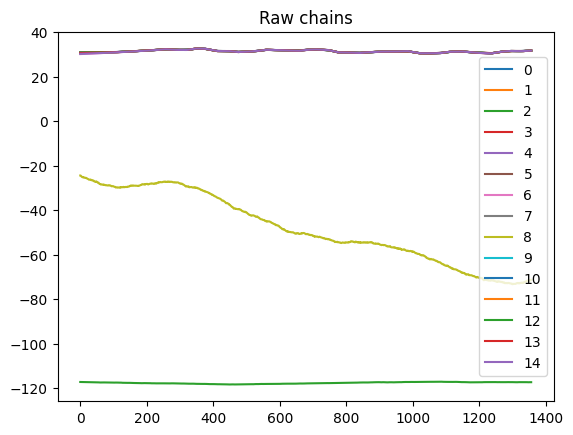

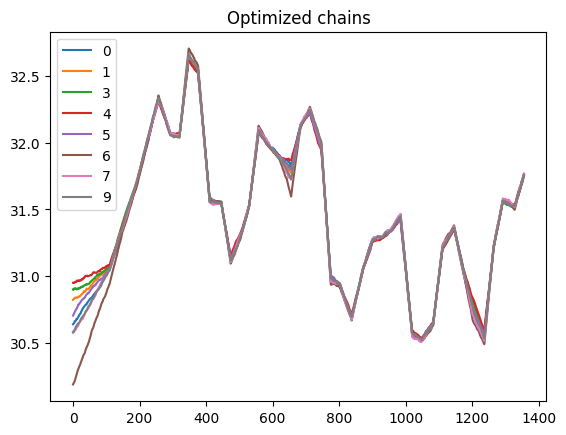

Best chain combination summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.113  0.021   0.078    0.152      0.003    0.002      53.0     231.0   
eps    0.276  0.096   0.117    0.455      0.002    0.001    3827.0    7702.0   
p_out  0.142  0.059   0.041    0.252      0.001    0.001    4422.0    7311.0   

       r_hat  
sig     1.11  
eps     1.00  
p_out   1.00  


In [18]:
selected_chains = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
remove_those = [8, 2]#[2, 5, 8, 6, 3]
for i in remove_those:
    selected_chains.remove(i)


snc_ar1_nuts.visualize_latents(selected_chains)
snc_ar1_nuts.predict(selected_chains)

In [19]:
sub_data['muX'] = snc_ar1_nuts.muX
sub_data['ICL'] = snc_ar1_nuts.CIL
sub_data['ICU'] = snc_ar1_nuts.CIU
sub_data['pout'] = snc_ar1_nuts.pointwise_pout

sub_data.obs = np.log10(np.exp(sub_data.obs))
sub_data.muX = np.log10(np.exp(sub_data.muX))
sub_data.ICL = np.log10(np.exp(sub_data.ICL))
sub_data.ICU = np.log10(np.exp(sub_data.ICU))

RW2s[this_molecule] = sub_data.copy()

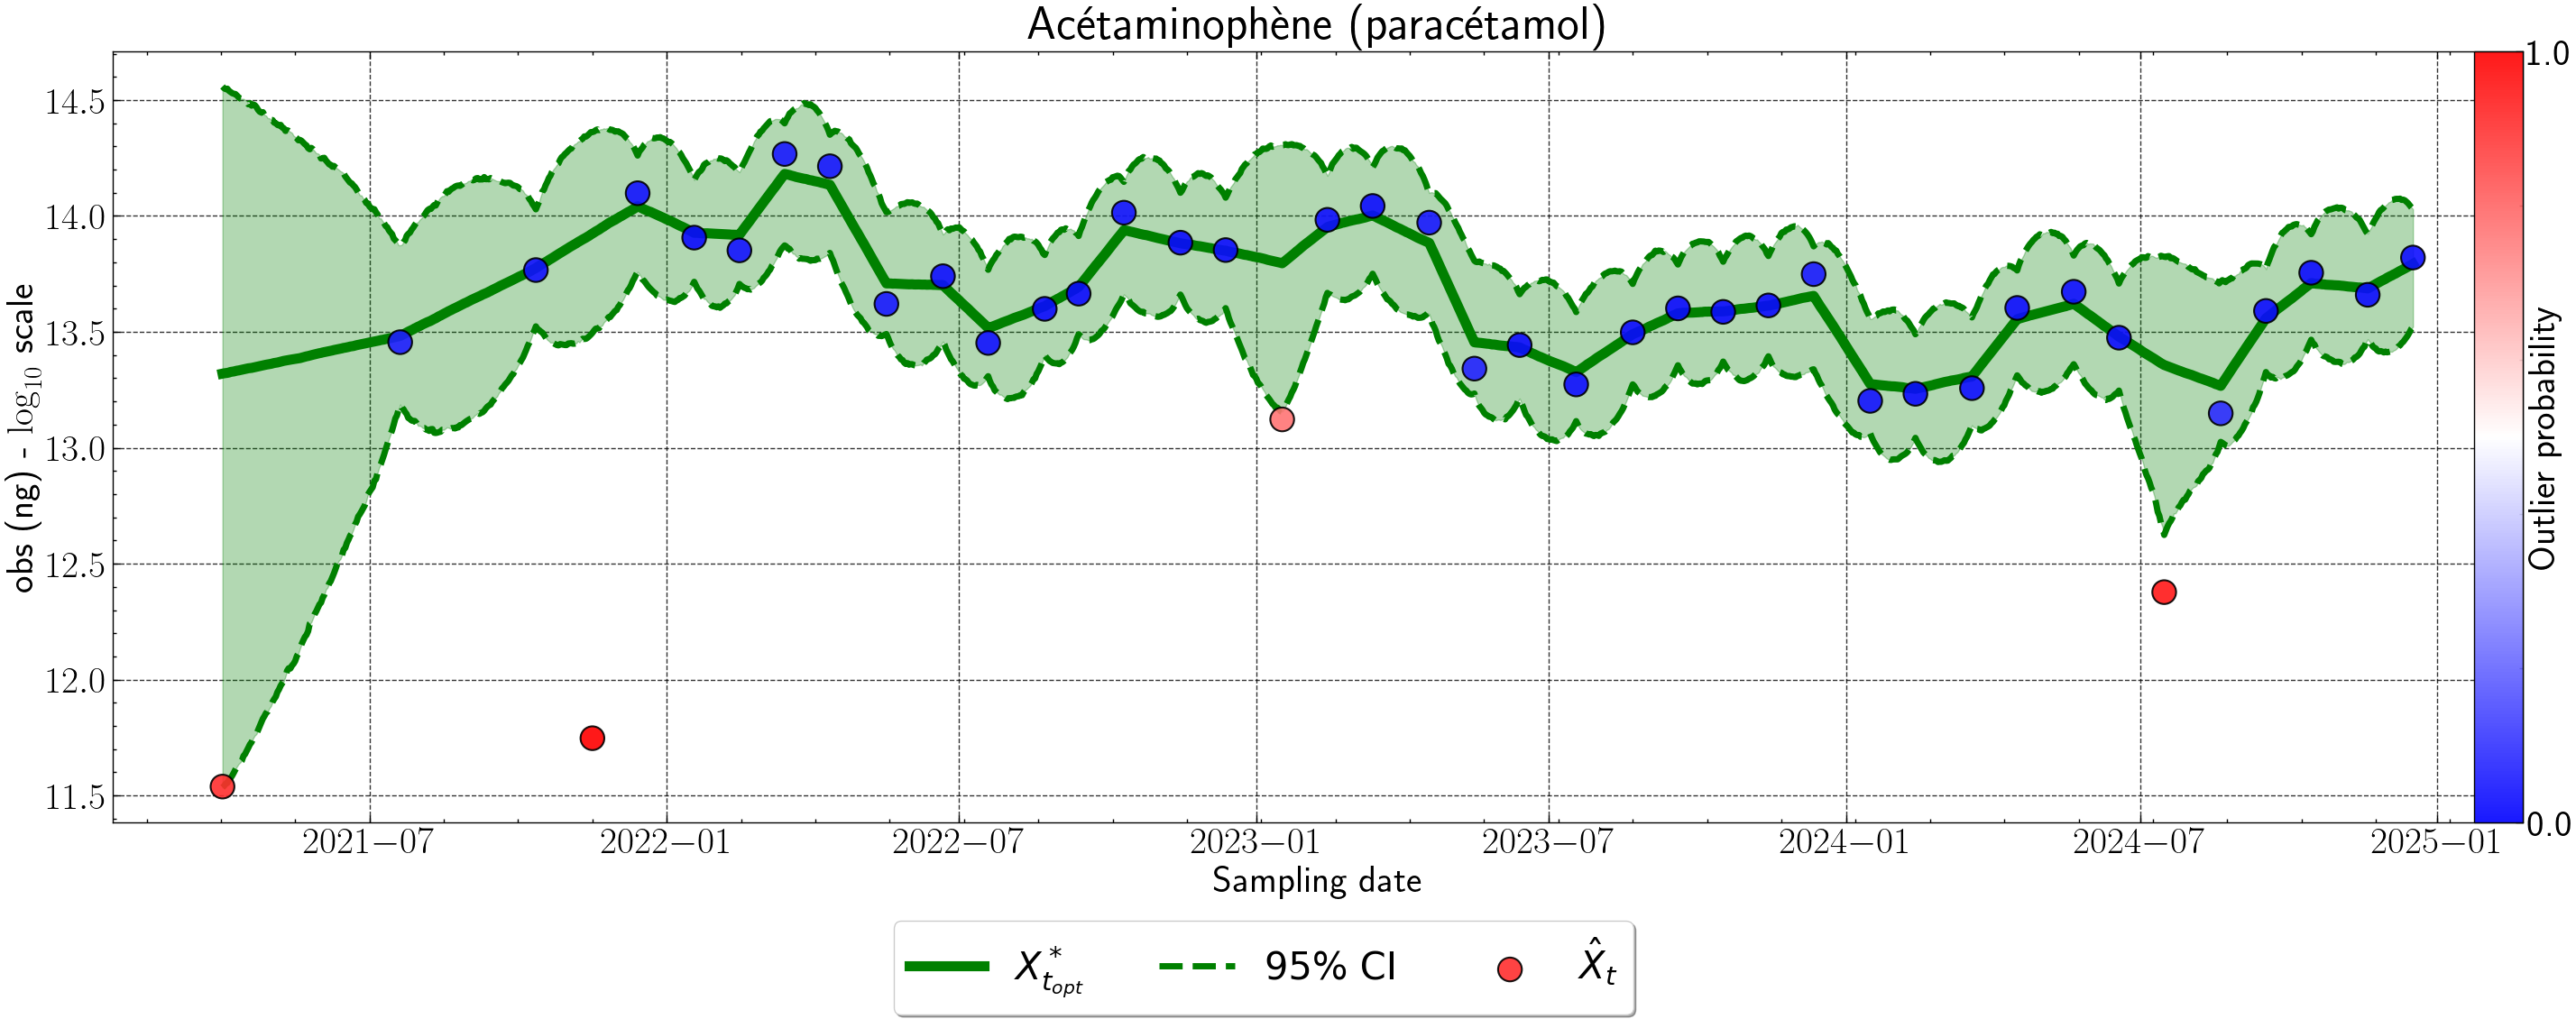

In [20]:
with plt.style.context(['science', 'notebook', 'grid']):

    LABEL_SIZE = 30
    TICK_SIZE = 30
    TITLE_SIZE = 38
    LEGEND_SIZE = 30
    DATES_SIZE = 18
    figsize = (28, 10) #figsize = (32, 10)
    
    plt.rc('axes', labelsize=LABEL_SIZE)
    plt.rc('xtick', labelsize=TICK_SIZE)   
    plt.rc('ytick', labelsize=TICK_SIZE)
    plt.rc('figure', titlesize=TITLE_SIZE)
    plt.rc('legend', fontsize=LEGEND_SIZE)
    plt.rcParams['text.usetex'] = True
    
    fig = plt.figure(figsize=figsize, layout="constrained")
    
    ax_dict = fig.subplot_mosaic(
        """
        A
        """
    )
    
    ### A
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.muX.values, label='$X^*_{t_{opt}}$', color='green', linewidth=8, zorder=3)
    
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICL.values, label='95% CI', linestyle='--', color='green', linewidth=5, zorder=1)
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICU.values, linestyle='--', color='green', linewidth=5, zorder=1)
    
    ax_dict['A'].fill_between(sub_data.dateStart.values, sub_data.ICL.values, sub_data.ICU.values, alpha=.3, color='green')

    
    scatter_points = ax_dict['A'].scatter(sub_data.dateStart.values, sub_data.obs.values, label='$\hat{X}_t$', 
                         c=sub_data.pout.values,
                         cmap='bwr', edgecolor='black', s=360, zorder=3,
                         linewidths=1.5, alpha=0.9, vmin=0, vmax=1)

    
    ax_dict['A'].set_ylabel("obs (ng) - $\log_{10}$ scale")
    ax_dict['A'].set_xlabel("Sampling date")
    ax_dict['A'].tick_params(axis='x', labelsize=TICK_SIZE)
    ax_dict['A'].tick_params(axis='y', labelsize=TICK_SIZE)
    ax_dict['A'].grid(linewidth=1, color='black', alpha=0.8)
    ax_dict['A'].set_title(this_molecule, size=TITLE_SIZE)

    ### Outlier probability legend:
    cmin, cmax = 0.0, 1.0 
    axins1 = inset_axes(ax_dict['A'], width='2%', height='100%', loc='right', borderpad=0)
    axins1.grid(False)
    cbar = fig.colorbar(scatter_points, cax=axins1, orientation='vertical')
    
    # Setting tick limits:
    cbar.set_ticks([cmin, cmax])
    cbar.ax.yaxis.set_major_locator(ticker.FixedLocator([cmin, cmax]))
    
    # Standardizing the float format displayed:
    decimal_places = 1
    cbar.ax.set_yticklabels([f"{cmin:.{decimal_places}f}", f"{cmax:.{decimal_places}f}"], fontsize=TICK_SIZE)

    # Placing the label at the right spot:
    cbar.ax.set_ylabel('Outlier probability', size=TICK_SIZE, labelpad=-35)

    # Main legend
    plt.rcParams['text.usetex'] = False
    h1, l1 = ax_dict['A'].get_legend_handles_labels()
    fig.legend(h1, l1, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=5)
    
    plt.show()

In [19]:
### Pout estimé par le SCOU NUTS

In [21]:
for molecule in list(RW2s.keys()):
    this_file = RW2s[molecule]
    this_file.to_csv('../outputs/files/chemical_data_manuscript/' + molecule + '.csv', sep=';', index=False)

In [22]:
full_data.Molecule.unique()

array(['Volume Prétraité Bassins de Clichy',
       'Emissaire Genéral Estimation Pompage', 'Débit Seine Centre',
       'Acénaphtène', 'Ammonium', 'Anthracène', 'Azote Kjeldahl',
       'Benzo[a]anthracène', 'Benzo[a]pyrène', 'Benzo[b]fluoranthène',
       'Benzo[g,h,i]perylène', 'Benzo[k]fluoranthène', 'Chrysène',
       'Coliformes Thermotolérants', 'Coliformes totaux présomptifs',
       'DBO diluée', 'Dibenzo[ah]anthracène', 'Entérocoques intestinaux',
       'Escherichia coli', 'Fluoranthène', 'Fluorène',
       'Indéno[1,2,3,c,d]pyrène', 'Matières en suspension',
       'Micro-organismes revivifiables\xa0 à 22°C',
       'Micro-organismes revivifiables\xa0 à 36°C', 'Naphtalène', 'NGL',
       'Nitrates', 'Nitrites', 'Orthophosphates', 'PCB 101', 'PCB 118',
       'PCB 138', 'PCB 153', 'PCB 180', 'PCB 28', 'PCB 52', 'pH',
       'Phénanthrène', 'Phosphore', 'Pyrène', 'Somme 15 HAP',
       'Somme 7 PCB',
       'Spores de micro-organismes anaérobies sulfito-réducteurs',
       'S

In [36]:
this_molecule = 'Aténolol'
this_lod = 0.01 * 1000
this_lod

10.0

In [37]:
sub_data = preprocess_data(this_molecule, this_lod)

In [25]:
sub_data.loc[sub_data.obs <= sub_data.lod]

Empty DataFrame
Columns: [dateStart, obs, Raw_lod, Raw_concentration, lod, plantVolume]
Index: []

In [26]:
lod_matrix = sub_data.lod.values
observation_matrix = sub_data.obs.values

filename = 'discard.nc'
tuning_iters = 12000
sampling_iters = 2000
nb_chains = 15

snc_ar1_nuts = SCOU_RW1_NUTS(observation_matrix, lod_matrix, tuning_iters=tuning_iters, sampling_iters=sampling_iters,
                             export_name=filename, 
                             p_out_frozen=-1, nb_chains=nb_chains, export_chains=False,
                             RW_order=1)
snc_ar1_nuts.fit()

# Done
notify_mac("Jupyter", "Work done !")

/opt/anaconda3/envs/pymc5/lib/python3.9/site-packages/pymc/distributions/timeseries.py:558: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100, shape=...)`. You can specify an init_dist manually to suppress this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (15 chains in 4 jobs)
NUTS: [sig, eps, p_out, latent]


Sampling 15 chains for 12_000 tune and 2_000 draw iterations (180_000 + 30_000 draws total) took 4514 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 5 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 10 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 13 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameter

Raw summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.324  0.435   0.044    1.097      0.104    0.075      23.0      32.0   
eps    0.467  1.149   0.074    1.282      0.092    0.065      30.0     170.0   
p_out  0.345  0.391   0.005    0.939      0.100    0.072      25.0     173.0   

       r_hat  
sig     1.79  
eps     1.43  
p_out   1.59  


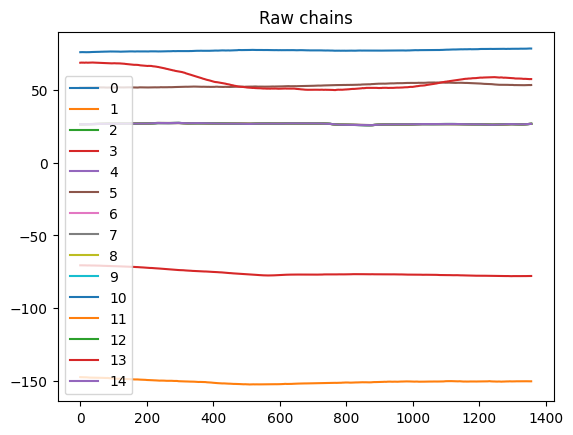

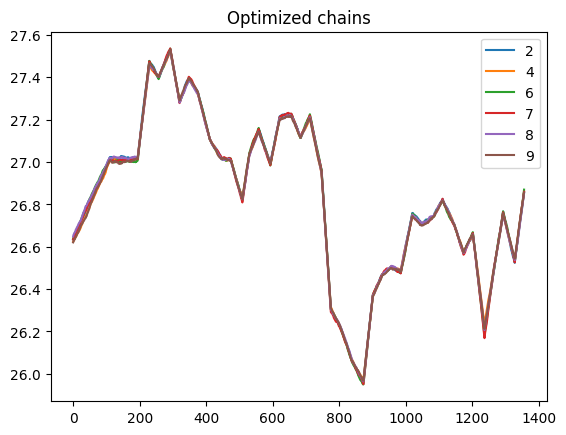

Best chain combination summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.071  0.011   0.050    0.091      0.001    0.001      77.0     265.0   
eps    0.199  0.050   0.109    0.293      0.001    0.000    4885.0    8618.0   
p_out  0.071  0.048   0.003    0.158      0.000    0.000    9641.0    7084.0   

       r_hat  
sig     1.07  
eps     1.00  
p_out   1.00  


In [32]:
selected_chains = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
remove_those = [0, 3, 5, 1]#[2, 5, 8, 6, 3]
for i in remove_those:
    selected_chains.remove(i)


snc_ar1_nuts.visualize_latents(selected_chains)
snc_ar1_nuts.predict(selected_chains)

In [38]:
sub_data['muX'] = snc_ar1_nuts.muX
sub_data['ICL'] = snc_ar1_nuts.CIL
sub_data['ICU'] = snc_ar1_nuts.CIU
sub_data['pout'] = snc_ar1_nuts.pointwise_pout

sub_data.obs = np.log10(np.exp(sub_data.obs))
sub_data.muX = np.log10(np.exp(sub_data.muX))
sub_data.ICL = np.log10(np.exp(sub_data.ICL))
sub_data.ICU = np.log10(np.exp(sub_data.ICU))

RW2s[this_molecule] = sub_data.copy()

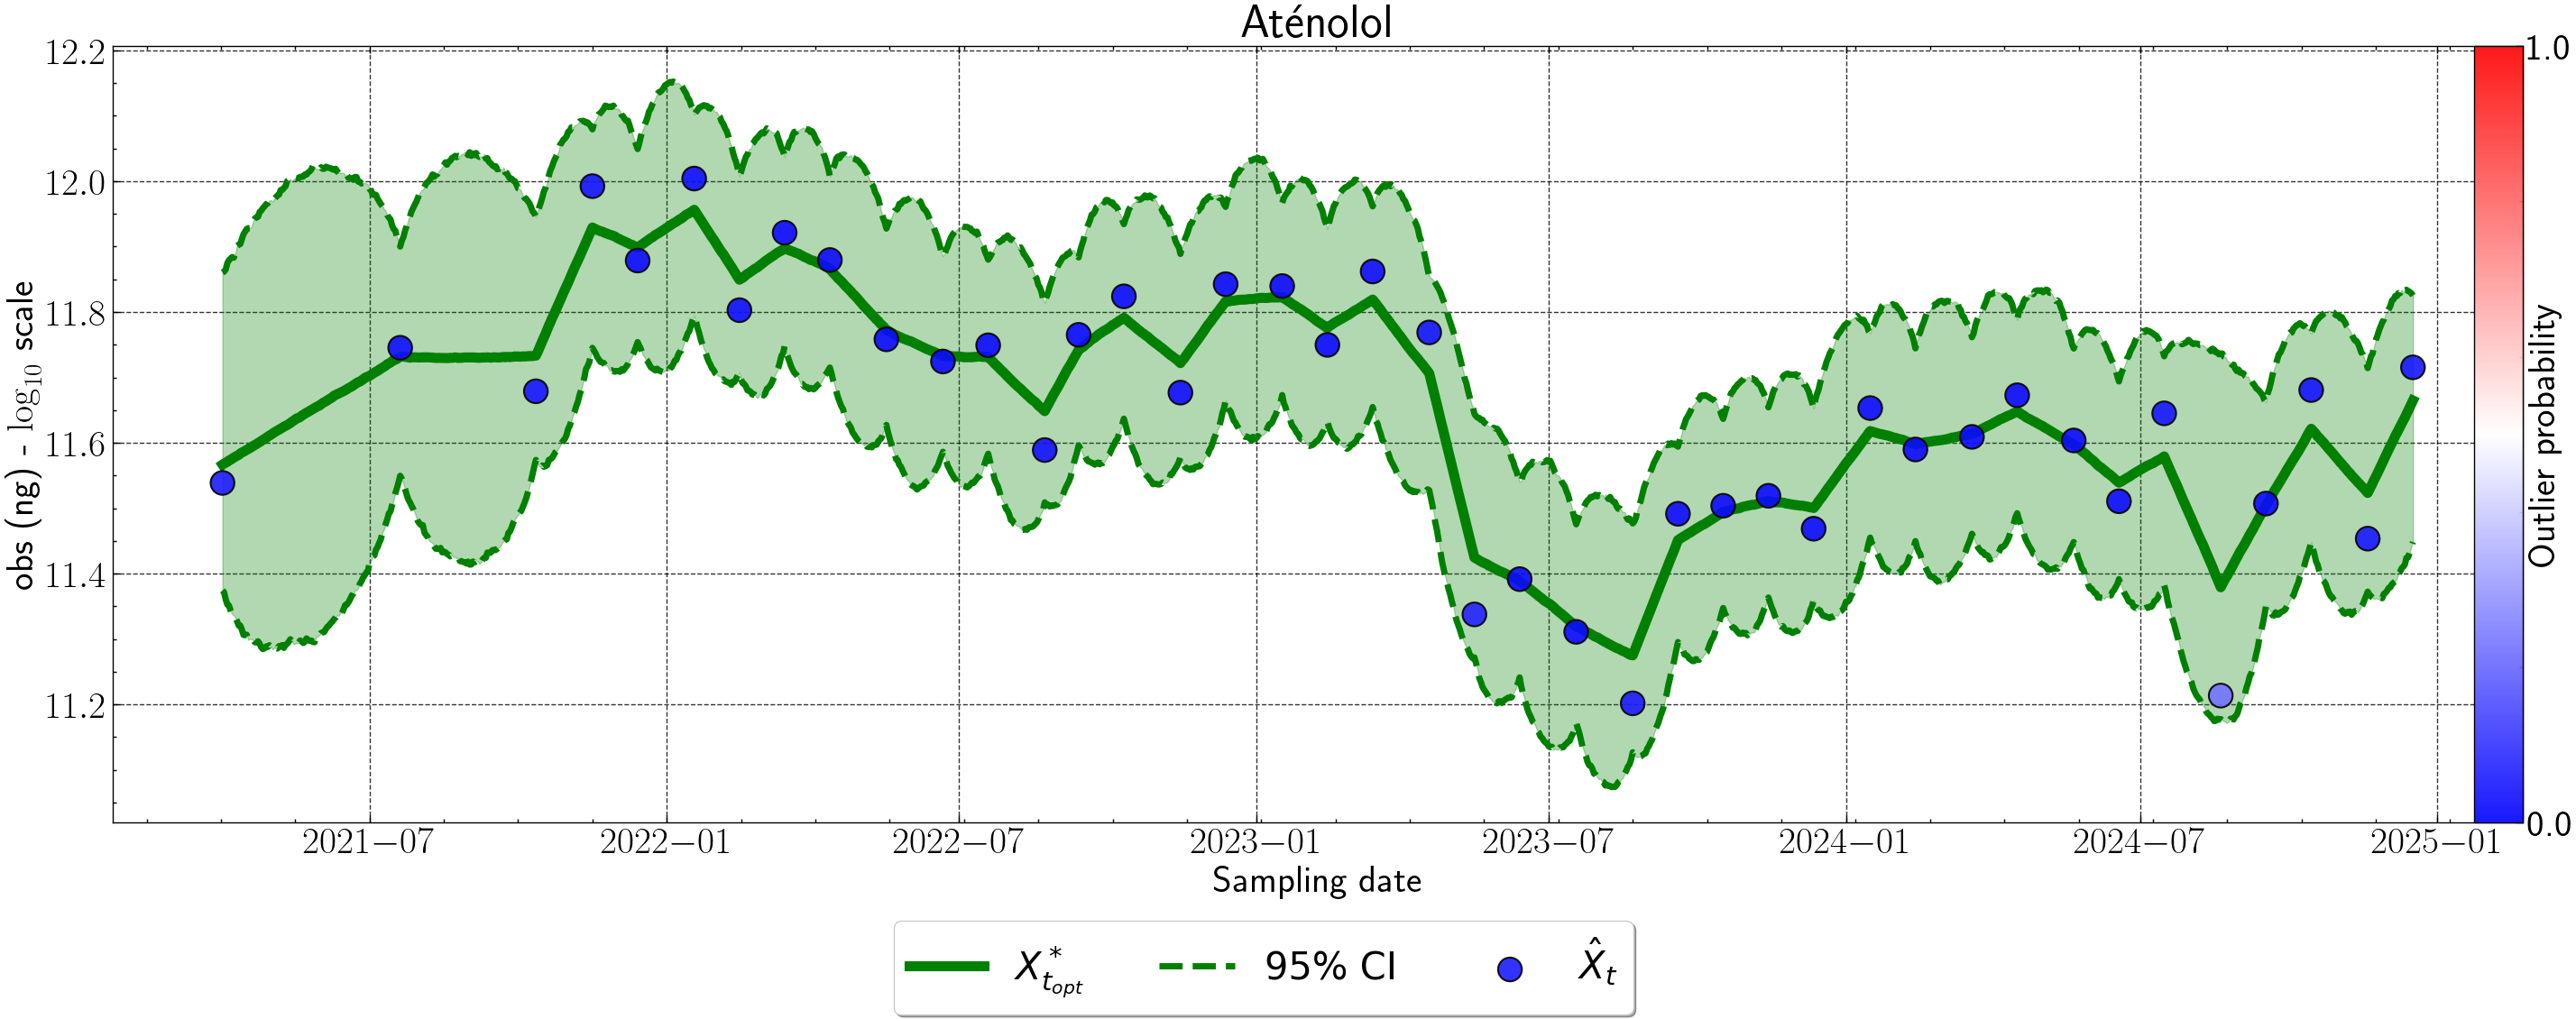

In [39]:
with plt.style.context(['science', 'notebook', 'grid']):

    LABEL_SIZE = 30
    TICK_SIZE = 30
    TITLE_SIZE = 38
    LEGEND_SIZE = 30
    DATES_SIZE = 18
    figsize = (28, 10) #figsize = (32, 10)
    
    plt.rc('axes', labelsize=LABEL_SIZE)
    plt.rc('xtick', labelsize=TICK_SIZE)   
    plt.rc('ytick', labelsize=TICK_SIZE)
    plt.rc('figure', titlesize=TITLE_SIZE)
    plt.rc('legend', fontsize=LEGEND_SIZE)
    plt.rcParams['text.usetex'] = True
    
    fig = plt.figure(figsize=figsize, layout="constrained")
    
    ax_dict = fig.subplot_mosaic(
        """
        A
        """
    )
    
    ### A
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.muX.values, label='$X^*_{t_{opt}}$', color='green', linewidth=8, zorder=3)
    
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICL.values, label='95% CI', linestyle='--', color='green', linewidth=5, zorder=1)
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICU.values, linestyle='--', color='green', linewidth=5, zorder=1)
    
    ax_dict['A'].fill_between(sub_data.dateStart.values, sub_data.ICL.values, sub_data.ICU.values, alpha=.3, color='green')

    
    scatter_points = ax_dict['A'].scatter(sub_data.dateStart.values, sub_data.obs.values, label='$\hat{X}_t$', 
                         c=sub_data.pout.values,
                         cmap='bwr', edgecolor='black', s=360, zorder=3,
                         linewidths=1.5, alpha=0.9, vmin=0, vmax=1)

    
    ax_dict['A'].set_ylabel("obs (ng) - $\log_{10}$ scale")
    ax_dict['A'].set_xlabel("Sampling date")
    ax_dict['A'].tick_params(axis='x', labelsize=TICK_SIZE)
    ax_dict['A'].tick_params(axis='y', labelsize=TICK_SIZE)
    ax_dict['A'].grid(linewidth=1, color='black', alpha=0.8)
    ax_dict['A'].set_title(this_molecule, size=TITLE_SIZE)

    ### Outlier probability legend:
    cmin, cmax = 0.0, 1.0 
    axins1 = inset_axes(ax_dict['A'], width='2%', height='100%', loc='right', borderpad=0)
    axins1.grid(False)
    cbar = fig.colorbar(scatter_points, cax=axins1, orientation='vertical')
    
    # Setting tick limits:
    cbar.set_ticks([cmin, cmax])
    cbar.ax.yaxis.set_major_locator(ticker.FixedLocator([cmin, cmax]))
    
    # Standardizing the float format displayed:
    decimal_places = 1
    cbar.ax.set_yticklabels([f"{cmin:.{decimal_places}f}", f"{cmax:.{decimal_places}f}"], fontsize=TICK_SIZE)

    # Placing the label at the right spot:
    cbar.ax.set_ylabel('Outlier probability', size=TICK_SIZE, labelpad=-35)

    # Main legend
    plt.rcParams['text.usetex'] = False
    h1, l1 = ax_dict['A'].get_legend_handles_labels()
    fig.legend(h1, l1, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=5)
    
    plt.show()

In [40]:
### Pout estimé par le SCOU NUTS

In [41]:
for molecule in list(RW2s.keys()):
    this_file = RW2s[molecule]
    this_file.to_csv('../outputs/files/chemical_data_manuscript/' + molecule + '.csv', sep=';', index=False)

In [22]:
full_data.Molecule.unique()

array(['Volume Prétraité Bassins de Clichy',
       'Emissaire Genéral Estimation Pompage', 'Débit Seine Centre',
       'Acénaphtène', 'Ammonium', 'Anthracène', 'Azote Kjeldahl',
       'Benzo[a]anthracène', 'Benzo[a]pyrène', 'Benzo[b]fluoranthène',
       'Benzo[g,h,i]perylène', 'Benzo[k]fluoranthène', 'Chrysène',
       'Coliformes Thermotolérants', 'Coliformes totaux présomptifs',
       'DBO diluée', 'Dibenzo[ah]anthracène', 'Entérocoques intestinaux',
       'Escherichia coli', 'Fluoranthène', 'Fluorène',
       'Indéno[1,2,3,c,d]pyrène', 'Matières en suspension',
       'Micro-organismes revivifiables\xa0 à 22°C',
       'Micro-organismes revivifiables\xa0 à 36°C', 'Naphtalène', 'NGL',
       'Nitrates', 'Nitrites', 'Orthophosphates', 'PCB 101', 'PCB 118',
       'PCB 138', 'PCB 153', 'PCB 180', 'PCB 28', 'PCB 52', 'pH',
       'Phénanthrène', 'Phosphore', 'Pyrène', 'Somme 15 HAP',
       'Somme 7 PCB',
       'Spores de micro-organismes anaérobies sulfito-réducteurs',
       'S

In [42]:
this_molecule = 'Carbamazépine'
this_lod = 0.01 * 1000
this_lod

10.0

In [43]:
sub_data = preprocess_data(this_molecule, this_lod)

In [44]:
sub_data.loc[sub_data.obs <= sub_data.lod]

Empty DataFrame
Columns: [dateStart, obs, Raw_lod, Raw_concentration, lod, plantVolume]
Index: []

In [45]:
lod_matrix = sub_data.lod.values
observation_matrix = sub_data.obs.values

filename = 'discard.nc'
tuning_iters = 12000
sampling_iters = 2000
nb_chains = 15

snc_ar1_nuts = SCOU_RW1_NUTS(observation_matrix, lod_matrix, tuning_iters=tuning_iters, sampling_iters=sampling_iters,
                             export_name=filename, 
                             p_out_frozen=-1, nb_chains=nb_chains, export_chains=False,
                             RW_order=1)
snc_ar1_nuts.fit()

# Done
notify_mac("Jupyter", "Work done !")

/opt/anaconda3/envs/pymc5/lib/python3.9/site-packages/pymc/distributions/timeseries.py:558: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100, shape=...)`. You can specify an init_dist manually to suppress this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (15 chains in 4 jobs)
NUTS: [sig, eps, p_out, latent]


Sampling 15 chains for 12_000 tune and 2_000 draw iterations (180_000 + 30_000 draws total) took 3725 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 9 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 11 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


Raw summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.243  0.306   0.039    0.870      0.075    0.054      25.0      66.0   
eps    0.402  0.863   0.070    1.118      0.088    0.062      32.0     114.0   
p_out  0.304  0.358   0.011    0.933      0.091    0.066      27.0     112.0   

       r_hat  
sig     1.60  
eps     1.38  
p_out   1.51  


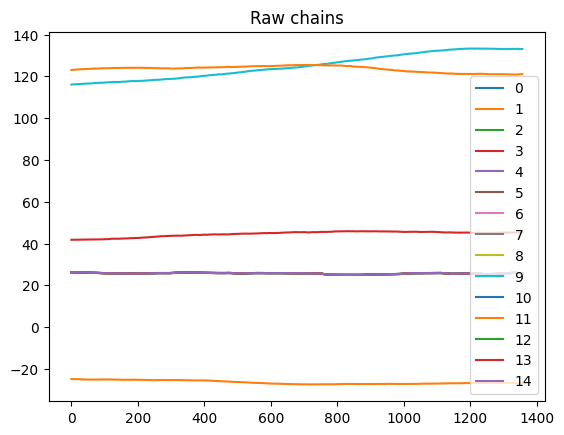

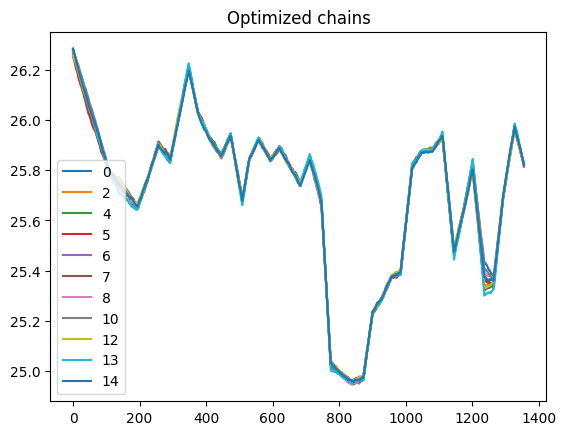

Best chain combination summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.072  0.012   0.050    0.096      0.001    0.001     169.0     344.0   
eps    0.192  0.053   0.101    0.291      0.001    0.000    7788.0   13882.0   
p_out  0.091  0.054   0.005    0.187      0.000    0.000   15152.0   13626.0   

       r_hat  
sig     1.05  
eps     1.00  
p_out   1.00  


In [50]:
selected_chains = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
remove_those = [9, 11, 3, 1]#[2, 5, 8, 6, 3]
for i in remove_those:
    selected_chains.remove(i)


snc_ar1_nuts.visualize_latents(selected_chains)
snc_ar1_nuts.predict(selected_chains)

In [51]:
sub_data['muX'] = snc_ar1_nuts.muX
sub_data['ICL'] = snc_ar1_nuts.CIL
sub_data['ICU'] = snc_ar1_nuts.CIU
sub_data['pout'] = snc_ar1_nuts.pointwise_pout

sub_data.obs = np.log10(np.exp(sub_data.obs))
sub_data.muX = np.log10(np.exp(sub_data.muX))
sub_data.ICL = np.log10(np.exp(sub_data.ICL))
sub_data.ICU = np.log10(np.exp(sub_data.ICU))

RW2s[this_molecule] = sub_data.copy()

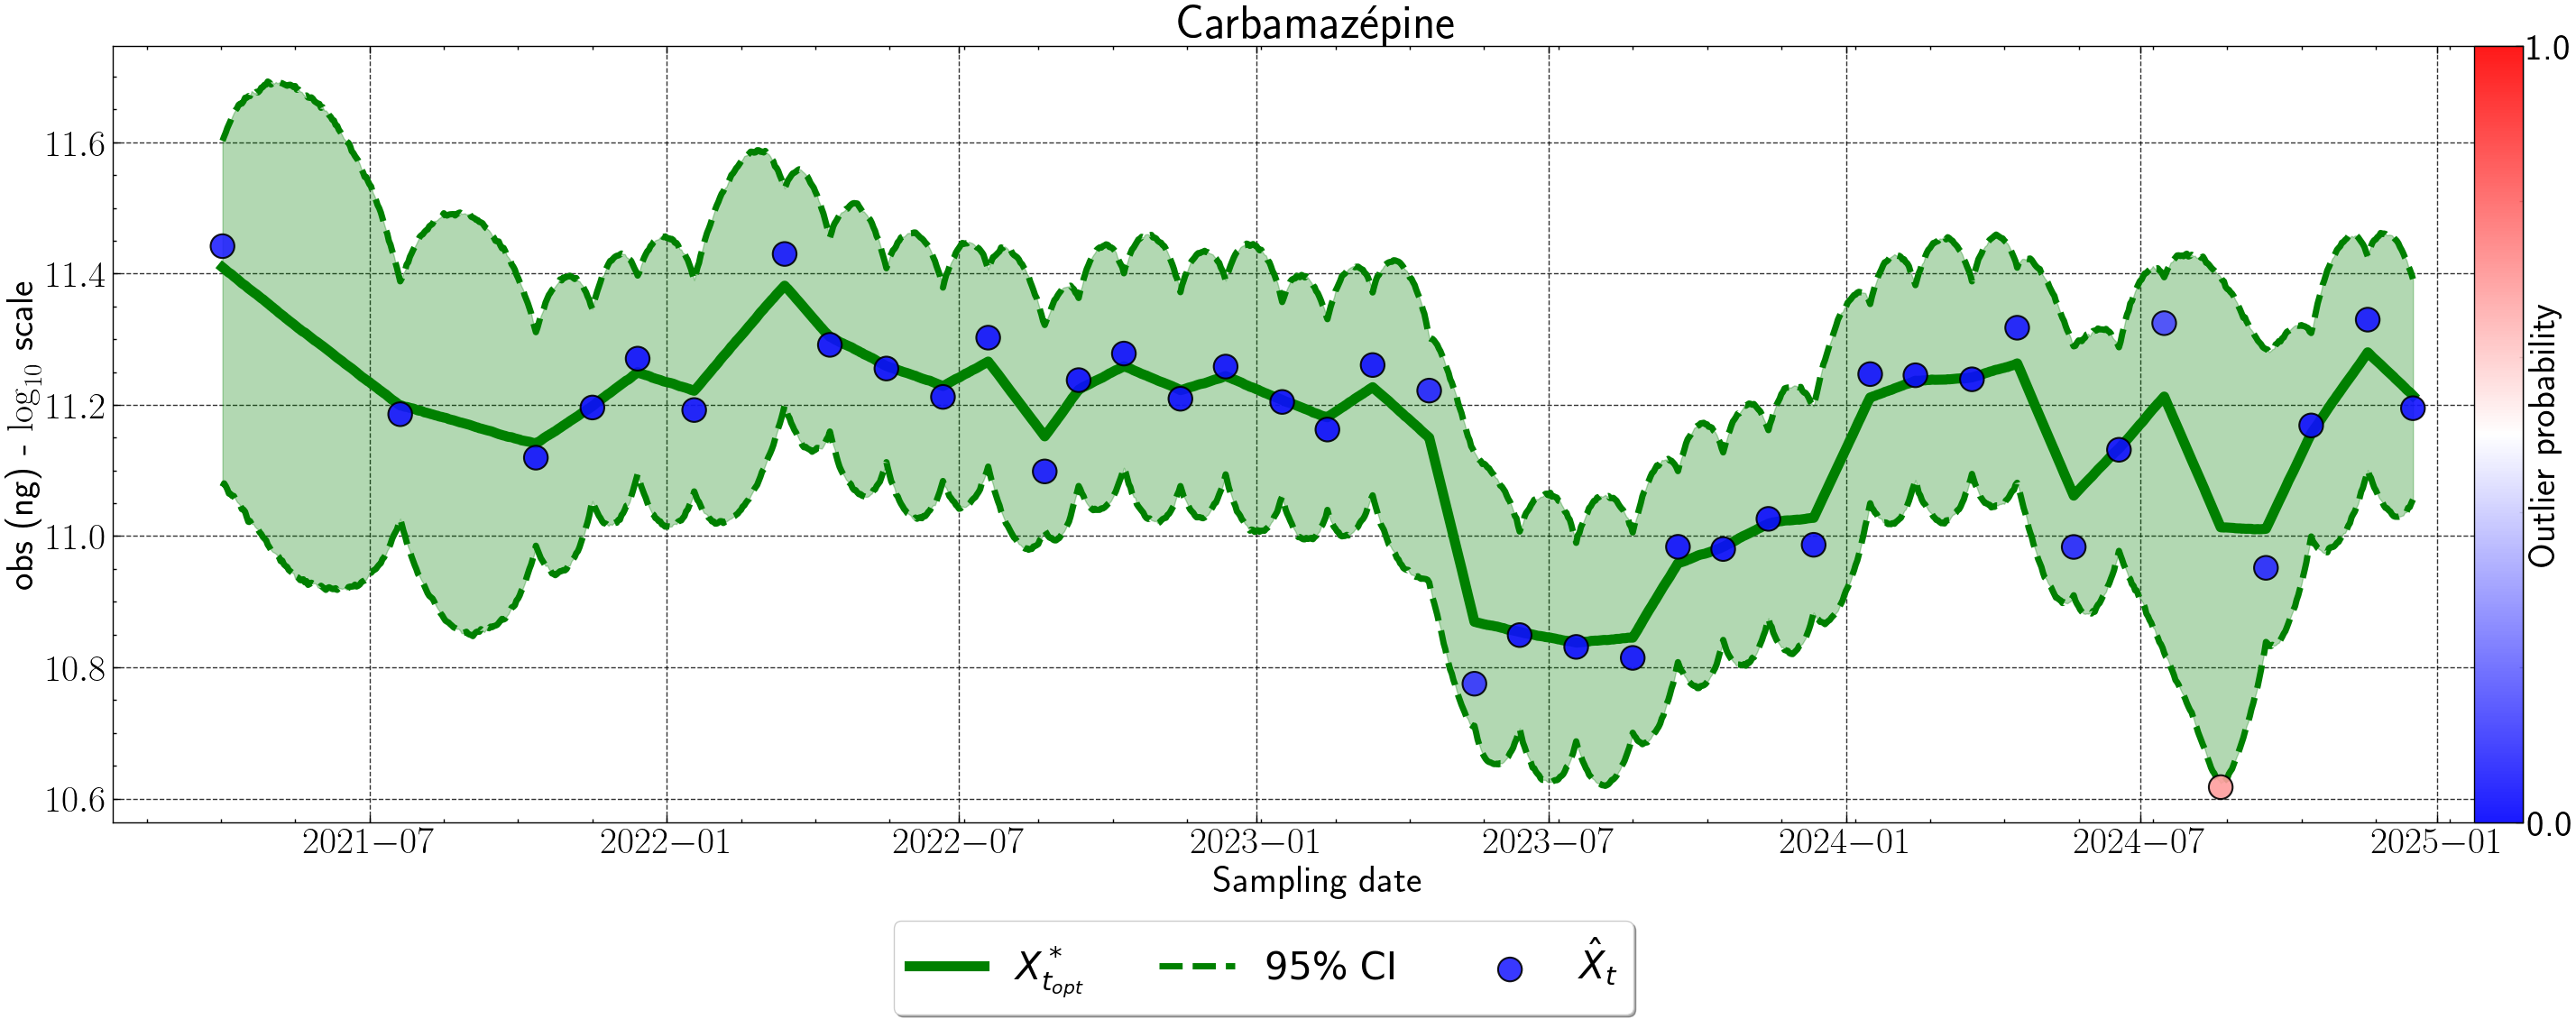

In [52]:
with plt.style.context(['science', 'notebook', 'grid']):

    LABEL_SIZE = 30
    TICK_SIZE = 30
    TITLE_SIZE = 38
    LEGEND_SIZE = 30
    DATES_SIZE = 18
    figsize = (28, 10) #figsize = (32, 10)
    
    plt.rc('axes', labelsize=LABEL_SIZE)
    plt.rc('xtick', labelsize=TICK_SIZE)   
    plt.rc('ytick', labelsize=TICK_SIZE)
    plt.rc('figure', titlesize=TITLE_SIZE)
    plt.rc('legend', fontsize=LEGEND_SIZE)
    plt.rcParams['text.usetex'] = True
    
    fig = plt.figure(figsize=figsize, layout="constrained")
    
    ax_dict = fig.subplot_mosaic(
        """
        A
        """
    )
    
    ### A
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.muX.values, label='$X^*_{t_{opt}}$', color='green', linewidth=8, zorder=3)
    
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICL.values, label='95% CI', linestyle='--', color='green', linewidth=5, zorder=1)
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICU.values, linestyle='--', color='green', linewidth=5, zorder=1)
    
    ax_dict['A'].fill_between(sub_data.dateStart.values, sub_data.ICL.values, sub_data.ICU.values, alpha=.3, color='green')

    
    scatter_points = ax_dict['A'].scatter(sub_data.dateStart.values, sub_data.obs.values, label='$\hat{X}_t$', 
                         c=sub_data.pout.values,
                         cmap='bwr', edgecolor='black', s=360, zorder=3,
                         linewidths=1.5, alpha=0.9, vmin=0, vmax=1)

    
    ax_dict['A'].set_ylabel("obs (ng) - $\log_{10}$ scale")
    ax_dict['A'].set_xlabel("Sampling date")
    ax_dict['A'].tick_params(axis='x', labelsize=TICK_SIZE)
    ax_dict['A'].tick_params(axis='y', labelsize=TICK_SIZE)
    ax_dict['A'].grid(linewidth=1, color='black', alpha=0.8)
    ax_dict['A'].set_title(this_molecule, size=TITLE_SIZE)

    ### Outlier probability legend:
    cmin, cmax = 0.0, 1.0 
    axins1 = inset_axes(ax_dict['A'], width='2%', height='100%', loc='right', borderpad=0)
    axins1.grid(False)
    cbar = fig.colorbar(scatter_points, cax=axins1, orientation='vertical')
    
    # Setting tick limits:
    cbar.set_ticks([cmin, cmax])
    cbar.ax.yaxis.set_major_locator(ticker.FixedLocator([cmin, cmax]))
    
    # Standardizing the float format displayed:
    decimal_places = 1
    cbar.ax.set_yticklabels([f"{cmin:.{decimal_places}f}", f"{cmax:.{decimal_places}f}"], fontsize=TICK_SIZE)

    # Placing the label at the right spot:
    cbar.ax.set_ylabel('Outlier probability', size=TICK_SIZE, labelpad=-35)

    # Main legend
    plt.rcParams['text.usetex'] = False
    h1, l1 = ax_dict['A'].get_legend_handles_labels()
    fig.legend(h1, l1, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=5)
    
    plt.show()

In [53]:
### Pout estimé par le SCOU NUTS

In [54]:
for molecule in list(RW2s.keys()):
    this_file = RW2s[molecule]
    this_file.to_csv('../outputs/files/chemical_data_manuscript/' + molecule + '.csv', sep=';', index=False)

In [22]:
full_data.Molecule.unique()

array(['Volume Prétraité Bassins de Clichy',
       'Emissaire Genéral Estimation Pompage', 'Débit Seine Centre',
       'Acénaphtène', 'Ammonium', 'Anthracène', 'Azote Kjeldahl',
       'Benzo[a]anthracène', 'Benzo[a]pyrène', 'Benzo[b]fluoranthène',
       'Benzo[g,h,i]perylène', 'Benzo[k]fluoranthène', 'Chrysène',
       'Coliformes Thermotolérants', 'Coliformes totaux présomptifs',
       'DBO diluée', 'Dibenzo[ah]anthracène', 'Entérocoques intestinaux',
       'Escherichia coli', 'Fluoranthène', 'Fluorène',
       'Indéno[1,2,3,c,d]pyrène', 'Matières en suspension',
       'Micro-organismes revivifiables\xa0 à 22°C',
       'Micro-organismes revivifiables\xa0 à 36°C', 'Naphtalène', 'NGL',
       'Nitrates', 'Nitrites', 'Orthophosphates', 'PCB 101', 'PCB 118',
       'PCB 138', 'PCB 153', 'PCB 180', 'PCB 28', 'PCB 52', 'pH',
       'Phénanthrène', 'Phosphore', 'Pyrène', 'Somme 15 HAP',
       'Somme 7 PCB',
       'Spores de micro-organismes anaérobies sulfito-réducteurs',
       'S

In [55]:
this_molecule = 'Ciprofloxacine'
this_lod = 0.1 * 1000
this_lod

100.0

In [56]:
sub_data = preprocess_data(this_molecule, this_lod)

In [57]:
sub_data.loc[sub_data.obs <= sub_data.lod]

dateStart        obs  Raw_lod  Raw_concentration        lod  plantVolume
320 2022-02-15  25.209833    100.0              100.0  25.209833  888160000.0

In [58]:
lod_matrix = sub_data.lod.values
observation_matrix = sub_data.obs.values

filename = 'discard.nc'
tuning_iters = 12000
sampling_iters = 2000
nb_chains = 15

snc_ar1_nuts = SCOU_RW1_NUTS(observation_matrix, lod_matrix, tuning_iters=tuning_iters, sampling_iters=sampling_iters,
                             export_name=filename, 
                             p_out_frozen=-1, nb_chains=nb_chains, export_chains=False,
                             RW_order=1)
snc_ar1_nuts.fit()

# Done
notify_mac("Jupyter", "Work done !")

/opt/anaconda3/envs/pymc5/lib/python3.9/site-packages/pymc/distributions/timeseries.py:558: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100, shape=...)`. You can specify an init_dist manually to suppress this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (15 chains in 4 jobs)
NUTS: [sig, eps, p_out, latent]


Sampling 15 chains for 12_000 tune and 2_000 draw iterations (180_000 + 30_000 draws total) took 4189 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Raw summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.117  0.024   0.074    0.164      0.003    0.002      73.0     311.0   
eps    0.335  0.115   0.133    0.545      0.003    0.002    2060.0   13061.0   
p_out  0.120  0.063   0.015    0.235      0.000    0.000   19648.0   20839.0   

       r_hat  
sig     1.16  
eps     1.01  
p_out   1.00  


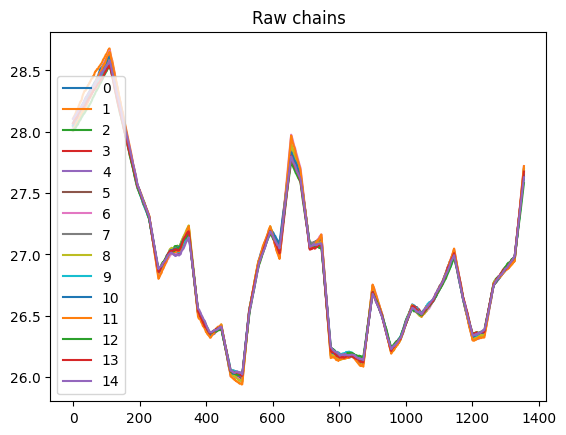

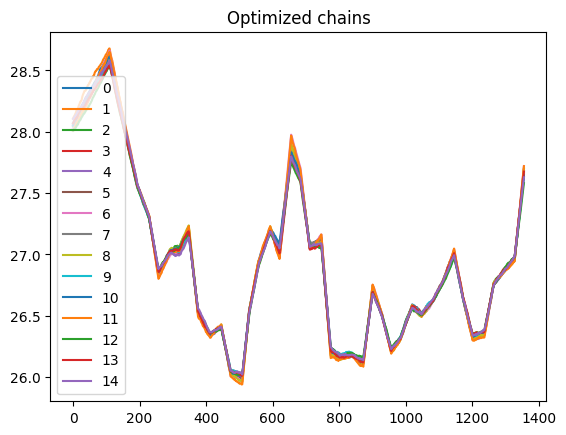

Best chain combination summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.117  0.024   0.074    0.164      0.003    0.002      73.0     311.0   
eps    0.335  0.115   0.133    0.545      0.003    0.002    2060.0   13061.0   
p_out  0.120  0.063   0.015    0.235      0.000    0.000   19648.0   20839.0   

       r_hat  
sig     1.16  
eps     1.01  
p_out   1.00  


In [60]:
selected_chains = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
remove_those = []#[2, 5, 8, 6, 3]
for i in remove_those:
    selected_chains.remove(i)


snc_ar1_nuts.visualize_latents(selected_chains)
snc_ar1_nuts.predict(selected_chains)

In [61]:
sub_data['muX'] = snc_ar1_nuts.muX
sub_data['ICL'] = snc_ar1_nuts.CIL
sub_data['ICU'] = snc_ar1_nuts.CIU
sub_data['pout'] = snc_ar1_nuts.pointwise_pout

sub_data.obs = np.log10(np.exp(sub_data.obs))
sub_data.muX = np.log10(np.exp(sub_data.muX))
sub_data.ICL = np.log10(np.exp(sub_data.ICL))
sub_data.ICU = np.log10(np.exp(sub_data.ICU))

RW2s[this_molecule] = sub_data.copy()

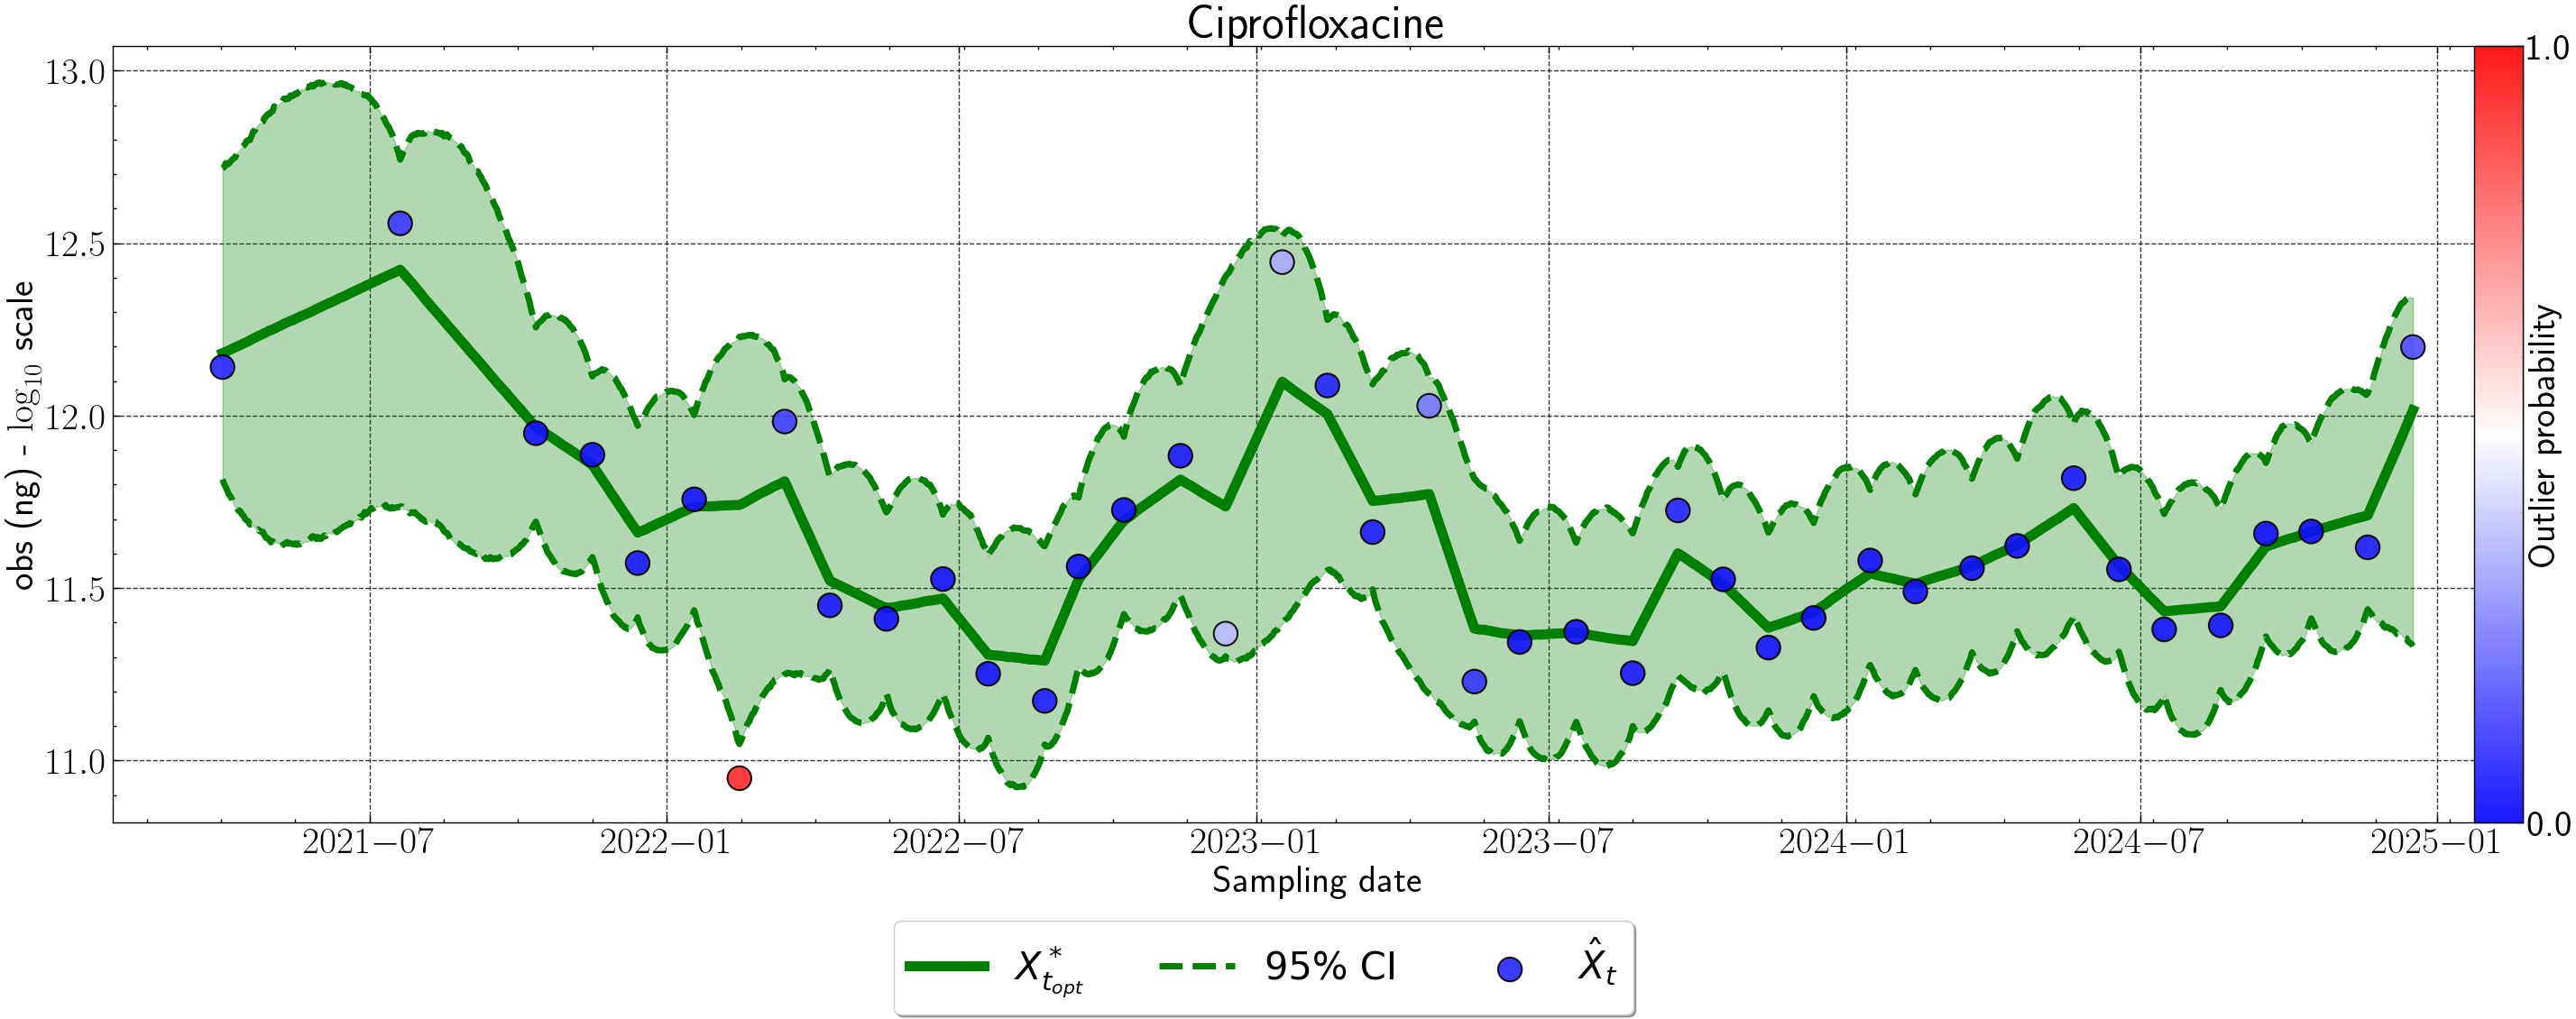

In [62]:
with plt.style.context(['science', 'notebook', 'grid']):

    LABEL_SIZE = 30
    TICK_SIZE = 30
    TITLE_SIZE = 38
    LEGEND_SIZE = 30
    DATES_SIZE = 18
    figsize = (28, 10) #figsize = (32, 10)
    
    plt.rc('axes', labelsize=LABEL_SIZE)
    plt.rc('xtick', labelsize=TICK_SIZE)   
    plt.rc('ytick', labelsize=TICK_SIZE)
    plt.rc('figure', titlesize=TITLE_SIZE)
    plt.rc('legend', fontsize=LEGEND_SIZE)
    plt.rcParams['text.usetex'] = True
    
    fig = plt.figure(figsize=figsize, layout="constrained")
    
    ax_dict = fig.subplot_mosaic(
        """
        A
        """
    )
    
    ### A
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.muX.values, label='$X^*_{t_{opt}}$', color='green', linewidth=8, zorder=3)
    
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICL.values, label='95% CI', linestyle='--', color='green', linewidth=5, zorder=1)
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICU.values, linestyle='--', color='green', linewidth=5, zorder=1)
    
    ax_dict['A'].fill_between(sub_data.dateStart.values, sub_data.ICL.values, sub_data.ICU.values, alpha=.3, color='green')

    
    scatter_points = ax_dict['A'].scatter(sub_data.dateStart.values, sub_data.obs.values, label='$\hat{X}_t$', 
                         c=sub_data.pout.values,
                         cmap='bwr', edgecolor='black', s=360, zorder=3,
                         linewidths=1.5, alpha=0.9, vmin=0, vmax=1)

    
    ax_dict['A'].set_ylabel("obs (ng) - $\log_{10}$ scale")
    ax_dict['A'].set_xlabel("Sampling date")
    ax_dict['A'].tick_params(axis='x', labelsize=TICK_SIZE)
    ax_dict['A'].tick_params(axis='y', labelsize=TICK_SIZE)
    ax_dict['A'].grid(linewidth=1, color='black', alpha=0.8)
    ax_dict['A'].set_title(this_molecule, size=TITLE_SIZE)

    ### Outlier probability legend:
    cmin, cmax = 0.0, 1.0 
    axins1 = inset_axes(ax_dict['A'], width='2%', height='100%', loc='right', borderpad=0)
    axins1.grid(False)
    cbar = fig.colorbar(scatter_points, cax=axins1, orientation='vertical')
    
    # Setting tick limits:
    cbar.set_ticks([cmin, cmax])
    cbar.ax.yaxis.set_major_locator(ticker.FixedLocator([cmin, cmax]))
    
    # Standardizing the float format displayed:
    decimal_places = 1
    cbar.ax.set_yticklabels([f"{cmin:.{decimal_places}f}", f"{cmax:.{decimal_places}f}"], fontsize=TICK_SIZE)

    # Placing the label at the right spot:
    cbar.ax.set_ylabel('Outlier probability', size=TICK_SIZE, labelpad=-35)

    # Main legend
    plt.rcParams['text.usetex'] = False
    h1, l1 = ax_dict['A'].get_legend_handles_labels()
    fig.legend(h1, l1, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=5)
    
    plt.show()

In [63]:
### Pout estimé par le SCOU NUTS

In [64]:
for molecule in list(RW2s.keys()):
    this_file = RW2s[molecule]
    this_file.to_csv('../outputs/files/chemical_data_manuscript/' + molecule + '.csv', sep=';', index=False)

In [22]:
full_data.Molecule.unique()

array(['Volume Prétraité Bassins de Clichy',
       'Emissaire Genéral Estimation Pompage', 'Débit Seine Centre',
       'Acénaphtène', 'Ammonium', 'Anthracène', 'Azote Kjeldahl',
       'Benzo[a]anthracène', 'Benzo[a]pyrène', 'Benzo[b]fluoranthène',
       'Benzo[g,h,i]perylène', 'Benzo[k]fluoranthène', 'Chrysène',
       'Coliformes Thermotolérants', 'Coliformes totaux présomptifs',
       'DBO diluée', 'Dibenzo[ah]anthracène', 'Entérocoques intestinaux',
       'Escherichia coli', 'Fluoranthène', 'Fluorène',
       'Indéno[1,2,3,c,d]pyrène', 'Matières en suspension',
       'Micro-organismes revivifiables\xa0 à 22°C',
       'Micro-organismes revivifiables\xa0 à 36°C', 'Naphtalène', 'NGL',
       'Nitrates', 'Nitrites', 'Orthophosphates', 'PCB 101', 'PCB 118',
       'PCB 138', 'PCB 153', 'PCB 180', 'PCB 28', 'PCB 52', 'pH',
       'Phénanthrène', 'Phosphore', 'Pyrène', 'Somme 15 HAP',
       'Somme 7 PCB',
       'Spores de micro-organismes anaérobies sulfito-réducteurs',
       'S

In [65]:
this_molecule = 'Diclofénac'
this_lod = 0.01 * 1000
this_lod

10.0

In [66]:
sub_data = preprocess_data(this_molecule, this_lod)

In [67]:
sub_data.loc[sub_data.obs <= sub_data.lod]

Empty DataFrame
Columns: [dateStart, obs, Raw_lod, Raw_concentration, lod, plantVolume]
Index: []

In [68]:
lod_matrix = sub_data.lod.values
observation_matrix = sub_data.obs.values

filename = 'discard.nc'
tuning_iters = 12000
sampling_iters = 2000
nb_chains = 15

snc_ar1_nuts = SCOU_RW1_NUTS(observation_matrix, lod_matrix, tuning_iters=tuning_iters, sampling_iters=sampling_iters,
                             export_name=filename, 
                             p_out_frozen=-1, nb_chains=nb_chains, export_chains=False,
                             RW_order=1)
snc_ar1_nuts.fit()

# Done
notify_mac("Jupyter", "Work done !")

/opt/anaconda3/envs/pymc5/lib/python3.9/site-packages/pymc/distributions/timeseries.py:558: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100, shape=...)`. You can specify an init_dist manually to suppress this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (15 chains in 4 jobs)
NUTS: [sig, eps, p_out, latent]


Sampling 15 chains for 12_000 tune and 2_000 draw iterations (180_000 + 30_000 draws total) took 3323 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 8 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


Raw summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.203  0.521   0.036    1.425      0.131    0.094      45.0      20.0   
eps    0.222  0.350   0.072    0.320      0.048    0.034      63.0      21.0   
p_out  0.178  0.199   0.021    0.842      0.049    0.037      56.0      21.0   

       r_hat  
sig     1.25  
eps     1.15  
p_out   1.18  


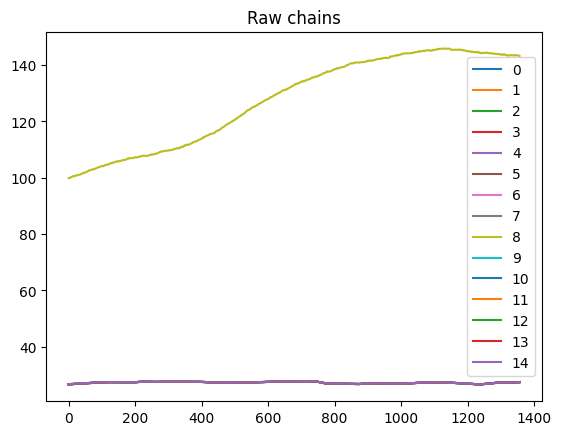

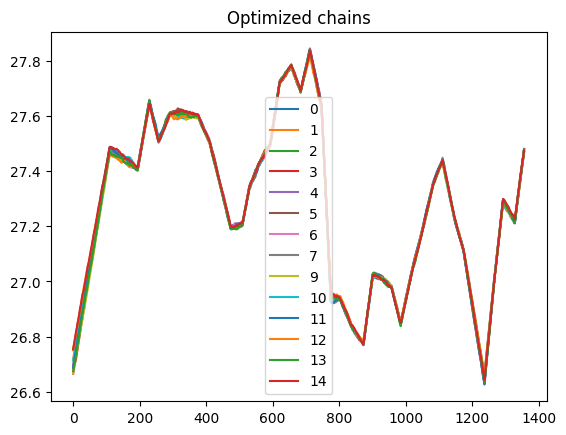

Best chain combination summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.067  0.010   0.048    0.088      0.001    0.001     182.0     529.0   
eps    0.170  0.045   0.090    0.254      0.000    0.000   10830.0   17986.0   
p_out  0.126  0.053   0.036    0.224      0.000    0.000   23813.0   16676.0   

       r_hat  
sig     1.06  
eps     1.00  
p_out   1.00  


In [70]:
selected_chains = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
remove_those = [8]#[2, 5, 8, 6, 3]
for i in remove_those:
    selected_chains.remove(i)


snc_ar1_nuts.visualize_latents(selected_chains)
snc_ar1_nuts.predict(selected_chains)

In [71]:
sub_data['muX'] = snc_ar1_nuts.muX
sub_data['ICL'] = snc_ar1_nuts.CIL
sub_data['ICU'] = snc_ar1_nuts.CIU
sub_data['pout'] = snc_ar1_nuts.pointwise_pout

sub_data.obs = np.log10(np.exp(sub_data.obs))
sub_data.muX = np.log10(np.exp(sub_data.muX))
sub_data.ICL = np.log10(np.exp(sub_data.ICL))
sub_data.ICU = np.log10(np.exp(sub_data.ICU))

RW2s[this_molecule] = sub_data.copy()

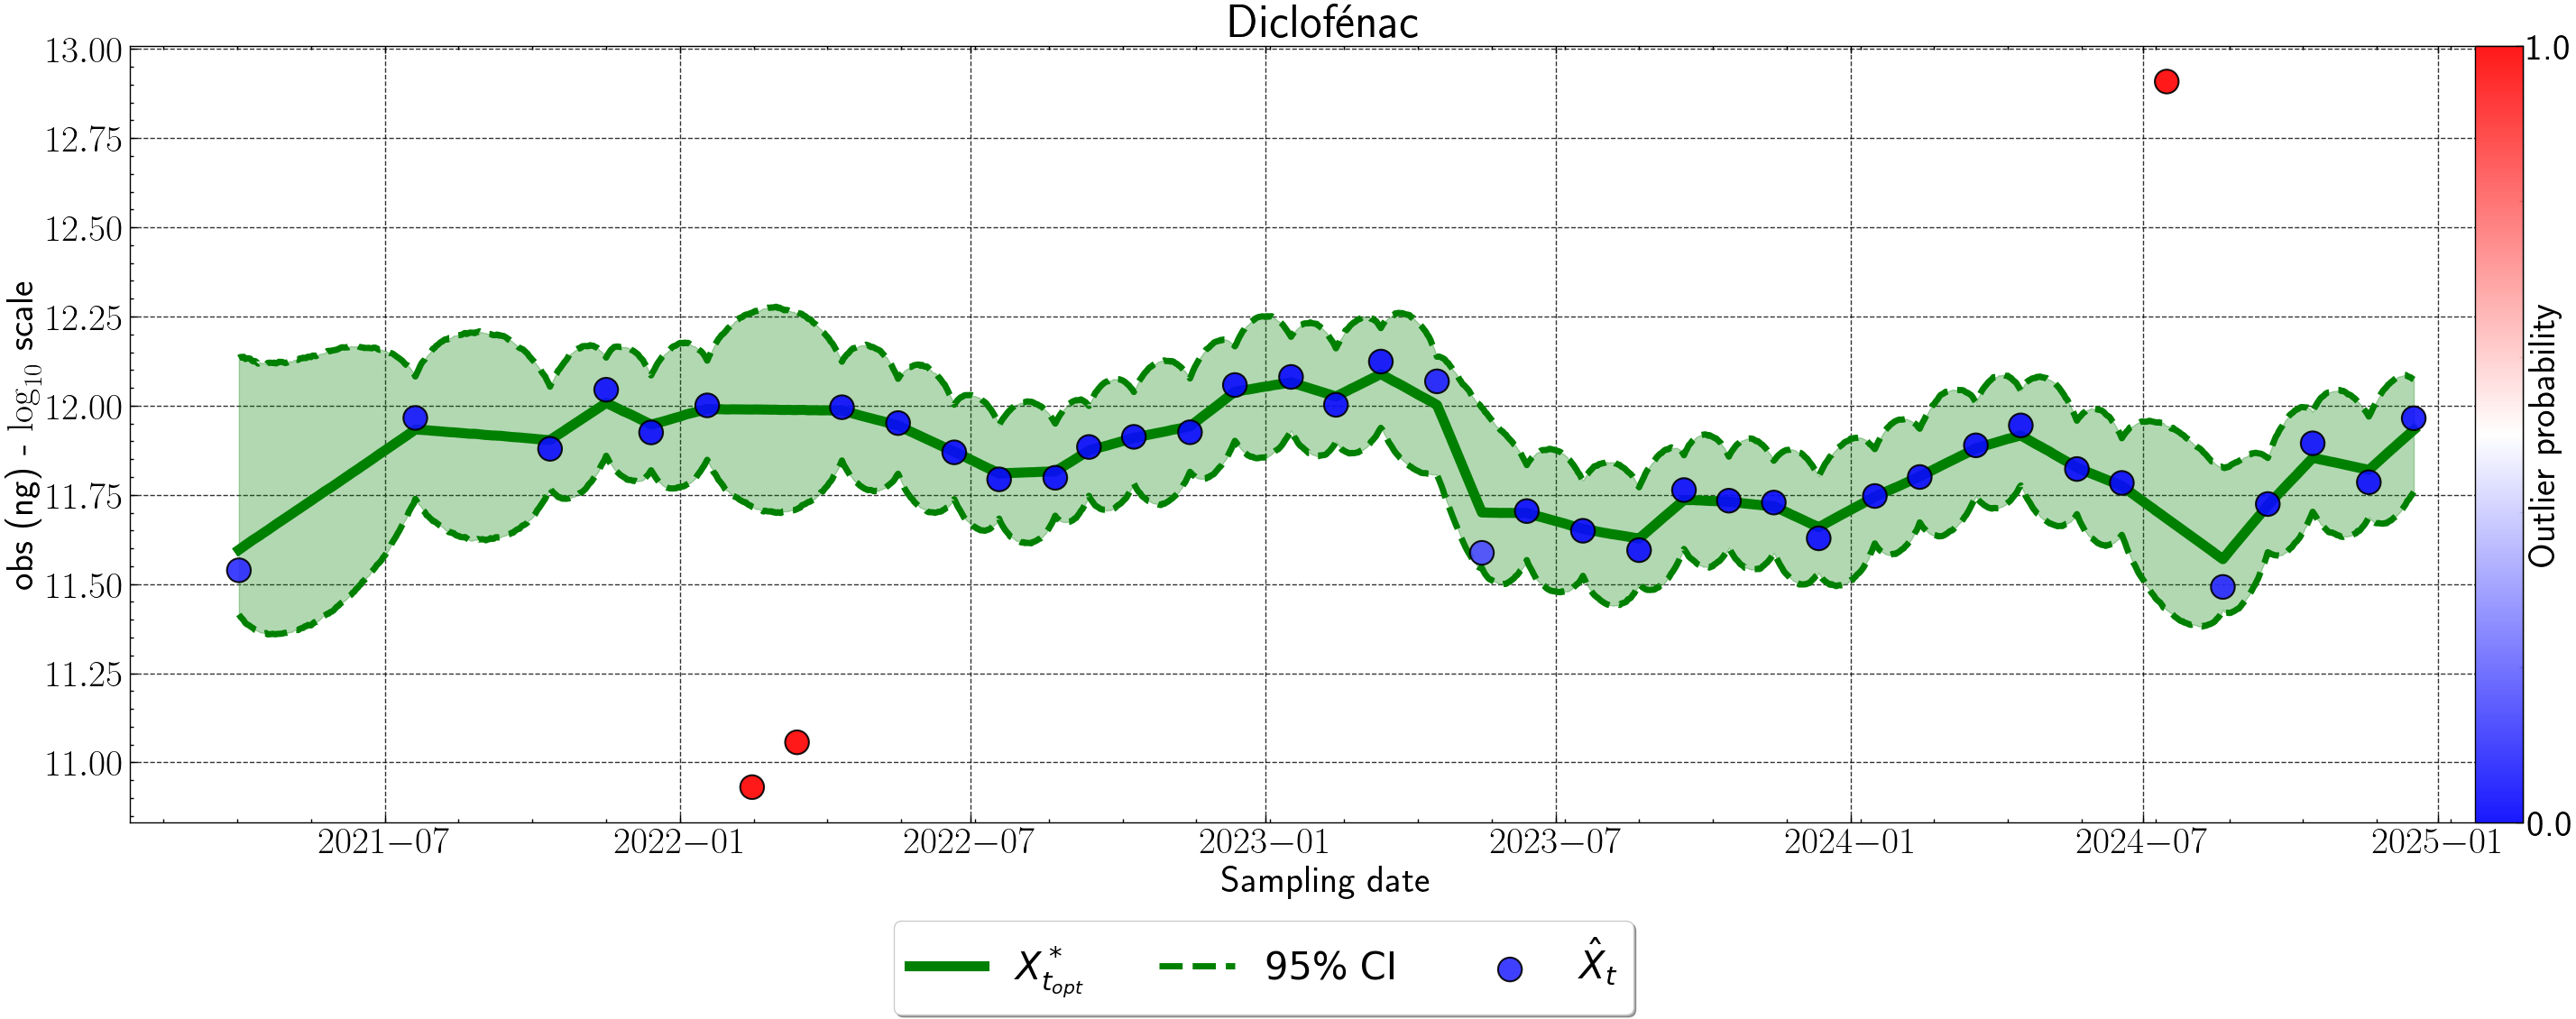

In [72]:
with plt.style.context(['science', 'notebook', 'grid']):

    LABEL_SIZE = 30
    TICK_SIZE = 30
    TITLE_SIZE = 38
    LEGEND_SIZE = 30
    DATES_SIZE = 18
    figsize = (28, 10) #figsize = (32, 10)
    
    plt.rc('axes', labelsize=LABEL_SIZE)
    plt.rc('xtick', labelsize=TICK_SIZE)   
    plt.rc('ytick', labelsize=TICK_SIZE)
    plt.rc('figure', titlesize=TITLE_SIZE)
    plt.rc('legend', fontsize=LEGEND_SIZE)
    plt.rcParams['text.usetex'] = True
    
    fig = plt.figure(figsize=figsize, layout="constrained")
    
    ax_dict = fig.subplot_mosaic(
        """
        A
        """
    )
    
    ### A
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.muX.values, label='$X^*_{t_{opt}}$', color='green', linewidth=8, zorder=3)
    
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICL.values, label='95% CI', linestyle='--', color='green', linewidth=5, zorder=1)
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICU.values, linestyle='--', color='green', linewidth=5, zorder=1)
    
    ax_dict['A'].fill_between(sub_data.dateStart.values, sub_data.ICL.values, sub_data.ICU.values, alpha=.3, color='green')

    
    scatter_points = ax_dict['A'].scatter(sub_data.dateStart.values, sub_data.obs.values, label='$\hat{X}_t$', 
                         c=sub_data.pout.values,
                         cmap='bwr', edgecolor='black', s=360, zorder=3,
                         linewidths=1.5, alpha=0.9, vmin=0, vmax=1)

    
    ax_dict['A'].set_ylabel("obs (ng) - $\log_{10}$ scale")
    ax_dict['A'].set_xlabel("Sampling date")
    ax_dict['A'].tick_params(axis='x', labelsize=TICK_SIZE)
    ax_dict['A'].tick_params(axis='y', labelsize=TICK_SIZE)
    ax_dict['A'].grid(linewidth=1, color='black', alpha=0.8)
    ax_dict['A'].set_title(this_molecule, size=TITLE_SIZE)

    ### Outlier probability legend:
    cmin, cmax = 0.0, 1.0 
    axins1 = inset_axes(ax_dict['A'], width='2%', height='100%', loc='right', borderpad=0)
    axins1.grid(False)
    cbar = fig.colorbar(scatter_points, cax=axins1, orientation='vertical')
    
    # Setting tick limits:
    cbar.set_ticks([cmin, cmax])
    cbar.ax.yaxis.set_major_locator(ticker.FixedLocator([cmin, cmax]))
    
    # Standardizing the float format displayed:
    decimal_places = 1
    cbar.ax.set_yticklabels([f"{cmin:.{decimal_places}f}", f"{cmax:.{decimal_places}f}"], fontsize=TICK_SIZE)

    # Placing the label at the right spot:
    cbar.ax.set_ylabel('Outlier probability', size=TICK_SIZE, labelpad=-35)

    # Main legend
    plt.rcParams['text.usetex'] = False
    h1, l1 = ax_dict['A'].get_legend_handles_labels()
    fig.legend(h1, l1, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=5)
    
    plt.show()

In [73]:
### Pout estimé par le SCOU NUTS

In [74]:
for molecule in list(RW2s.keys()):
    this_file = RW2s[molecule]
    this_file.to_csv('../outputs/files/chemical_data_manuscript/' + molecule + '.csv', sep=';', index=False)

In [22]:
full_data.Molecule.unique()

array(['Volume Prétraité Bassins de Clichy',
       'Emissaire Genéral Estimation Pompage', 'Débit Seine Centre',
       'Acénaphtène', 'Ammonium', 'Anthracène', 'Azote Kjeldahl',
       'Benzo[a]anthracène', 'Benzo[a]pyrène', 'Benzo[b]fluoranthène',
       'Benzo[g,h,i]perylène', 'Benzo[k]fluoranthène', 'Chrysène',
       'Coliformes Thermotolérants', 'Coliformes totaux présomptifs',
       'DBO diluée', 'Dibenzo[ah]anthracène', 'Entérocoques intestinaux',
       'Escherichia coli', 'Fluoranthène', 'Fluorène',
       'Indéno[1,2,3,c,d]pyrène', 'Matières en suspension',
       'Micro-organismes revivifiables\xa0 à 22°C',
       'Micro-organismes revivifiables\xa0 à 36°C', 'Naphtalène', 'NGL',
       'Nitrates', 'Nitrites', 'Orthophosphates', 'PCB 101', 'PCB 118',
       'PCB 138', 'PCB 153', 'PCB 180', 'PCB 28', 'PCB 52', 'pH',
       'Phénanthrène', 'Phosphore', 'Pyrène', 'Somme 15 HAP',
       'Somme 7 PCB',
       'Spores de micro-organismes anaérobies sulfito-réducteurs',
       'S

In [75]:
this_molecule = 'Erythromycine A'
this_lod = 0.02 * 1000
this_lod

20.0

In [76]:
sub_data = preprocess_data(this_molecule, this_lod)

In [77]:
sub_data.loc[sub_data.obs <= sub_data.lod]

Empty DataFrame
Columns: [dateStart, obs, Raw_lod, Raw_concentration, lod, plantVolume]
Index: []

In [78]:
lod_matrix = sub_data.lod.values
observation_matrix = sub_data.obs.values

filename = 'discard.nc'
tuning_iters = 12000
sampling_iters = 2000
nb_chains = 15

snc_ar1_nuts = SCOU_RW1_NUTS(observation_matrix, lod_matrix, tuning_iters=tuning_iters, sampling_iters=sampling_iters,
                             export_name=filename, 
                             p_out_frozen=-1, nb_chains=nb_chains, export_chains=False,
                             RW_order=1)
snc_ar1_nuts.fit()

# Done
notify_mac("Jupyter", "Work done !")

/opt/anaconda3/envs/pymc5/lib/python3.9/site-packages/pymc/distributions/timeseries.py:558: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100, shape=...)`. You can specify an init_dist manually to suppress this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (15 chains in 4 jobs)
NUTS: [sig, eps, p_out, latent]


Sampling 15 chains for 12_000 tune and 2_000 draw iterations (180_000 + 30_000 draws total) took 3510 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Raw summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.120  0.026   0.074    0.168      0.003    0.002      63.0     149.0   
eps    0.359  0.126   0.144    0.596      0.002    0.001    4653.0   13009.0   
p_out  0.098  0.063   0.003    0.211      0.002    0.001    1575.0    6198.0   

       r_hat  
sig     1.17  
eps     1.00  
p_out   1.01  


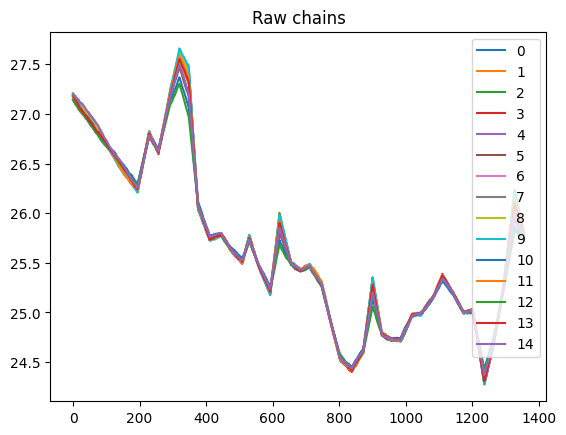

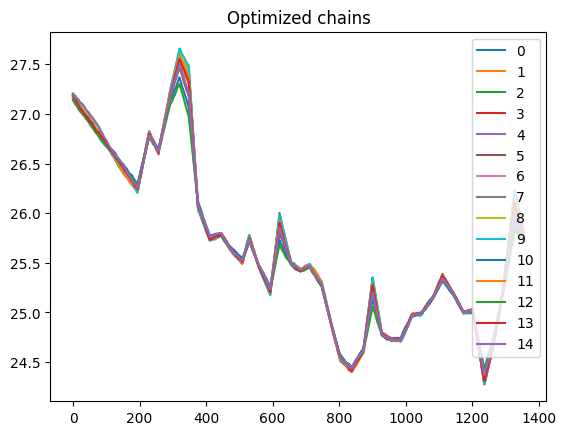

Best chain combination summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.120  0.026   0.074    0.168      0.003    0.002      63.0     149.0   
eps    0.359  0.126   0.144    0.596      0.002    0.001    4653.0   13009.0   
p_out  0.098  0.063   0.003    0.211      0.002    0.001    1575.0    6198.0   

       r_hat  
sig     1.17  
eps     1.00  
p_out   1.01  


In [80]:
selected_chains = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
remove_those = []#[2, 5, 8, 6, 3]
for i in remove_those:
    selected_chains.remove(i)


snc_ar1_nuts.visualize_latents(selected_chains)
snc_ar1_nuts.predict(selected_chains)

In [81]:
sub_data['muX'] = snc_ar1_nuts.muX
sub_data['ICL'] = snc_ar1_nuts.CIL
sub_data['ICU'] = snc_ar1_nuts.CIU
sub_data['pout'] = snc_ar1_nuts.pointwise_pout

sub_data.obs = np.log10(np.exp(sub_data.obs))
sub_data.muX = np.log10(np.exp(sub_data.muX))
sub_data.ICL = np.log10(np.exp(sub_data.ICL))
sub_data.ICU = np.log10(np.exp(sub_data.ICU))

RW2s[this_molecule] = sub_data.copy()

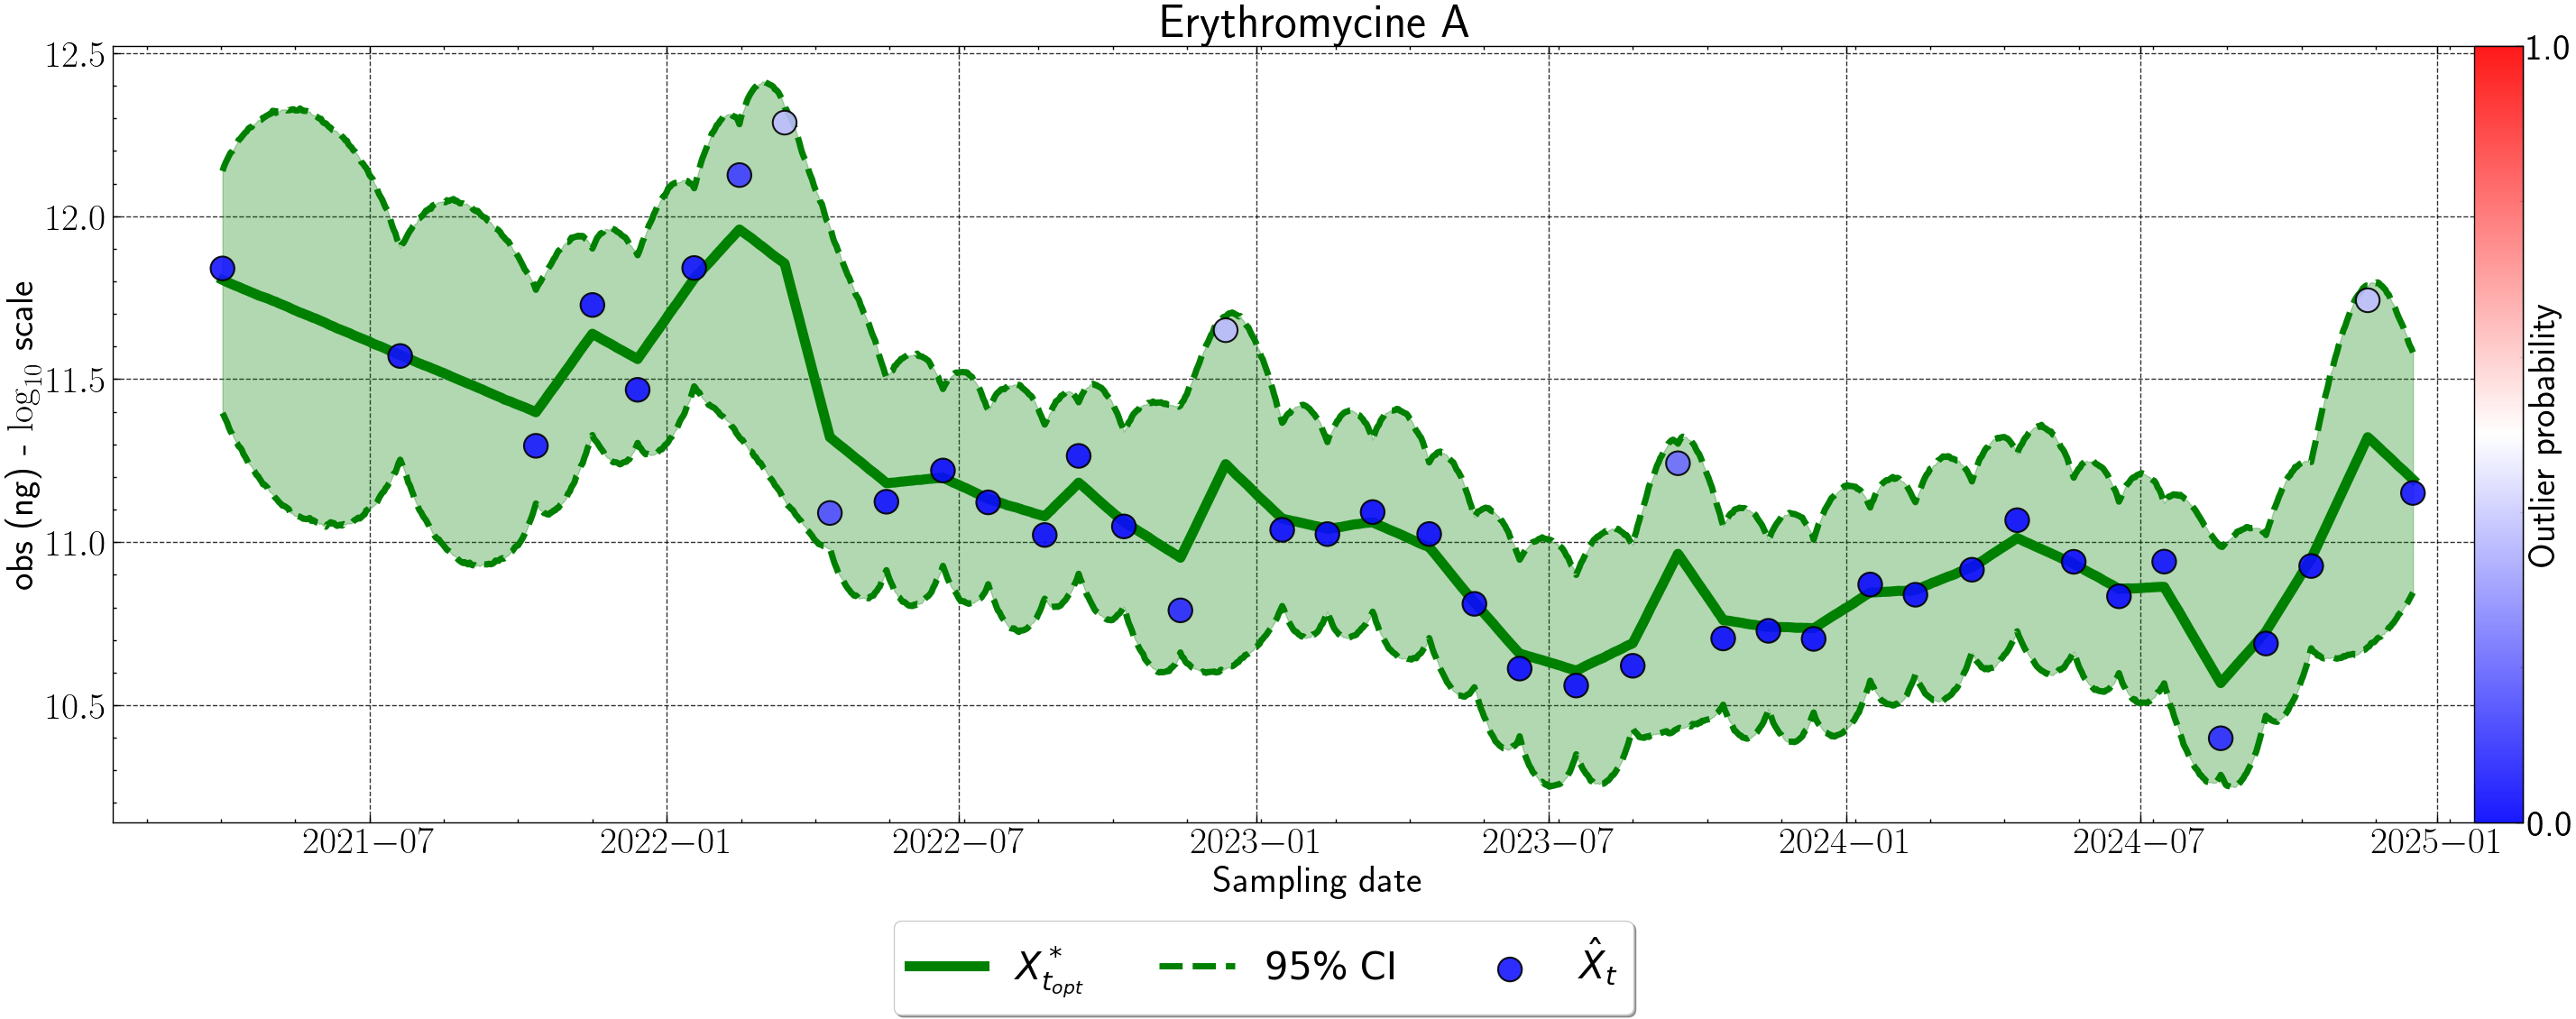

In [82]:
with plt.style.context(['science', 'notebook', 'grid']):

    LABEL_SIZE = 30
    TICK_SIZE = 30
    TITLE_SIZE = 38
    LEGEND_SIZE = 30
    DATES_SIZE = 18
    figsize = (28, 10) #figsize = (32, 10)
    
    plt.rc('axes', labelsize=LABEL_SIZE)
    plt.rc('xtick', labelsize=TICK_SIZE)   
    plt.rc('ytick', labelsize=TICK_SIZE)
    plt.rc('figure', titlesize=TITLE_SIZE)
    plt.rc('legend', fontsize=LEGEND_SIZE)
    plt.rcParams['text.usetex'] = True
    
    fig = plt.figure(figsize=figsize, layout="constrained")
    
    ax_dict = fig.subplot_mosaic(
        """
        A
        """
    )
    
    ### A
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.muX.values, label='$X^*_{t_{opt}}$', color='green', linewidth=8, zorder=3)
    
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICL.values, label='95% CI', linestyle='--', color='green', linewidth=5, zorder=1)
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICU.values, linestyle='--', color='green', linewidth=5, zorder=1)
    
    ax_dict['A'].fill_between(sub_data.dateStart.values, sub_data.ICL.values, sub_data.ICU.values, alpha=.3, color='green')

    
    scatter_points = ax_dict['A'].scatter(sub_data.dateStart.values, sub_data.obs.values, label='$\hat{X}_t$', 
                         c=sub_data.pout.values,
                         cmap='bwr', edgecolor='black', s=360, zorder=3,
                         linewidths=1.5, alpha=0.9, vmin=0, vmax=1)

    
    ax_dict['A'].set_ylabel("obs (ng) - $\log_{10}$ scale")
    ax_dict['A'].set_xlabel("Sampling date")
    ax_dict['A'].tick_params(axis='x', labelsize=TICK_SIZE)
    ax_dict['A'].tick_params(axis='y', labelsize=TICK_SIZE)
    ax_dict['A'].grid(linewidth=1, color='black', alpha=0.8)
    ax_dict['A'].set_title(this_molecule, size=TITLE_SIZE)

    ### Outlier probability legend:
    cmin, cmax = 0.0, 1.0 
    axins1 = inset_axes(ax_dict['A'], width='2%', height='100%', loc='right', borderpad=0)
    axins1.grid(False)
    cbar = fig.colorbar(scatter_points, cax=axins1, orientation='vertical')
    
    # Setting tick limits:
    cbar.set_ticks([cmin, cmax])
    cbar.ax.yaxis.set_major_locator(ticker.FixedLocator([cmin, cmax]))
    
    # Standardizing the float format displayed:
    decimal_places = 1
    cbar.ax.set_yticklabels([f"{cmin:.{decimal_places}f}", f"{cmax:.{decimal_places}f}"], fontsize=TICK_SIZE)

    # Placing the label at the right spot:
    cbar.ax.set_ylabel('Outlier probability', size=TICK_SIZE, labelpad=-35)

    # Main legend
    plt.rcParams['text.usetex'] = False
    h1, l1 = ax_dict['A'].get_legend_handles_labels()
    fig.legend(h1, l1, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=5)
    
    plt.show()

In [83]:
### Pout estimé par le SCOU NUTS

In [84]:
for molecule in list(RW2s.keys()):
    this_file = RW2s[molecule]
    this_file.to_csv('../outputs/files/chemical_data_manuscript/' + molecule + '.csv', sep=';', index=False)

In [22]:
full_data.Molecule.unique()

array(['Volume Prétraité Bassins de Clichy',
       'Emissaire Genéral Estimation Pompage', 'Débit Seine Centre',
       'Acénaphtène', 'Ammonium', 'Anthracène', 'Azote Kjeldahl',
       'Benzo[a]anthracène', 'Benzo[a]pyrène', 'Benzo[b]fluoranthène',
       'Benzo[g,h,i]perylène', 'Benzo[k]fluoranthène', 'Chrysène',
       'Coliformes Thermotolérants', 'Coliformes totaux présomptifs',
       'DBO diluée', 'Dibenzo[ah]anthracène', 'Entérocoques intestinaux',
       'Escherichia coli', 'Fluoranthène', 'Fluorène',
       'Indéno[1,2,3,c,d]pyrène', 'Matières en suspension',
       'Micro-organismes revivifiables\xa0 à 22°C',
       'Micro-organismes revivifiables\xa0 à 36°C', 'Naphtalène', 'NGL',
       'Nitrates', 'Nitrites', 'Orthophosphates', 'PCB 101', 'PCB 118',
       'PCB 138', 'PCB 153', 'PCB 180', 'PCB 28', 'PCB 52', 'pH',
       'Phénanthrène', 'Phosphore', 'Pyrène', 'Somme 15 HAP',
       'Somme 7 PCB',
       'Spores de micro-organismes anaérobies sulfito-réducteurs',
       'S

In [85]:
this_molecule = 'Ibuprofène'
this_lod = 0.3 * 1000
this_lod

300.0

In [86]:
sub_data = preprocess_data(this_molecule, this_lod)

In [87]:
sub_data.loc[sub_data.obs <= sub_data.lod]

Empty DataFrame
Columns: [dateStart, obs, Raw_lod, Raw_concentration, lod, plantVolume]
Index: []

In [88]:
lod_matrix = sub_data.lod.values
observation_matrix = sub_data.obs.values

filename = 'discard.nc'
tuning_iters = 12000
sampling_iters = 2000
nb_chains = 15

snc_ar1_nuts = SCOU_RW1_NUTS(observation_matrix, lod_matrix, tuning_iters=tuning_iters, sampling_iters=sampling_iters,
                             export_name=filename, 
                             p_out_frozen=-1, nb_chains=nb_chains, export_chains=False,
                             RW_order=1)
snc_ar1_nuts.fit()

# Done
notify_mac("Jupyter", "Work done !")

/opt/anaconda3/envs/pymc5/lib/python3.9/site-packages/pymc/distributions/timeseries.py:558: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100, shape=...)`. You can specify an init_dist manually to suppress this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (15 chains in 4 jobs)
NUTS: [sig, eps, p_out, latent]


Sampling 15 chains for 12_000 tune and 2_000 draw iterations (180_000 + 30_000 draws total) took 4315 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 9 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 11 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


Raw summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.138  0.154   0.050    0.405      0.038    0.027      31.0      19.0   
eps    0.373  0.477   0.110    0.626      0.038    0.027     147.0      61.0   
p_out  0.218  0.198   0.006    0.835      0.047    0.036      52.0      21.0   

       r_hat  
sig     1.43  
eps     1.06  
p_out   1.19  


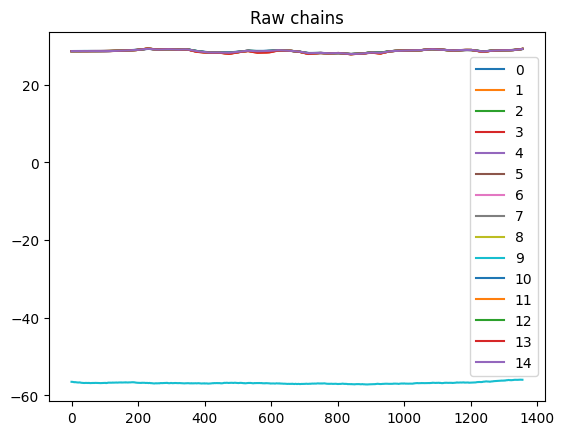

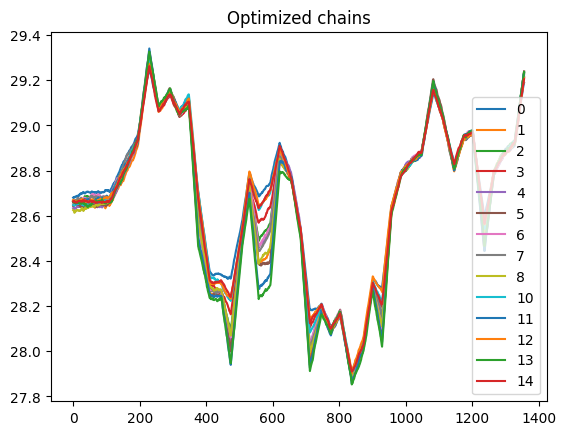

Best chain combination summary:
       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.10  0.024   0.059    0.146      0.004    0.003      48.0     144.0   
eps    0.33  0.130   0.122    0.577      0.002    0.001    4176.0   13716.0   
p_out  0.17  0.082   0.022    0.317      0.003    0.002     757.0    9865.0   

       r_hat  
sig     1.23  
eps     1.00  
p_out   1.02  


In [91]:
selected_chains = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
remove_those = [9]#[2, 5, 8, 6, 3]
for i in remove_those:
    selected_chains.remove(i)


snc_ar1_nuts.visualize_latents(selected_chains)
snc_ar1_nuts.predict(selected_chains)

In [92]:
sub_data['muX'] = snc_ar1_nuts.muX
sub_data['ICL'] = snc_ar1_nuts.CIL
sub_data['ICU'] = snc_ar1_nuts.CIU
sub_data['pout'] = snc_ar1_nuts.pointwise_pout

sub_data.obs = np.log10(np.exp(sub_data.obs))
sub_data.muX = np.log10(np.exp(sub_data.muX))
sub_data.ICL = np.log10(np.exp(sub_data.ICL))
sub_data.ICU = np.log10(np.exp(sub_data.ICU))

RW2s[this_molecule] = sub_data.copy()

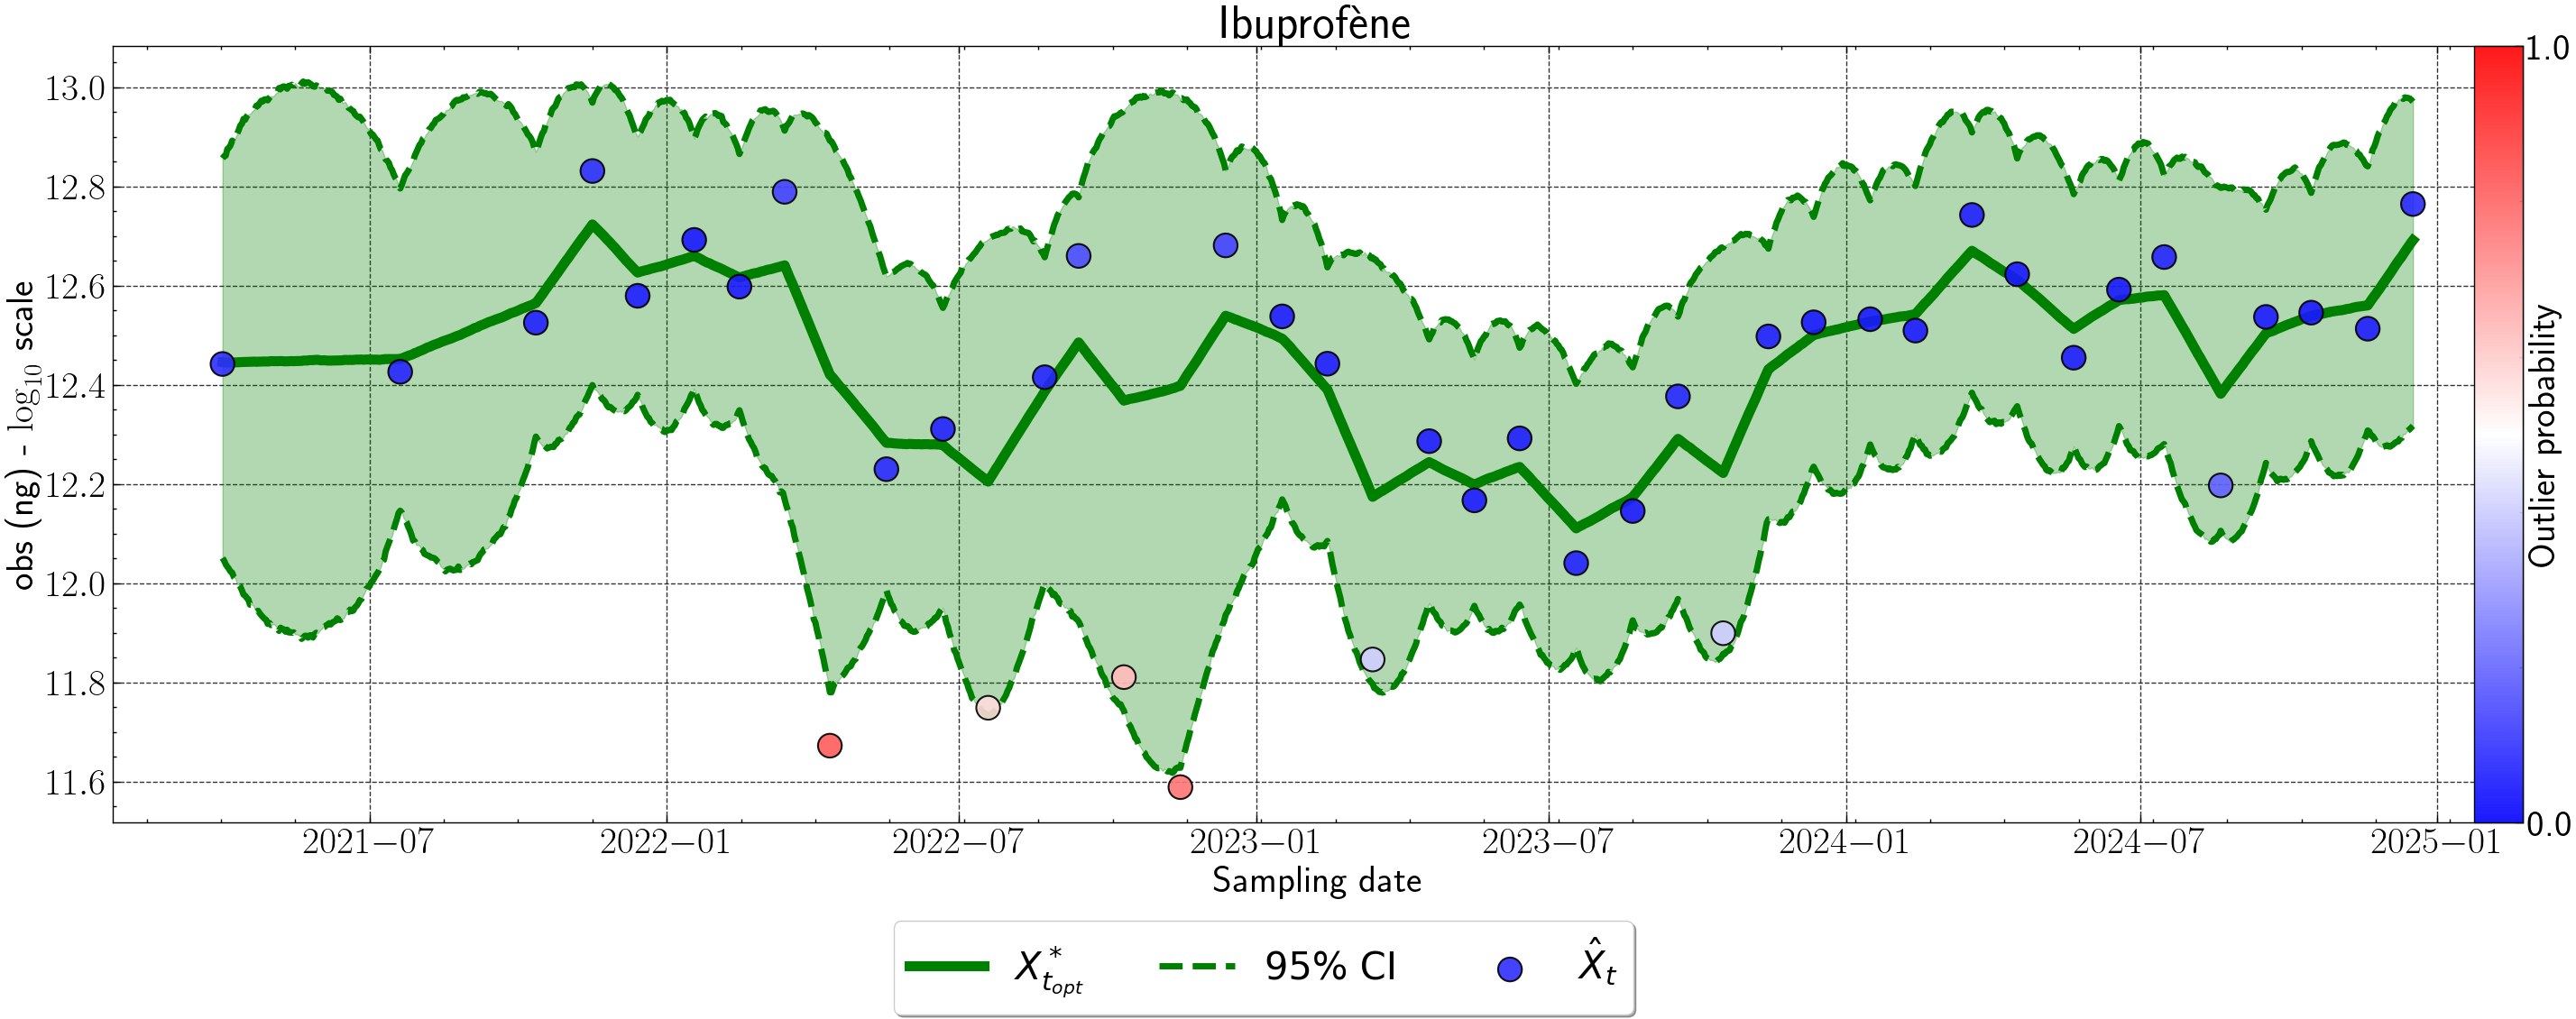

In [93]:
with plt.style.context(['science', 'notebook', 'grid']):

    LABEL_SIZE = 30
    TICK_SIZE = 30
    TITLE_SIZE = 38
    LEGEND_SIZE = 30
    DATES_SIZE = 18
    figsize = (28, 10) #figsize = (32, 10)
    
    plt.rc('axes', labelsize=LABEL_SIZE)
    plt.rc('xtick', labelsize=TICK_SIZE)   
    plt.rc('ytick', labelsize=TICK_SIZE)
    plt.rc('figure', titlesize=TITLE_SIZE)
    plt.rc('legend', fontsize=LEGEND_SIZE)
    plt.rcParams['text.usetex'] = True
    
    fig = plt.figure(figsize=figsize, layout="constrained")
    
    ax_dict = fig.subplot_mosaic(
        """
        A
        """
    )
    
    ### A
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.muX.values, label='$X^*_{t_{opt}}$', color='green', linewidth=8, zorder=3)
    
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICL.values, label='95% CI', linestyle='--', color='green', linewidth=5, zorder=1)
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICU.values, linestyle='--', color='green', linewidth=5, zorder=1)
    
    ax_dict['A'].fill_between(sub_data.dateStart.values, sub_data.ICL.values, sub_data.ICU.values, alpha=.3, color='green')

    
    scatter_points = ax_dict['A'].scatter(sub_data.dateStart.values, sub_data.obs.values, label='$\hat{X}_t$', 
                         c=sub_data.pout.values,
                         cmap='bwr', edgecolor='black', s=360, zorder=3,
                         linewidths=1.5, alpha=0.9, vmin=0, vmax=1)

    
    ax_dict['A'].set_ylabel("obs (ng) - $\log_{10}$ scale")
    ax_dict['A'].set_xlabel("Sampling date")
    ax_dict['A'].tick_params(axis='x', labelsize=TICK_SIZE)
    ax_dict['A'].tick_params(axis='y', labelsize=TICK_SIZE)
    ax_dict['A'].grid(linewidth=1, color='black', alpha=0.8)
    ax_dict['A'].set_title(this_molecule, size=TITLE_SIZE)

    ### Outlier probability legend:
    cmin, cmax = 0.0, 1.0 
    axins1 = inset_axes(ax_dict['A'], width='2%', height='100%', loc='right', borderpad=0)
    axins1.grid(False)
    cbar = fig.colorbar(scatter_points, cax=axins1, orientation='vertical')
    
    # Setting tick limits:
    cbar.set_ticks([cmin, cmax])
    cbar.ax.yaxis.set_major_locator(ticker.FixedLocator([cmin, cmax]))
    
    # Standardizing the float format displayed:
    decimal_places = 1
    cbar.ax.set_yticklabels([f"{cmin:.{decimal_places}f}", f"{cmax:.{decimal_places}f}"], fontsize=TICK_SIZE)

    # Placing the label at the right spot:
    cbar.ax.set_ylabel('Outlier probability', size=TICK_SIZE, labelpad=-35)

    # Main legend
    plt.rcParams['text.usetex'] = False
    h1, l1 = ax_dict['A'].get_legend_handles_labels()
    fig.legend(h1, l1, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=5)
    
    plt.show()

In [94]:
### Pout estimé par le SCOU NUTS

In [95]:
for molecule in list(RW2s.keys()):
    this_file = RW2s[molecule]
    this_file.to_csv('../outputs/files/chemical_data_manuscript/' + molecule + '.csv', sep=';', index=False)

In [22]:
full_data.Molecule.unique()

array(['Volume Prétraité Bassins de Clichy',
       'Emissaire Genéral Estimation Pompage', 'Débit Seine Centre',
       'Acénaphtène', 'Ammonium', 'Anthracène', 'Azote Kjeldahl',
       'Benzo[a]anthracène', 'Benzo[a]pyrène', 'Benzo[b]fluoranthène',
       'Benzo[g,h,i]perylène', 'Benzo[k]fluoranthène', 'Chrysène',
       'Coliformes Thermotolérants', 'Coliformes totaux présomptifs',
       'DBO diluée', 'Dibenzo[ah]anthracène', 'Entérocoques intestinaux',
       'Escherichia coli', 'Fluoranthène', 'Fluorène',
       'Indéno[1,2,3,c,d]pyrène', 'Matières en suspension',
       'Micro-organismes revivifiables\xa0 à 22°C',
       'Micro-organismes revivifiables\xa0 à 36°C', 'Naphtalène', 'NGL',
       'Nitrates', 'Nitrites', 'Orthophosphates', 'PCB 101', 'PCB 118',
       'PCB 138', 'PCB 153', 'PCB 180', 'PCB 28', 'PCB 52', 'pH',
       'Phénanthrène', 'Phosphore', 'Pyrène', 'Somme 15 HAP',
       'Somme 7 PCB',
       'Spores de micro-organismes anaérobies sulfito-réducteurs',
       'S

In [96]:
this_molecule = 'Kétoprofène'
this_lod = 0.02 * 1000
this_lod

20.0

In [97]:
sub_data = preprocess_data(this_molecule, this_lod)

In [98]:
sub_data.loc[sub_data.obs <= sub_data.lod]

Empty DataFrame
Columns: [dateStart, obs, Raw_lod, Raw_concentration, lod, plantVolume]
Index: []

In [99]:
lod_matrix = sub_data.lod.values
observation_matrix = sub_data.obs.values

filename = 'discard.nc'
tuning_iters = 12000
sampling_iters = 2000
nb_chains = 15

snc_ar1_nuts = SCOU_RW1_NUTS(observation_matrix, lod_matrix, tuning_iters=tuning_iters, sampling_iters=sampling_iters,
                             export_name=filename, 
                             p_out_frozen=-1, nb_chains=nb_chains, export_chains=False,
                             RW_order=1)
snc_ar1_nuts.fit()

# Done
notify_mac("Jupyter", "Work done !")

/opt/anaconda3/envs/pymc5/lib/python3.9/site-packages/pymc/distributions/timeseries.py:558: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100, shape=...)`. You can specify an init_dist manually to suppress this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (15 chains in 4 jobs)
NUTS: [sig, eps, p_out, latent]


Sampling 15 chains for 12_000 tune and 2_000 draw iterations (180_000 + 30_000 draws total) took 4830 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 4 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 6 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameteriz

Raw summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.510  0.589   0.044    1.724      0.140    0.100      19.0      43.0   
eps    0.619  1.307   0.079    1.740      0.094    0.066      29.0     461.0   
p_out  0.516  0.406   0.017    0.953      0.104    0.075      24.0     316.0   

       r_hat  
sig     2.30  
eps     1.44  
p_out   1.68  


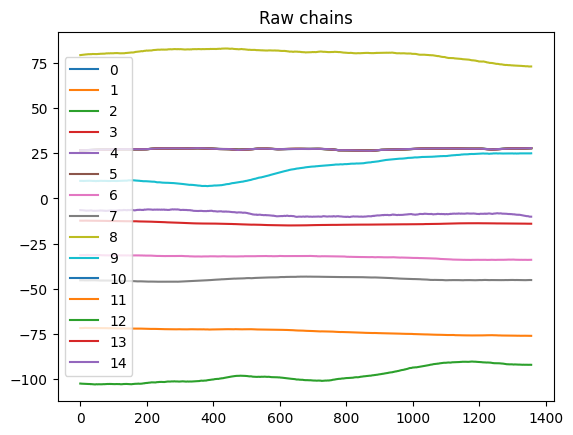

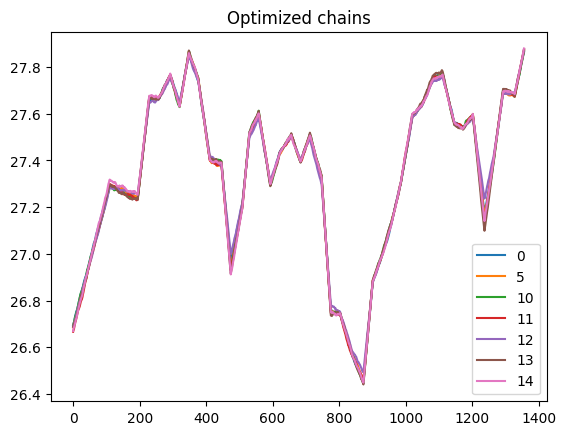

Best chain combination summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.074  0.013   0.050    0.097      0.002    0.001      69.0     193.0   
eps    0.206  0.055   0.109    0.309      0.001    0.001    4914.0    9643.0   
p_out  0.085  0.055   0.004    0.188      0.001    0.000    8481.0    8996.0   

       r_hat  
sig      1.1  
eps      1.0  
p_out    1.0  


In [109]:
selected_chains = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
remove_those = [8, 2, 1, 7, 3, 6, 4, 9]#[2, 5, 8, 6, 3]
for i in remove_those:
    selected_chains.remove(i)


snc_ar1_nuts.visualize_latents(selected_chains)
snc_ar1_nuts.predict(selected_chains)

In [110]:
sub_data['muX'] = snc_ar1_nuts.muX
sub_data['ICL'] = snc_ar1_nuts.CIL
sub_data['ICU'] = snc_ar1_nuts.CIU
sub_data['pout'] = snc_ar1_nuts.pointwise_pout

sub_data.obs = np.log10(np.exp(sub_data.obs))
sub_data.muX = np.log10(np.exp(sub_data.muX))
sub_data.ICL = np.log10(np.exp(sub_data.ICL))
sub_data.ICU = np.log10(np.exp(sub_data.ICU))

RW2s[this_molecule] = sub_data.copy()

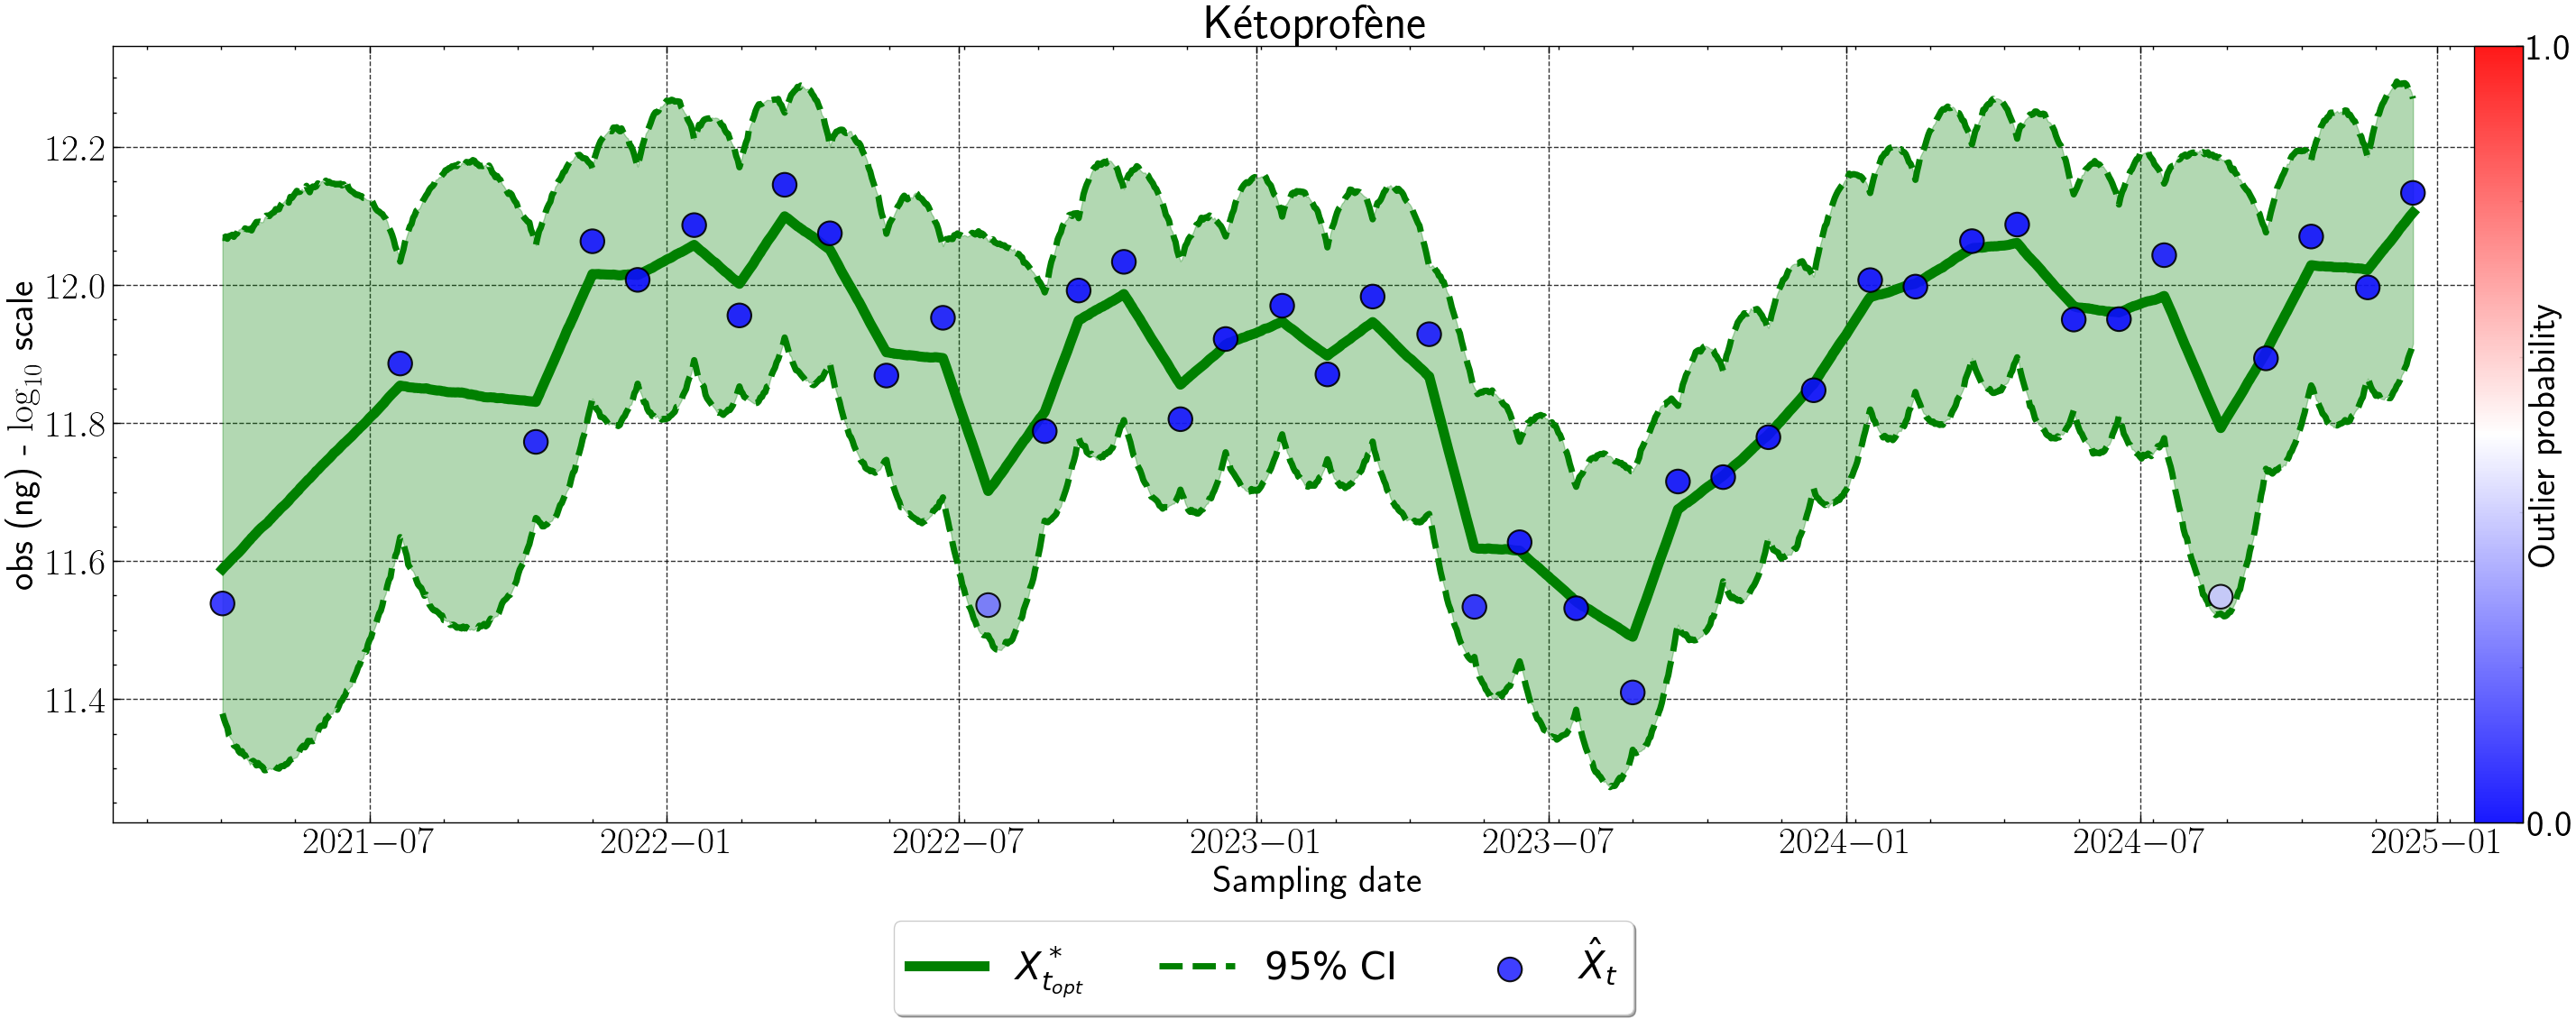

In [111]:
with plt.style.context(['science', 'notebook', 'grid']):

    LABEL_SIZE = 30
    TICK_SIZE = 30
    TITLE_SIZE = 38
    LEGEND_SIZE = 30
    DATES_SIZE = 18
    figsize = (28, 10) #figsize = (32, 10)
    
    plt.rc('axes', labelsize=LABEL_SIZE)
    plt.rc('xtick', labelsize=TICK_SIZE)   
    plt.rc('ytick', labelsize=TICK_SIZE)
    plt.rc('figure', titlesize=TITLE_SIZE)
    plt.rc('legend', fontsize=LEGEND_SIZE)
    plt.rcParams['text.usetex'] = True
    
    fig = plt.figure(figsize=figsize, layout="constrained")
    
    ax_dict = fig.subplot_mosaic(
        """
        A
        """
    )
    
    ### A
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.muX.values, label='$X^*_{t_{opt}}$', color='green', linewidth=8, zorder=3)
    
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICL.values, label='95% CI', linestyle='--', color='green', linewidth=5, zorder=1)
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICU.values, linestyle='--', color='green', linewidth=5, zorder=1)
    
    ax_dict['A'].fill_between(sub_data.dateStart.values, sub_data.ICL.values, sub_data.ICU.values, alpha=.3, color='green')

    
    scatter_points = ax_dict['A'].scatter(sub_data.dateStart.values, sub_data.obs.values, label='$\hat{X}_t$', 
                         c=sub_data.pout.values,
                         cmap='bwr', edgecolor='black', s=360, zorder=3,
                         linewidths=1.5, alpha=0.9, vmin=0, vmax=1)

    
    ax_dict['A'].set_ylabel("obs (ng) - $\log_{10}$ scale")
    ax_dict['A'].set_xlabel("Sampling date")
    ax_dict['A'].tick_params(axis='x', labelsize=TICK_SIZE)
    ax_dict['A'].tick_params(axis='y', labelsize=TICK_SIZE)
    ax_dict['A'].grid(linewidth=1, color='black', alpha=0.8)
    ax_dict['A'].set_title(this_molecule, size=TITLE_SIZE)

    ### Outlier probability legend:
    cmin, cmax = 0.0, 1.0 
    axins1 = inset_axes(ax_dict['A'], width='2%', height='100%', loc='right', borderpad=0)
    axins1.grid(False)
    cbar = fig.colorbar(scatter_points, cax=axins1, orientation='vertical')
    
    # Setting tick limits:
    cbar.set_ticks([cmin, cmax])
    cbar.ax.yaxis.set_major_locator(ticker.FixedLocator([cmin, cmax]))
    
    # Standardizing the float format displayed:
    decimal_places = 1
    cbar.ax.set_yticklabels([f"{cmin:.{decimal_places}f}", f"{cmax:.{decimal_places}f}"], fontsize=TICK_SIZE)

    # Placing the label at the right spot:
    cbar.ax.set_ylabel('Outlier probability', size=TICK_SIZE, labelpad=-35)

    # Main legend
    plt.rcParams['text.usetex'] = False
    h1, l1 = ax_dict['A'].get_legend_handles_labels()
    fig.legend(h1, l1, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=5)
    
    plt.show()

In [112]:
### Pout estimé par le SCOU NUTS

In [113]:
for molecule in list(RW2s.keys()):
    this_file = RW2s[molecule]
    this_file.to_csv('../outputs/files/chemical_data_manuscript/' + molecule + '.csv', sep=';', index=False)

In [22]:
full_data.Molecule.unique()

array(['Volume Prétraité Bassins de Clichy',
       'Emissaire Genéral Estimation Pompage', 'Débit Seine Centre',
       'Acénaphtène', 'Ammonium', 'Anthracène', 'Azote Kjeldahl',
       'Benzo[a]anthracène', 'Benzo[a]pyrène', 'Benzo[b]fluoranthène',
       'Benzo[g,h,i]perylène', 'Benzo[k]fluoranthène', 'Chrysène',
       'Coliformes Thermotolérants', 'Coliformes totaux présomptifs',
       'DBO diluée', 'Dibenzo[ah]anthracène', 'Entérocoques intestinaux',
       'Escherichia coli', 'Fluoranthène', 'Fluorène',
       'Indéno[1,2,3,c,d]pyrène', 'Matières en suspension',
       'Micro-organismes revivifiables\xa0 à 22°C',
       'Micro-organismes revivifiables\xa0 à 36°C', 'Naphtalène', 'NGL',
       'Nitrates', 'Nitrites', 'Orthophosphates', 'PCB 101', 'PCB 118',
       'PCB 138', 'PCB 153', 'PCB 180', 'PCB 28', 'PCB 52', 'pH',
       'Phénanthrène', 'Phosphore', 'Pyrène', 'Somme 15 HAP',
       'Somme 7 PCB',
       'Spores de micro-organismes anaérobies sulfito-réducteurs',
       'S

In [114]:
this_molecule = 'Naproxène'
this_lod = 0.05 * 1000
this_lod

50.0

In [115]:
sub_data = preprocess_data(this_molecule, this_lod)

In [116]:
sub_data.loc[sub_data.obs <= sub_data.lod]

Empty DataFrame
Columns: [dateStart, obs, Raw_lod, Raw_concentration, lod, plantVolume]
Index: []

In [117]:
lod_matrix = sub_data.lod.values
observation_matrix = sub_data.obs.values

filename = 'discard.nc'
tuning_iters = 12000
sampling_iters = 2000
nb_chains = 15

snc_ar1_nuts = SCOU_RW1_NUTS(observation_matrix, lod_matrix, tuning_iters=tuning_iters, sampling_iters=sampling_iters,
                             export_name=filename, 
                             p_out_frozen=-1, nb_chains=nb_chains, export_chains=False,
                             RW_order=1)
snc_ar1_nuts.fit()

# Done
notify_mac("Jupyter", "Work done !")

/opt/anaconda3/envs/pymc5/lib/python3.9/site-packages/pymc/distributions/timeseries.py:558: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100, shape=...)`. You can specify an init_dist manually to suppress this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (15 chains in 4 jobs)
NUTS: [sig, eps, p_out, latent]


Sampling 15 chains for 12_000 tune and 2_000 draw iterations (180_000 + 30_000 draws total) took 4096 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 6 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 13 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


Raw summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.203  0.369   0.043    1.111      0.092    0.066      31.0      20.0   
eps    0.333  0.787   0.092    0.655      0.062    0.044      50.0      46.0   
p_out  0.188  0.282   0.003    0.907      0.072    0.052      37.0      46.0   

       r_hat  
sig     1.42  
eps     1.20  
p_out   1.30  


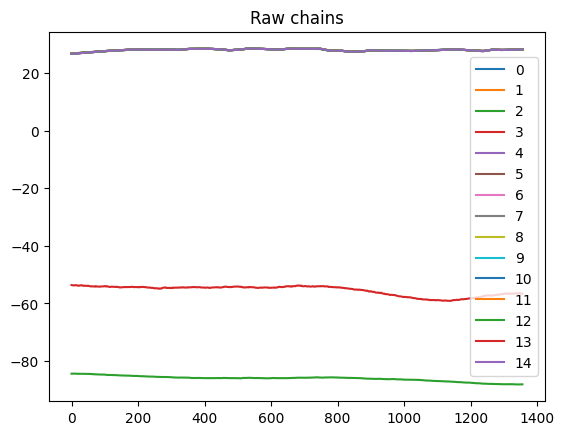

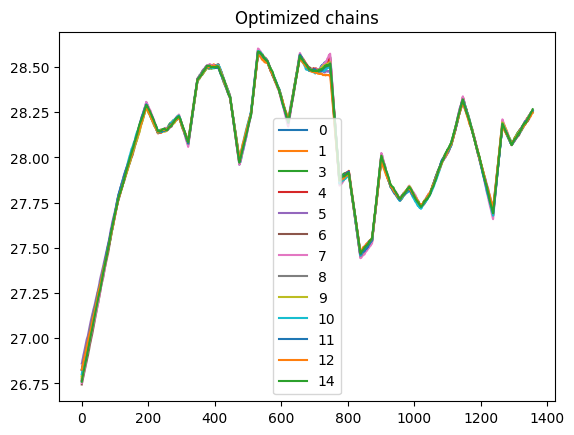

Best chain combination summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.080  0.013   0.056    0.106      0.001    0.001     130.0     233.0   
eps    0.230  0.063   0.116    0.345      0.001    0.001    6308.0   16194.0   
p_out  0.079  0.051   0.003    0.171      0.000    0.000   16327.0   17353.0   

       r_hat  
sig     1.08  
eps     1.00  
p_out   1.00  


In [121]:
selected_chains = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
remove_those = [2, 13]#[2, 5, 8, 6, 3]
for i in remove_those:
    selected_chains.remove(i)


snc_ar1_nuts.visualize_latents(selected_chains)
snc_ar1_nuts.predict(selected_chains)

In [122]:
sub_data['muX'] = snc_ar1_nuts.muX
sub_data['ICL'] = snc_ar1_nuts.CIL
sub_data['ICU'] = snc_ar1_nuts.CIU
sub_data['pout'] = snc_ar1_nuts.pointwise_pout

sub_data.obs = np.log10(np.exp(sub_data.obs))
sub_data.muX = np.log10(np.exp(sub_data.muX))
sub_data.ICL = np.log10(np.exp(sub_data.ICL))
sub_data.ICU = np.log10(np.exp(sub_data.ICU))

RW2s[this_molecule] = sub_data.copy()

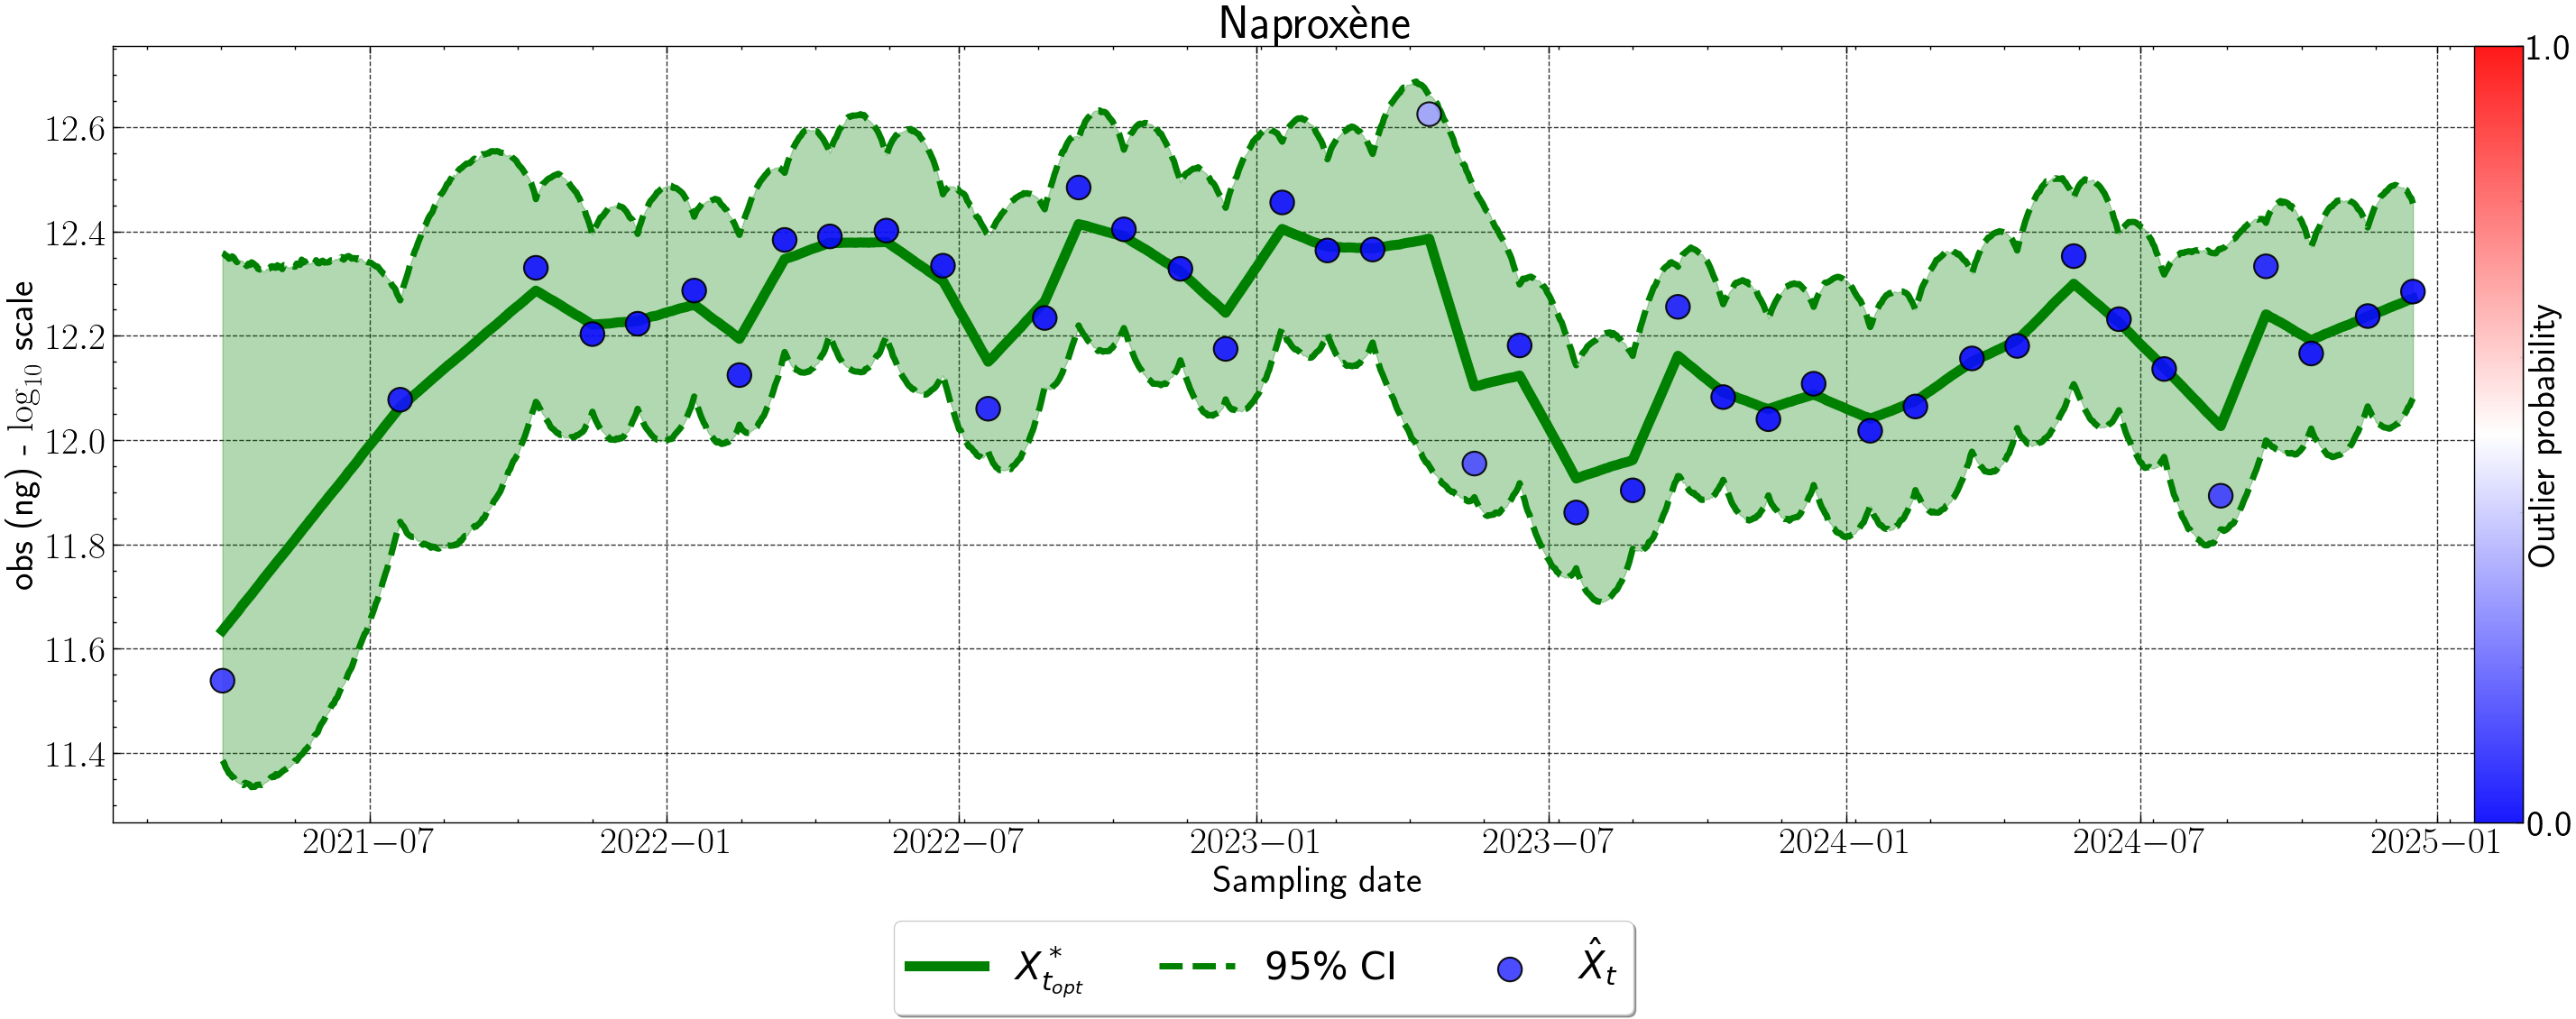

In [123]:
with plt.style.context(['science', 'notebook', 'grid']):

    LABEL_SIZE = 30
    TICK_SIZE = 30
    TITLE_SIZE = 38
    LEGEND_SIZE = 30
    DATES_SIZE = 18
    figsize = (28, 10) #figsize = (32, 10)
    
    plt.rc('axes', labelsize=LABEL_SIZE)
    plt.rc('xtick', labelsize=TICK_SIZE)   
    plt.rc('ytick', labelsize=TICK_SIZE)
    plt.rc('figure', titlesize=TITLE_SIZE)
    plt.rc('legend', fontsize=LEGEND_SIZE)
    plt.rcParams['text.usetex'] = True
    
    fig = plt.figure(figsize=figsize, layout="constrained")
    
    ax_dict = fig.subplot_mosaic(
        """
        A
        """
    )
    
    ### A
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.muX.values, label='$X^*_{t_{opt}}$', color='green', linewidth=8, zorder=3)
    
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICL.values, label='95% CI', linestyle='--', color='green', linewidth=5, zorder=1)
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICU.values, linestyle='--', color='green', linewidth=5, zorder=1)
    
    ax_dict['A'].fill_between(sub_data.dateStart.values, sub_data.ICL.values, sub_data.ICU.values, alpha=.3, color='green')

    
    scatter_points = ax_dict['A'].scatter(sub_data.dateStart.values, sub_data.obs.values, label='$\hat{X}_t$', 
                         c=sub_data.pout.values,
                         cmap='bwr', edgecolor='black', s=360, zorder=3,
                         linewidths=1.5, alpha=0.9, vmin=0, vmax=1)

    
    ax_dict['A'].set_ylabel("obs (ng) - $\log_{10}$ scale")
    ax_dict['A'].set_xlabel("Sampling date")
    ax_dict['A'].tick_params(axis='x', labelsize=TICK_SIZE)
    ax_dict['A'].tick_params(axis='y', labelsize=TICK_SIZE)
    ax_dict['A'].grid(linewidth=1, color='black', alpha=0.8)
    ax_dict['A'].set_title(this_molecule, size=TITLE_SIZE)

    ### Outlier probability legend:
    cmin, cmax = 0.0, 1.0 
    axins1 = inset_axes(ax_dict['A'], width='2%', height='100%', loc='right', borderpad=0)
    axins1.grid(False)
    cbar = fig.colorbar(scatter_points, cax=axins1, orientation='vertical')
    
    # Setting tick limits:
    cbar.set_ticks([cmin, cmax])
    cbar.ax.yaxis.set_major_locator(ticker.FixedLocator([cmin, cmax]))
    
    # Standardizing the float format displayed:
    decimal_places = 1
    cbar.ax.set_yticklabels([f"{cmin:.{decimal_places}f}", f"{cmax:.{decimal_places}f}"], fontsize=TICK_SIZE)

    # Placing the label at the right spot:
    cbar.ax.set_ylabel('Outlier probability', size=TICK_SIZE, labelpad=-35)

    # Main legend
    plt.rcParams['text.usetex'] = False
    h1, l1 = ax_dict['A'].get_legend_handles_labels()
    fig.legend(h1, l1, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=5)
    
    plt.show()

In [124]:
### Pout estimé par le SCOU NUTS

In [125]:
for molecule in list(RW2s.keys()):
    this_file = RW2s[molecule]
    this_file.to_csv('../outputs/files/chemical_data_manuscript/' + molecule + '.csv', sep=';', index=False)

In [22]:
full_data.Molecule.unique()

array(['Volume Prétraité Bassins de Clichy',
       'Emissaire Genéral Estimation Pompage', 'Débit Seine Centre',
       'Acénaphtène', 'Ammonium', 'Anthracène', 'Azote Kjeldahl',
       'Benzo[a]anthracène', 'Benzo[a]pyrène', 'Benzo[b]fluoranthène',
       'Benzo[g,h,i]perylène', 'Benzo[k]fluoranthène', 'Chrysène',
       'Coliformes Thermotolérants', 'Coliformes totaux présomptifs',
       'DBO diluée', 'Dibenzo[ah]anthracène', 'Entérocoques intestinaux',
       'Escherichia coli', 'Fluoranthène', 'Fluorène',
       'Indéno[1,2,3,c,d]pyrène', 'Matières en suspension',
       'Micro-organismes revivifiables\xa0 à 22°C',
       'Micro-organismes revivifiables\xa0 à 36°C', 'Naphtalène', 'NGL',
       'Nitrates', 'Nitrites', 'Orthophosphates', 'PCB 101', 'PCB 118',
       'PCB 138', 'PCB 153', 'PCB 180', 'PCB 28', 'PCB 52', 'pH',
       'Phénanthrène', 'Phosphore', 'Pyrène', 'Somme 15 HAP',
       'Somme 7 PCB',
       'Spores de micro-organismes anaérobies sulfito-réducteurs',
       'S

In [126]:
this_molecule = 'Ofloxacine'
this_lod = 0.01 * 1000
this_lod

10.0

In [127]:
sub_data = preprocess_data(this_molecule, this_lod)

In [128]:
sub_data.loc[sub_data.obs <= sub_data.lod]

Empty DataFrame
Columns: [dateStart, obs, Raw_lod, Raw_concentration, lod, plantVolume]
Index: []

In [129]:
lod_matrix = sub_data.lod.values
observation_matrix = sub_data.obs.values

filename = 'discard.nc'
tuning_iters = 12000
sampling_iters = 2000
nb_chains = 15

snc_ar1_nuts = SCOU_RW1_NUTS(observation_matrix, lod_matrix, tuning_iters=tuning_iters, sampling_iters=sampling_iters,
                             export_name=filename, 
                             p_out_frozen=-1, nb_chains=nb_chains, export_chains=False,
                             RW_order=1)
snc_ar1_nuts.fit()

# Done
notify_mac("Jupyter", "Work done !")

/opt/anaconda3/envs/pymc5/lib/python3.9/site-packages/pymc/distributions/timeseries.py:558: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100, shape=...)`. You can specify an init_dist manually to suppress this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (15 chains in 4 jobs)
NUTS: [sig, eps, p_out, latent]


Sampling 15 chains for 12_000 tune and 2_000 draw iterations (180_000 + 30_000 draws total) took 3897 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 4 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


Raw summary:
        mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.142   0.170   0.049    0.366      0.037    0.026      33.0      33.0   
eps    0.432  11.935   0.083    0.672      0.070    0.050      62.0      45.0   
p_out  0.205   0.277   0.004    0.908      0.070    0.051      37.0      45.0   

       r_hat  
sig     1.39  
eps     1.16  
p_out   1.30  


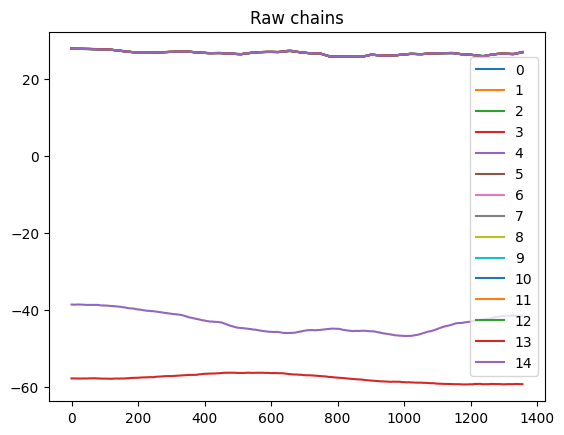

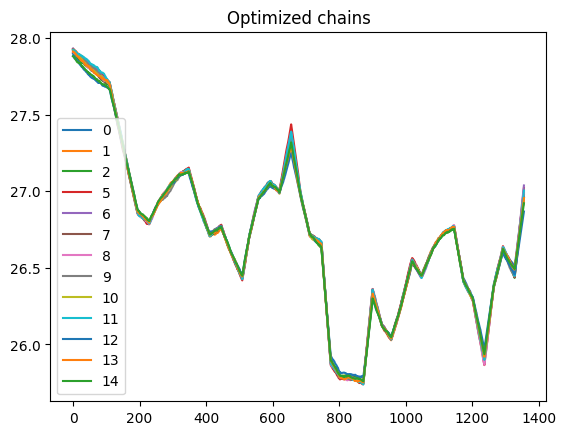

Best chain combination summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.091  0.017   0.061    0.124      0.001    0.001     186.0     200.0   
eps    0.259  0.080   0.119    0.408      0.001    0.001    8236.0   15574.0   
p_out  0.099  0.060   0.004    0.208      0.001    0.000    7442.0   16099.0   

       r_hat  
sig     1.06  
eps     1.00  
p_out   1.00  


In [132]:
selected_chains = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
remove_those = [4, 3]#[2, 5, 8, 6, 3]
for i in remove_those:
    selected_chains.remove(i)


snc_ar1_nuts.visualize_latents(selected_chains)
snc_ar1_nuts.predict(selected_chains)

In [133]:
sub_data['muX'] = snc_ar1_nuts.muX
sub_data['ICL'] = snc_ar1_nuts.CIL
sub_data['ICU'] = snc_ar1_nuts.CIU
sub_data['pout'] = snc_ar1_nuts.pointwise_pout

sub_data.obs = np.log10(np.exp(sub_data.obs))
sub_data.muX = np.log10(np.exp(sub_data.muX))
sub_data.ICL = np.log10(np.exp(sub_data.ICL))
sub_data.ICU = np.log10(np.exp(sub_data.ICU))

RW2s[this_molecule] = sub_data.copy()

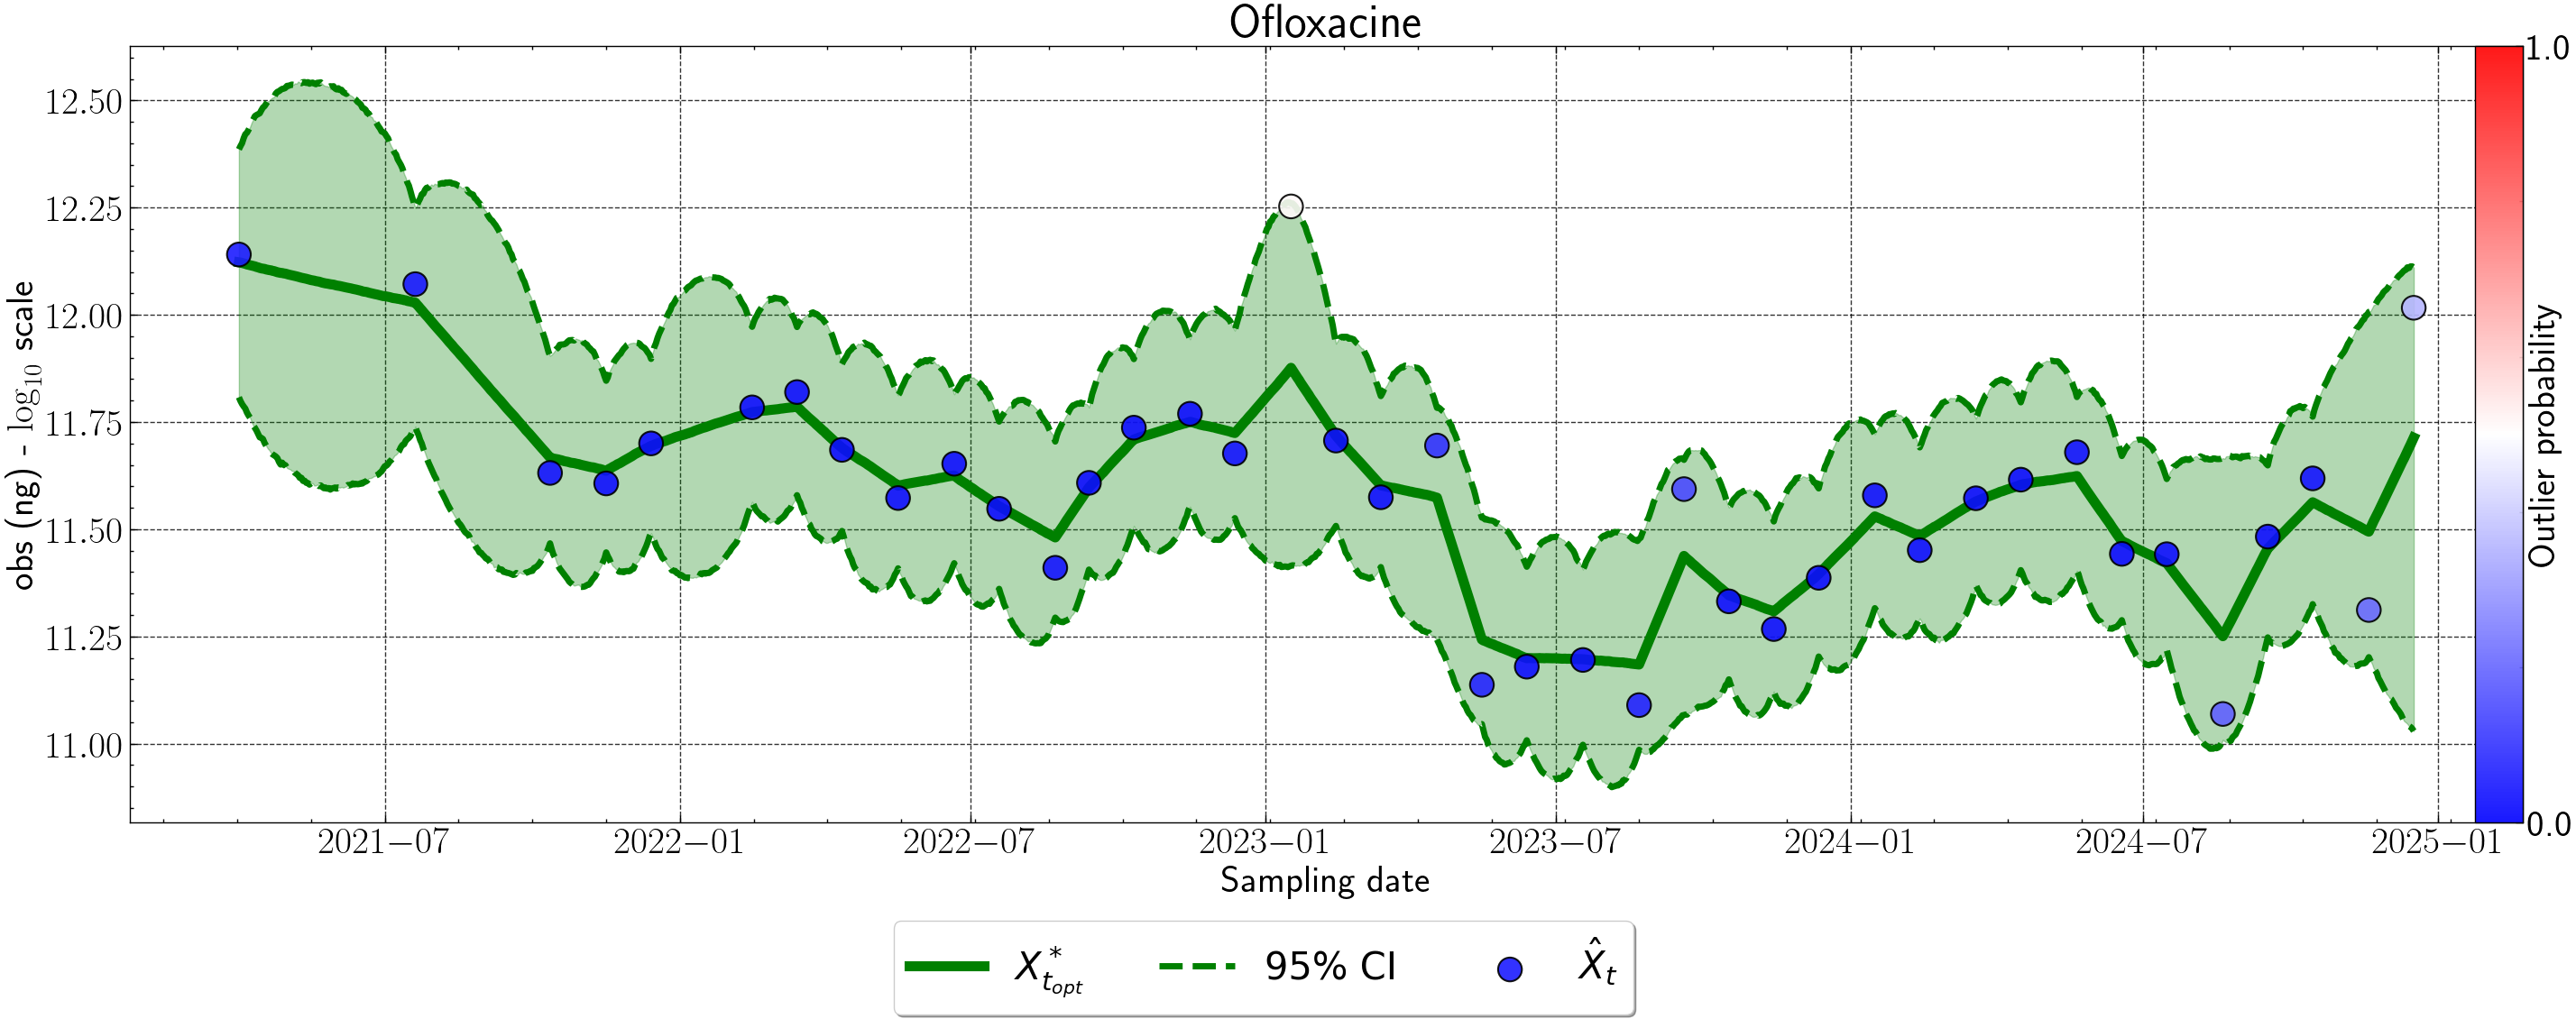

In [134]:
with plt.style.context(['science', 'notebook', 'grid']):

    LABEL_SIZE = 30
    TICK_SIZE = 30
    TITLE_SIZE = 38
    LEGEND_SIZE = 30
    DATES_SIZE = 18
    figsize = (28, 10) #figsize = (32, 10)
    
    plt.rc('axes', labelsize=LABEL_SIZE)
    plt.rc('xtick', labelsize=TICK_SIZE)   
    plt.rc('ytick', labelsize=TICK_SIZE)
    plt.rc('figure', titlesize=TITLE_SIZE)
    plt.rc('legend', fontsize=LEGEND_SIZE)
    plt.rcParams['text.usetex'] = True
    
    fig = plt.figure(figsize=figsize, layout="constrained")
    
    ax_dict = fig.subplot_mosaic(
        """
        A
        """
    )
    
    ### A
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.muX.values, label='$X^*_{t_{opt}}$', color='green', linewidth=8, zorder=3)
    
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICL.values, label='95% CI', linestyle='--', color='green', linewidth=5, zorder=1)
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICU.values, linestyle='--', color='green', linewidth=5, zorder=1)
    
    ax_dict['A'].fill_between(sub_data.dateStart.values, sub_data.ICL.values, sub_data.ICU.values, alpha=.3, color='green')

    
    scatter_points = ax_dict['A'].scatter(sub_data.dateStart.values, sub_data.obs.values, label='$\hat{X}_t$', 
                         c=sub_data.pout.values,
                         cmap='bwr', edgecolor='black', s=360, zorder=3,
                         linewidths=1.5, alpha=0.9, vmin=0, vmax=1)

    
    ax_dict['A'].set_ylabel("obs (ng) - $\log_{10}$ scale")
    ax_dict['A'].set_xlabel("Sampling date")
    ax_dict['A'].tick_params(axis='x', labelsize=TICK_SIZE)
    ax_dict['A'].tick_params(axis='y', labelsize=TICK_SIZE)
    ax_dict['A'].grid(linewidth=1, color='black', alpha=0.8)
    ax_dict['A'].set_title(this_molecule, size=TITLE_SIZE)

    ### Outlier probability legend:
    cmin, cmax = 0.0, 1.0 
    axins1 = inset_axes(ax_dict['A'], width='2%', height='100%', loc='right', borderpad=0)
    axins1.grid(False)
    cbar = fig.colorbar(scatter_points, cax=axins1, orientation='vertical')
    
    # Setting tick limits:
    cbar.set_ticks([cmin, cmax])
    cbar.ax.yaxis.set_major_locator(ticker.FixedLocator([cmin, cmax]))
    
    # Standardizing the float format displayed:
    decimal_places = 1
    cbar.ax.set_yticklabels([f"{cmin:.{decimal_places}f}", f"{cmax:.{decimal_places}f}"], fontsize=TICK_SIZE)

    # Placing the label at the right spot:
    cbar.ax.set_ylabel('Outlier probability', size=TICK_SIZE, labelpad=-35)

    # Main legend
    plt.rcParams['text.usetex'] = False
    h1, l1 = ax_dict['A'].get_legend_handles_labels()
    fig.legend(h1, l1, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=5)
    
    plt.show()

In [137]:
### Pout estimé par le SCOU NUTS

In [136]:
for molecule in list(RW2s.keys()):
    this_file = RW2s[molecule]
    this_file.to_csv('../outputs/files/chemical_data_manuscript/' + molecule + '.csv', sep=';', index=False)

In [22]:
full_data.Molecule.unique()

array(['Volume Prétraité Bassins de Clichy',
       'Emissaire Genéral Estimation Pompage', 'Débit Seine Centre',
       'Acénaphtène', 'Ammonium', 'Anthracène', 'Azote Kjeldahl',
       'Benzo[a]anthracène', 'Benzo[a]pyrène', 'Benzo[b]fluoranthène',
       'Benzo[g,h,i]perylène', 'Benzo[k]fluoranthène', 'Chrysène',
       'Coliformes Thermotolérants', 'Coliformes totaux présomptifs',
       'DBO diluée', 'Dibenzo[ah]anthracène', 'Entérocoques intestinaux',
       'Escherichia coli', 'Fluoranthène', 'Fluorène',
       'Indéno[1,2,3,c,d]pyrène', 'Matières en suspension',
       'Micro-organismes revivifiables\xa0 à 22°C',
       'Micro-organismes revivifiables\xa0 à 36°C', 'Naphtalène', 'NGL',
       'Nitrates', 'Nitrites', 'Orthophosphates', 'PCB 101', 'PCB 118',
       'PCB 138', 'PCB 153', 'PCB 180', 'PCB 28', 'PCB 52', 'pH',
       'Phénanthrène', 'Phosphore', 'Pyrène', 'Somme 15 HAP',
       'Somme 7 PCB',
       'Spores de micro-organismes anaérobies sulfito-réducteurs',
       'S

In [138]:
this_molecule = 'Oxazépam'
this_lod = 0.01 * 1000
this_lod

10.0

In [139]:
sub_data = preprocess_data(this_molecule, this_lod)

In [140]:
sub_data.loc[sub_data.obs <= sub_data.lod]

Empty DataFrame
Columns: [dateStart, obs, Raw_lod, Raw_concentration, lod, plantVolume]
Index: []

In [141]:
lod_matrix = sub_data.lod.values
observation_matrix = sub_data.obs.values

filename = 'discard.nc'
tuning_iters = 12000
sampling_iters = 2000
nb_chains = 15

snc_ar1_nuts = SCOU_RW1_NUTS(observation_matrix, lod_matrix, tuning_iters=tuning_iters, sampling_iters=sampling_iters,
                             export_name=filename, 
                             p_out_frozen=-1, nb_chains=nb_chains, export_chains=False,
                             RW_order=1)
snc_ar1_nuts.fit()

# Done
notify_mac("Jupyter", "Work done !")

/opt/anaconda3/envs/pymc5/lib/python3.9/site-packages/pymc/distributions/timeseries.py:558: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100, shape=...)`. You can specify an init_dist manually to suppress this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (15 chains in 4 jobs)
NUTS: [sig, eps, p_out, latent]


Sampling 15 chains for 12_000 tune and 2_000 draw iterations (180_000 + 30_000 draws total) took 4893 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 5 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 10 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


Raw summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.208  0.499   0.035    0.957      0.125    0.090      33.0      18.0   
eps    0.269  0.491   0.074    0.648      0.063    0.045      41.0      46.0   
p_out  0.181  0.283   0.003    0.904      0.072    0.052      37.0      46.0   

       r_hat  
sig     1.40  
eps     1.27  
p_out   1.30  


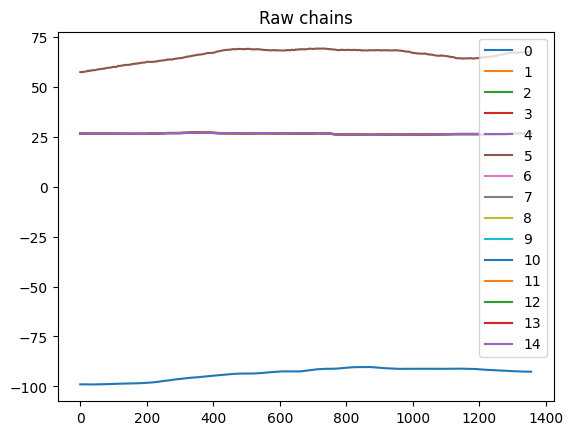

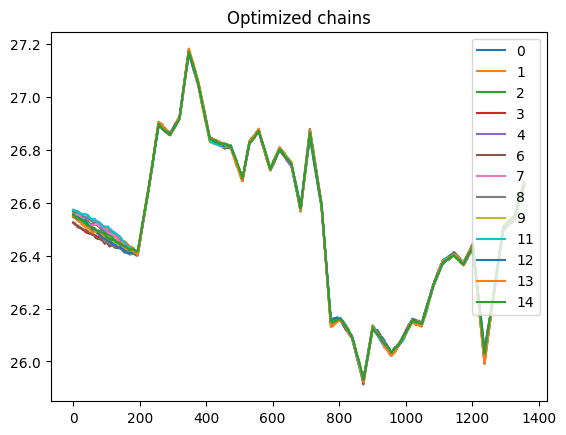

Best chain combination summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.061  0.010   0.044    0.081      0.001    0.001     162.0     312.0   
eps    0.169  0.043   0.094    0.249      0.000    0.000   10616.0   16311.0   
p_out  0.072  0.048   0.004    0.160      0.000    0.000   17882.0   14891.0   

       r_hat  
sig     1.06  
eps     1.00  
p_out   1.00  


In [144]:
selected_chains = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
remove_those = [10, 5]#[2, 5, 8, 6, 3]
for i in remove_those:
    selected_chains.remove(i)


snc_ar1_nuts.visualize_latents(selected_chains)
snc_ar1_nuts.predict(selected_chains)

In [145]:
sub_data['muX'] = snc_ar1_nuts.muX
sub_data['ICL'] = snc_ar1_nuts.CIL
sub_data['ICU'] = snc_ar1_nuts.CIU
sub_data['pout'] = snc_ar1_nuts.pointwise_pout

sub_data.obs = np.log10(np.exp(sub_data.obs))
sub_data.muX = np.log10(np.exp(sub_data.muX))
sub_data.ICL = np.log10(np.exp(sub_data.ICL))
sub_data.ICU = np.log10(np.exp(sub_data.ICU))

RW2s[this_molecule] = sub_data.copy()

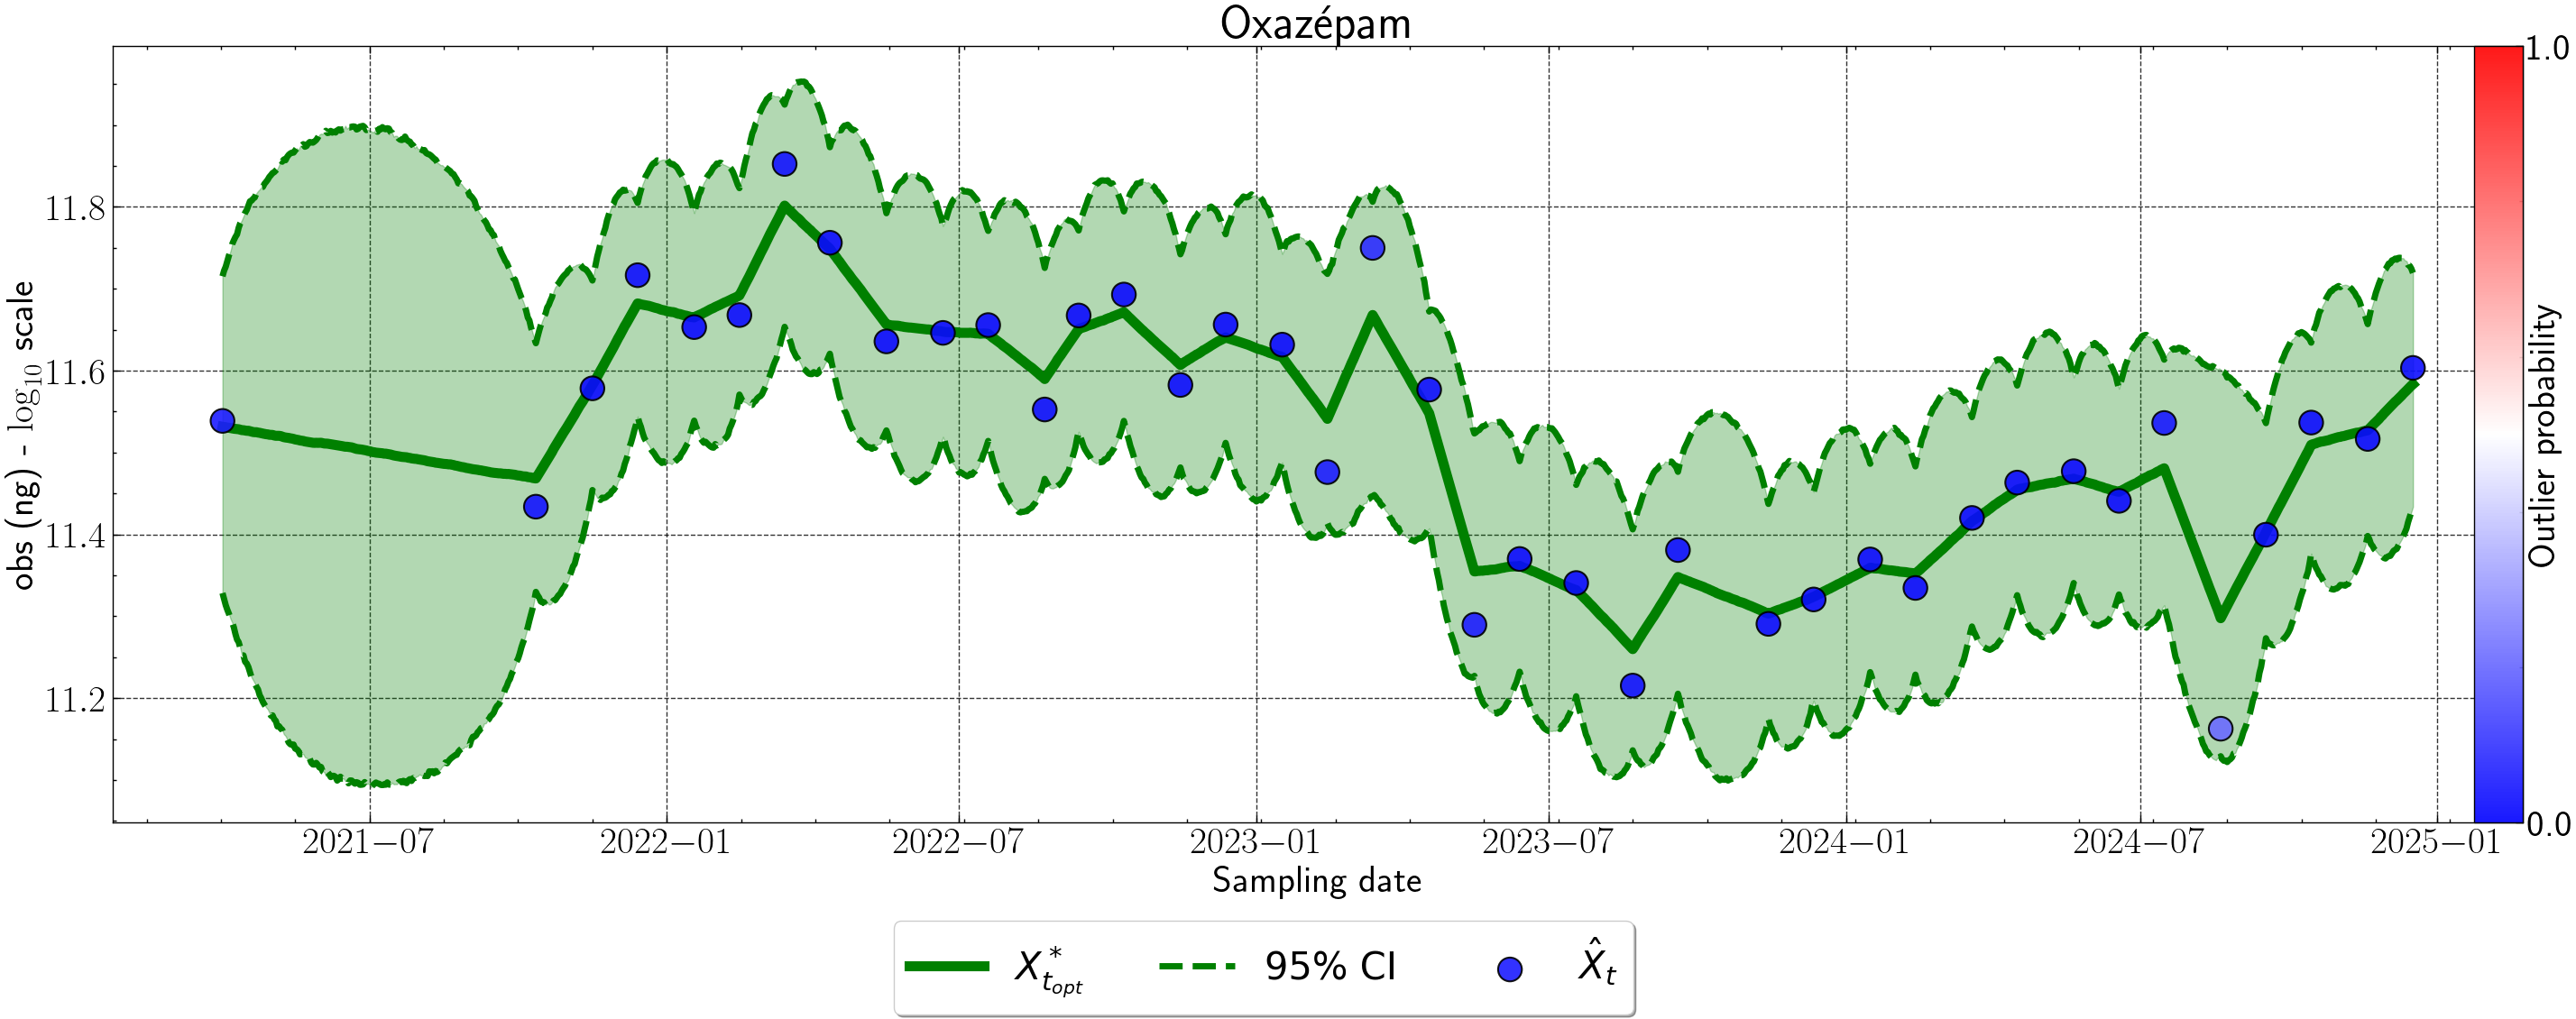

In [146]:
with plt.style.context(['science', 'notebook', 'grid']):

    LABEL_SIZE = 30
    TICK_SIZE = 30
    TITLE_SIZE = 38
    LEGEND_SIZE = 30
    DATES_SIZE = 18
    figsize = (28, 10) #figsize = (32, 10)
    
    plt.rc('axes', labelsize=LABEL_SIZE)
    plt.rc('xtick', labelsize=TICK_SIZE)   
    plt.rc('ytick', labelsize=TICK_SIZE)
    plt.rc('figure', titlesize=TITLE_SIZE)
    plt.rc('legend', fontsize=LEGEND_SIZE)
    plt.rcParams['text.usetex'] = True
    
    fig = plt.figure(figsize=figsize, layout="constrained")
    
    ax_dict = fig.subplot_mosaic(
        """
        A
        """
    )
    
    ### A
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.muX.values, label='$X^*_{t_{opt}}$', color='green', linewidth=8, zorder=3)
    
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICL.values, label='95% CI', linestyle='--', color='green', linewidth=5, zorder=1)
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICU.values, linestyle='--', color='green', linewidth=5, zorder=1)
    
    ax_dict['A'].fill_between(sub_data.dateStart.values, sub_data.ICL.values, sub_data.ICU.values, alpha=.3, color='green')

    
    scatter_points = ax_dict['A'].scatter(sub_data.dateStart.values, sub_data.obs.values, label='$\hat{X}_t$', 
                         c=sub_data.pout.values,
                         cmap='bwr', edgecolor='black', s=360, zorder=3,
                         linewidths=1.5, alpha=0.9, vmin=0, vmax=1)

    
    ax_dict['A'].set_ylabel("obs (ng) - $\log_{10}$ scale")
    ax_dict['A'].set_xlabel("Sampling date")
    ax_dict['A'].tick_params(axis='x', labelsize=TICK_SIZE)
    ax_dict['A'].tick_params(axis='y', labelsize=TICK_SIZE)
    ax_dict['A'].grid(linewidth=1, color='black', alpha=0.8)
    ax_dict['A'].set_title(this_molecule, size=TITLE_SIZE)

    ### Outlier probability legend:
    cmin, cmax = 0.0, 1.0 
    axins1 = inset_axes(ax_dict['A'], width='2%', height='100%', loc='right', borderpad=0)
    axins1.grid(False)
    cbar = fig.colorbar(scatter_points, cax=axins1, orientation='vertical')
    
    # Setting tick limits:
    cbar.set_ticks([cmin, cmax])
    cbar.ax.yaxis.set_major_locator(ticker.FixedLocator([cmin, cmax]))
    
    # Standardizing the float format displayed:
    decimal_places = 1
    cbar.ax.set_yticklabels([f"{cmin:.{decimal_places}f}", f"{cmax:.{decimal_places}f}"], fontsize=TICK_SIZE)

    # Placing the label at the right spot:
    cbar.ax.set_ylabel('Outlier probability', size=TICK_SIZE, labelpad=-35)

    # Main legend
    plt.rcParams['text.usetex'] = False
    h1, l1 = ax_dict['A'].get_legend_handles_labels()
    fig.legend(h1, l1, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=5)
    
    plt.show()

In [147]:
### Pout estimé par le SCOU NUTS

In [148]:
for molecule in list(RW2s.keys()):
    this_file = RW2s[molecule]
    this_file.to_csv('../outputs/files/chemical_data_manuscript/' + molecule + '.csv', sep=';', index=False)

In [22]:
full_data.Molecule.unique()

array(['Volume Prétraité Bassins de Clichy',
       'Emissaire Genéral Estimation Pompage', 'Débit Seine Centre',
       'Acénaphtène', 'Ammonium', 'Anthracène', 'Azote Kjeldahl',
       'Benzo[a]anthracène', 'Benzo[a]pyrène', 'Benzo[b]fluoranthène',
       'Benzo[g,h,i]perylène', 'Benzo[k]fluoranthène', 'Chrysène',
       'Coliformes Thermotolérants', 'Coliformes totaux présomptifs',
       'DBO diluée', 'Dibenzo[ah]anthracène', 'Entérocoques intestinaux',
       'Escherichia coli', 'Fluoranthène', 'Fluorène',
       'Indéno[1,2,3,c,d]pyrène', 'Matières en suspension',
       'Micro-organismes revivifiables\xa0 à 22°C',
       'Micro-organismes revivifiables\xa0 à 36°C', 'Naphtalène', 'NGL',
       'Nitrates', 'Nitrites', 'Orthophosphates', 'PCB 101', 'PCB 118',
       'PCB 138', 'PCB 153', 'PCB 180', 'PCB 28', 'PCB 52', 'pH',
       'Phénanthrène', 'Phosphore', 'Pyrène', 'Somme 15 HAP',
       'Somme 7 PCB',
       'Spores de micro-organismes anaérobies sulfito-réducteurs',
       'S

In [149]:
this_molecule = 'Propranolol'
this_lod = 0.01 * 1000
this_lod

10.0

In [150]:
sub_data = preprocess_data(this_molecule, this_lod)

In [151]:
sub_data.loc[sub_data.obs <= sub_data.lod]

Empty DataFrame
Columns: [dateStart, obs, Raw_lod, Raw_concentration, lod, plantVolume]
Index: []

In [152]:
lod_matrix = sub_data.lod.values
observation_matrix = sub_data.obs.values

filename = 'discard.nc'
tuning_iters = 12000
sampling_iters = 2000
nb_chains = 15

snc_ar1_nuts = SCOU_RW1_NUTS(observation_matrix, lod_matrix, tuning_iters=tuning_iters, sampling_iters=sampling_iters,
                             export_name=filename, 
                             p_out_frozen=-1, nb_chains=nb_chains, export_chains=False,
                             RW_order=1)
snc_ar1_nuts.fit()

# Done
notify_mac("Jupyter", "Work done !")

/opt/anaconda3/envs/pymc5/lib/python3.9/site-packages/pymc/distributions/timeseries.py:558: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100, shape=...)`. You can specify an init_dist manually to suppress this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (15 chains in 4 jobs)
NUTS: [sig, eps, p_out, latent]


Sampling 15 chains for 12_000 tune and 2_000 draw iterations (180_000 + 30_000 draws total) took 3720 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 4 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 9 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


Raw summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.222  0.398   0.051    0.844      0.096    0.069      31.0      19.0   
eps    0.354  0.659   0.082    0.688      0.065    0.046      57.0      46.0   
p_out  0.187  0.281   0.004    0.904      0.071    0.052      37.0      45.0   

       r_hat  
sig     1.41  
eps     1.18  
p_out   1.30  


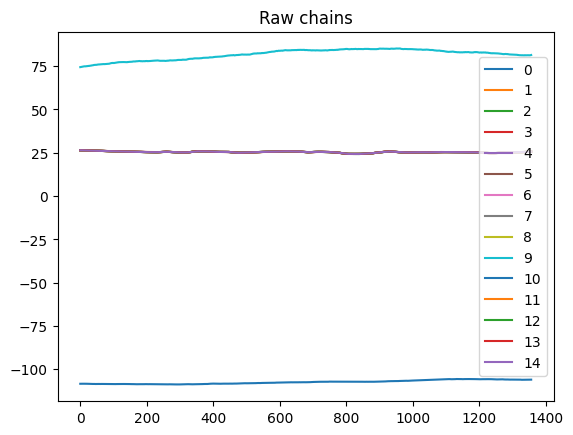

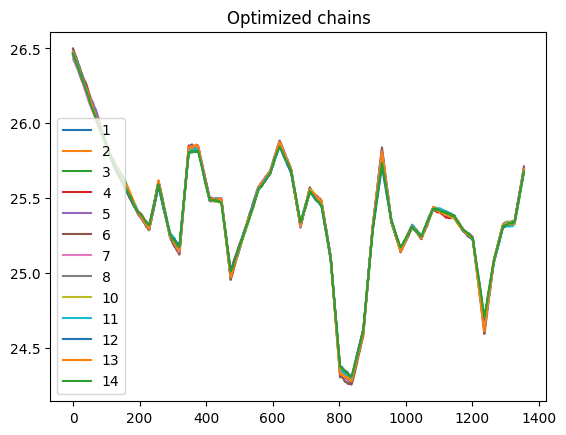

Best chain combination summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.095  0.017   0.065    0.127      0.002    0.001     109.0     148.0   
eps    0.250  0.074   0.120    0.388      0.001    0.001    3336.0   13083.0   
p_out  0.078  0.053   0.002    0.175      0.000    0.000   16690.0   16414.0   

       r_hat  
sig     1.08  
eps     1.01  
p_out   1.00  


In [156]:
selected_chains = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
remove_those = [9, 0]#[2, 5, 8, 6, 3]
for i in remove_those:
    selected_chains.remove(i)


snc_ar1_nuts.visualize_latents(selected_chains)
snc_ar1_nuts.predict(selected_chains)

In [157]:
sub_data['muX'] = snc_ar1_nuts.muX
sub_data['ICL'] = snc_ar1_nuts.CIL
sub_data['ICU'] = snc_ar1_nuts.CIU
sub_data['pout'] = snc_ar1_nuts.pointwise_pout

sub_data.obs = np.log10(np.exp(sub_data.obs))
sub_data.muX = np.log10(np.exp(sub_data.muX))
sub_data.ICL = np.log10(np.exp(sub_data.ICL))
sub_data.ICU = np.log10(np.exp(sub_data.ICU))

RW2s[this_molecule] = sub_data.copy()

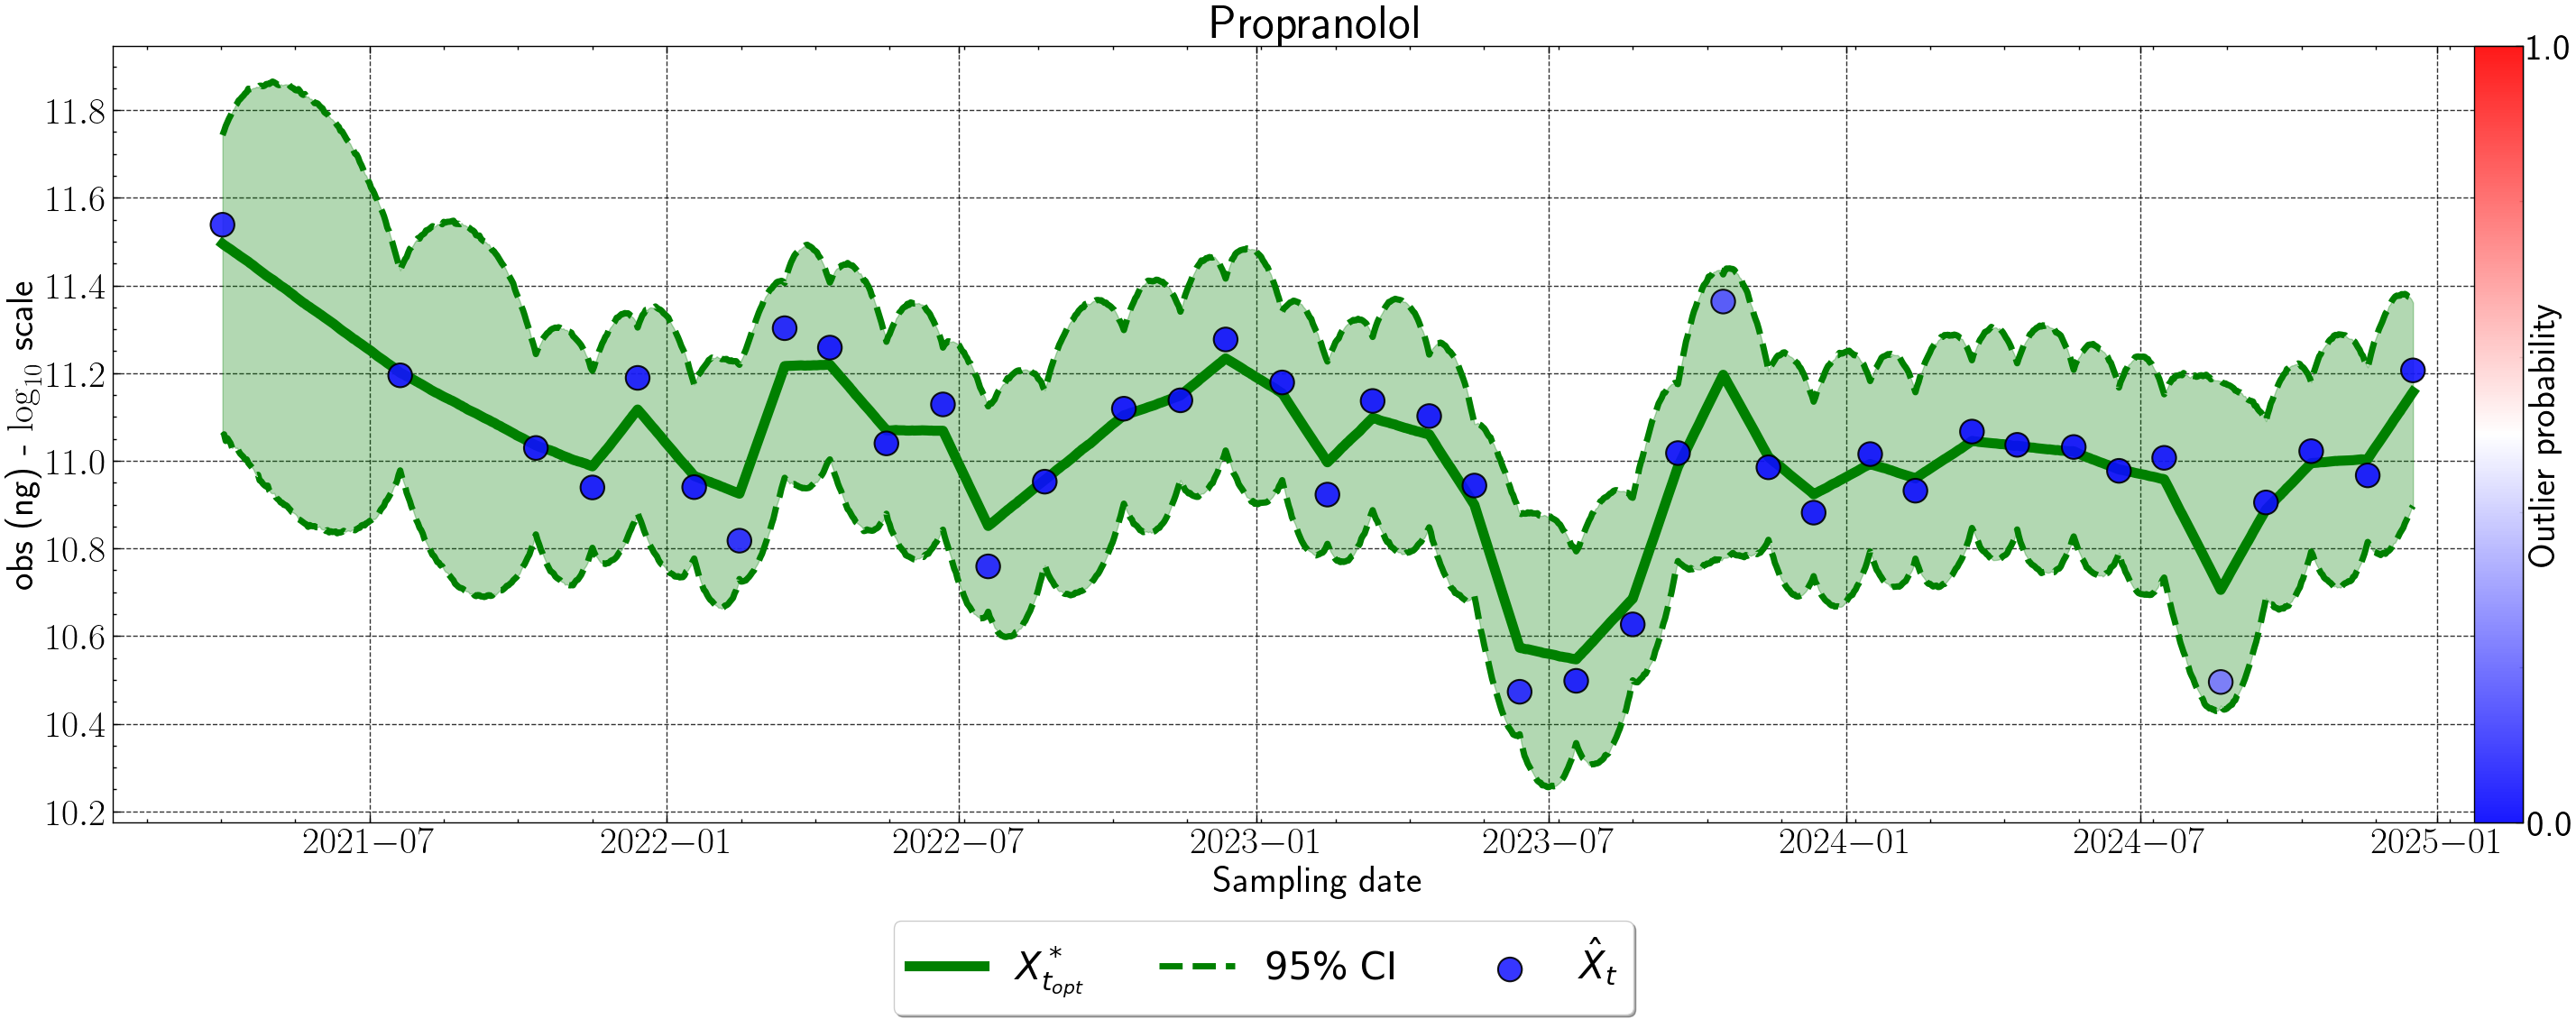

In [158]:
with plt.style.context(['science', 'notebook', 'grid']):

    LABEL_SIZE = 30
    TICK_SIZE = 30
    TITLE_SIZE = 38
    LEGEND_SIZE = 30
    DATES_SIZE = 18
    figsize = (28, 10) #figsize = (32, 10)
    
    plt.rc('axes', labelsize=LABEL_SIZE)
    plt.rc('xtick', labelsize=TICK_SIZE)   
    plt.rc('ytick', labelsize=TICK_SIZE)
    plt.rc('figure', titlesize=TITLE_SIZE)
    plt.rc('legend', fontsize=LEGEND_SIZE)
    plt.rcParams['text.usetex'] = True
    
    fig = plt.figure(figsize=figsize, layout="constrained")
    
    ax_dict = fig.subplot_mosaic(
        """
        A
        """
    )
    
    ### A
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.muX.values, label='$X^*_{t_{opt}}$', color='green', linewidth=8, zorder=3)
    
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICL.values, label='95% CI', linestyle='--', color='green', linewidth=5, zorder=1)
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICU.values, linestyle='--', color='green', linewidth=5, zorder=1)
    
    ax_dict['A'].fill_between(sub_data.dateStart.values, sub_data.ICL.values, sub_data.ICU.values, alpha=.3, color='green')

    
    scatter_points = ax_dict['A'].scatter(sub_data.dateStart.values, sub_data.obs.values, label='$\hat{X}_t$', 
                         c=sub_data.pout.values,
                         cmap='bwr', edgecolor='black', s=360, zorder=3,
                         linewidths=1.5, alpha=0.9, vmin=0, vmax=1)

    
    ax_dict['A'].set_ylabel("obs (ng) - $\log_{10}$ scale")
    ax_dict['A'].set_xlabel("Sampling date")
    ax_dict['A'].tick_params(axis='x', labelsize=TICK_SIZE)
    ax_dict['A'].tick_params(axis='y', labelsize=TICK_SIZE)
    ax_dict['A'].grid(linewidth=1, color='black', alpha=0.8)
    ax_dict['A'].set_title(this_molecule, size=TITLE_SIZE)

    ### Outlier probability legend:
    cmin, cmax = 0.0, 1.0 
    axins1 = inset_axes(ax_dict['A'], width='2%', height='100%', loc='right', borderpad=0)
    axins1.grid(False)
    cbar = fig.colorbar(scatter_points, cax=axins1, orientation='vertical')
    
    # Setting tick limits:
    cbar.set_ticks([cmin, cmax])
    cbar.ax.yaxis.set_major_locator(ticker.FixedLocator([cmin, cmax]))
    
    # Standardizing the float format displayed:
    decimal_places = 1
    cbar.ax.set_yticklabels([f"{cmin:.{decimal_places}f}", f"{cmax:.{decimal_places}f}"], fontsize=TICK_SIZE)

    # Placing the label at the right spot:
    cbar.ax.set_ylabel('Outlier probability', size=TICK_SIZE, labelpad=-35)

    # Main legend
    plt.rcParams['text.usetex'] = False
    h1, l1 = ax_dict['A'].get_legend_handles_labels()
    fig.legend(h1, l1, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=5)
    
    plt.show()

In [159]:
### Pout estimé par le SCOU NUTS

In [160]:
for molecule in list(RW2s.keys()):
    this_file = RW2s[molecule]
    this_file.to_csv('../outputs/files/chemical_data_manuscript/' + molecule + '.csv', sep=';', index=False)

In [22]:
full_data.Molecule.unique()

array(['Volume Prétraité Bassins de Clichy',
       'Emissaire Genéral Estimation Pompage', 'Débit Seine Centre',
       'Acénaphtène', 'Ammonium', 'Anthracène', 'Azote Kjeldahl',
       'Benzo[a]anthracène', 'Benzo[a]pyrène', 'Benzo[b]fluoranthène',
       'Benzo[g,h,i]perylène', 'Benzo[k]fluoranthène', 'Chrysène',
       'Coliformes Thermotolérants', 'Coliformes totaux présomptifs',
       'DBO diluée', 'Dibenzo[ah]anthracène', 'Entérocoques intestinaux',
       'Escherichia coli', 'Fluoranthène', 'Fluorène',
       'Indéno[1,2,3,c,d]pyrène', 'Matières en suspension',
       'Micro-organismes revivifiables\xa0 à 22°C',
       'Micro-organismes revivifiables\xa0 à 36°C', 'Naphtalène', 'NGL',
       'Nitrates', 'Nitrites', 'Orthophosphates', 'PCB 101', 'PCB 118',
       'PCB 138', 'PCB 153', 'PCB 180', 'PCB 28', 'PCB 52', 'pH',
       'Phénanthrène', 'Phosphore', 'Pyrène', 'Somme 15 HAP',
       'Somme 7 PCB',
       'Spores de micro-organismes anaérobies sulfito-réducteurs',
       'S

In [161]:
this_molecule = 'Sotalol'
this_lod = 0.05 * 1000
this_lod

50.0

In [162]:
sub_data = preprocess_data(this_molecule, this_lod)

In [163]:
sub_data.loc[sub_data.obs <= sub_data.lod]

Empty DataFrame
Columns: [dateStart, obs, Raw_lod, Raw_concentration, lod, plantVolume]
Index: []

In [164]:
lod_matrix = sub_data.lod.values
observation_matrix = sub_data.obs.values

filename = 'discard.nc'
tuning_iters = 12000
sampling_iters = 2000
nb_chains = 15

snc_ar1_nuts = SCOU_RW1_NUTS(observation_matrix, lod_matrix, tuning_iters=tuning_iters, sampling_iters=sampling_iters,
                             export_name=filename, 
                             p_out_frozen=-1, nb_chains=nb_chains, export_chains=False,
                             RW_order=1)
snc_ar1_nuts.fit()

# Done
notify_mac("Jupyter", "Work done !")

/opt/anaconda3/envs/pymc5/lib/python3.9/site-packages/pymc/distributions/timeseries.py:558: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100, shape=...)`. You can specify an init_dist manually to suppress this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (15 chains in 4 jobs)
NUTS: [sig, eps, p_out, latent]


Sampling 15 chains for 12_000 tune and 2_000 draw iterations (180_000 + 30_000 draws total) took 4808 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 5 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 6 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 8 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameteriz

Raw summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.473  0.598   0.042    1.317      0.140    0.101      19.0      28.0   
eps    0.625  1.470   0.077    1.810      0.098    0.069      28.0     379.0   
p_out  0.516  0.403   0.015    0.946      0.103    0.074      24.0     329.0   

       r_hat  
sig     2.36  
eps     1.48  
p_out   1.67  


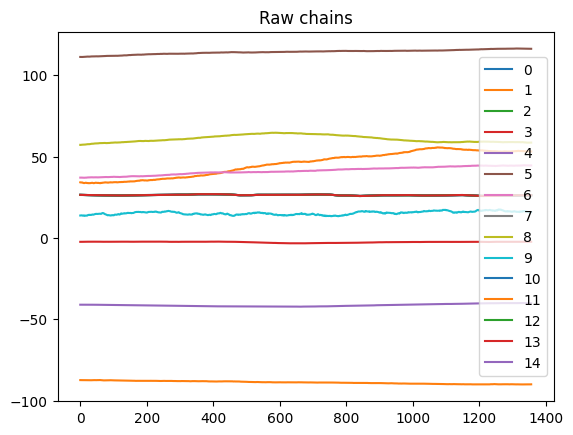

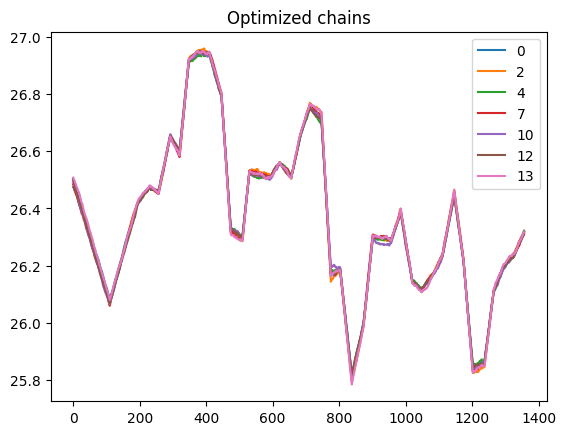

Best chain combination summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.068  0.010   0.049    0.087      0.001    0.001     145.0     359.0   
eps    0.197  0.053   0.103    0.297      0.001    0.001    4711.0    8906.0   
p_out  0.089  0.057   0.007    0.197      0.001    0.000    8870.0   10328.0   

       r_hat  
sig     1.05  
eps     1.00  
p_out   1.00  


In [172]:
selected_chains = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
remove_those = [5, 11, 14, 3, 1, 8, 6, 9]#[2, 5, 8, 6, 3]
for i in remove_those:
    selected_chains.remove(i)


snc_ar1_nuts.visualize_latents(selected_chains)
snc_ar1_nuts.predict(selected_chains)

In [173]:
sub_data['muX'] = snc_ar1_nuts.muX
sub_data['ICL'] = snc_ar1_nuts.CIL
sub_data['ICU'] = snc_ar1_nuts.CIU
sub_data['pout'] = snc_ar1_nuts.pointwise_pout

sub_data.obs = np.log10(np.exp(sub_data.obs))
sub_data.muX = np.log10(np.exp(sub_data.muX))
sub_data.ICL = np.log10(np.exp(sub_data.ICL))
sub_data.ICU = np.log10(np.exp(sub_data.ICU))

RW2s[this_molecule] = sub_data.copy()

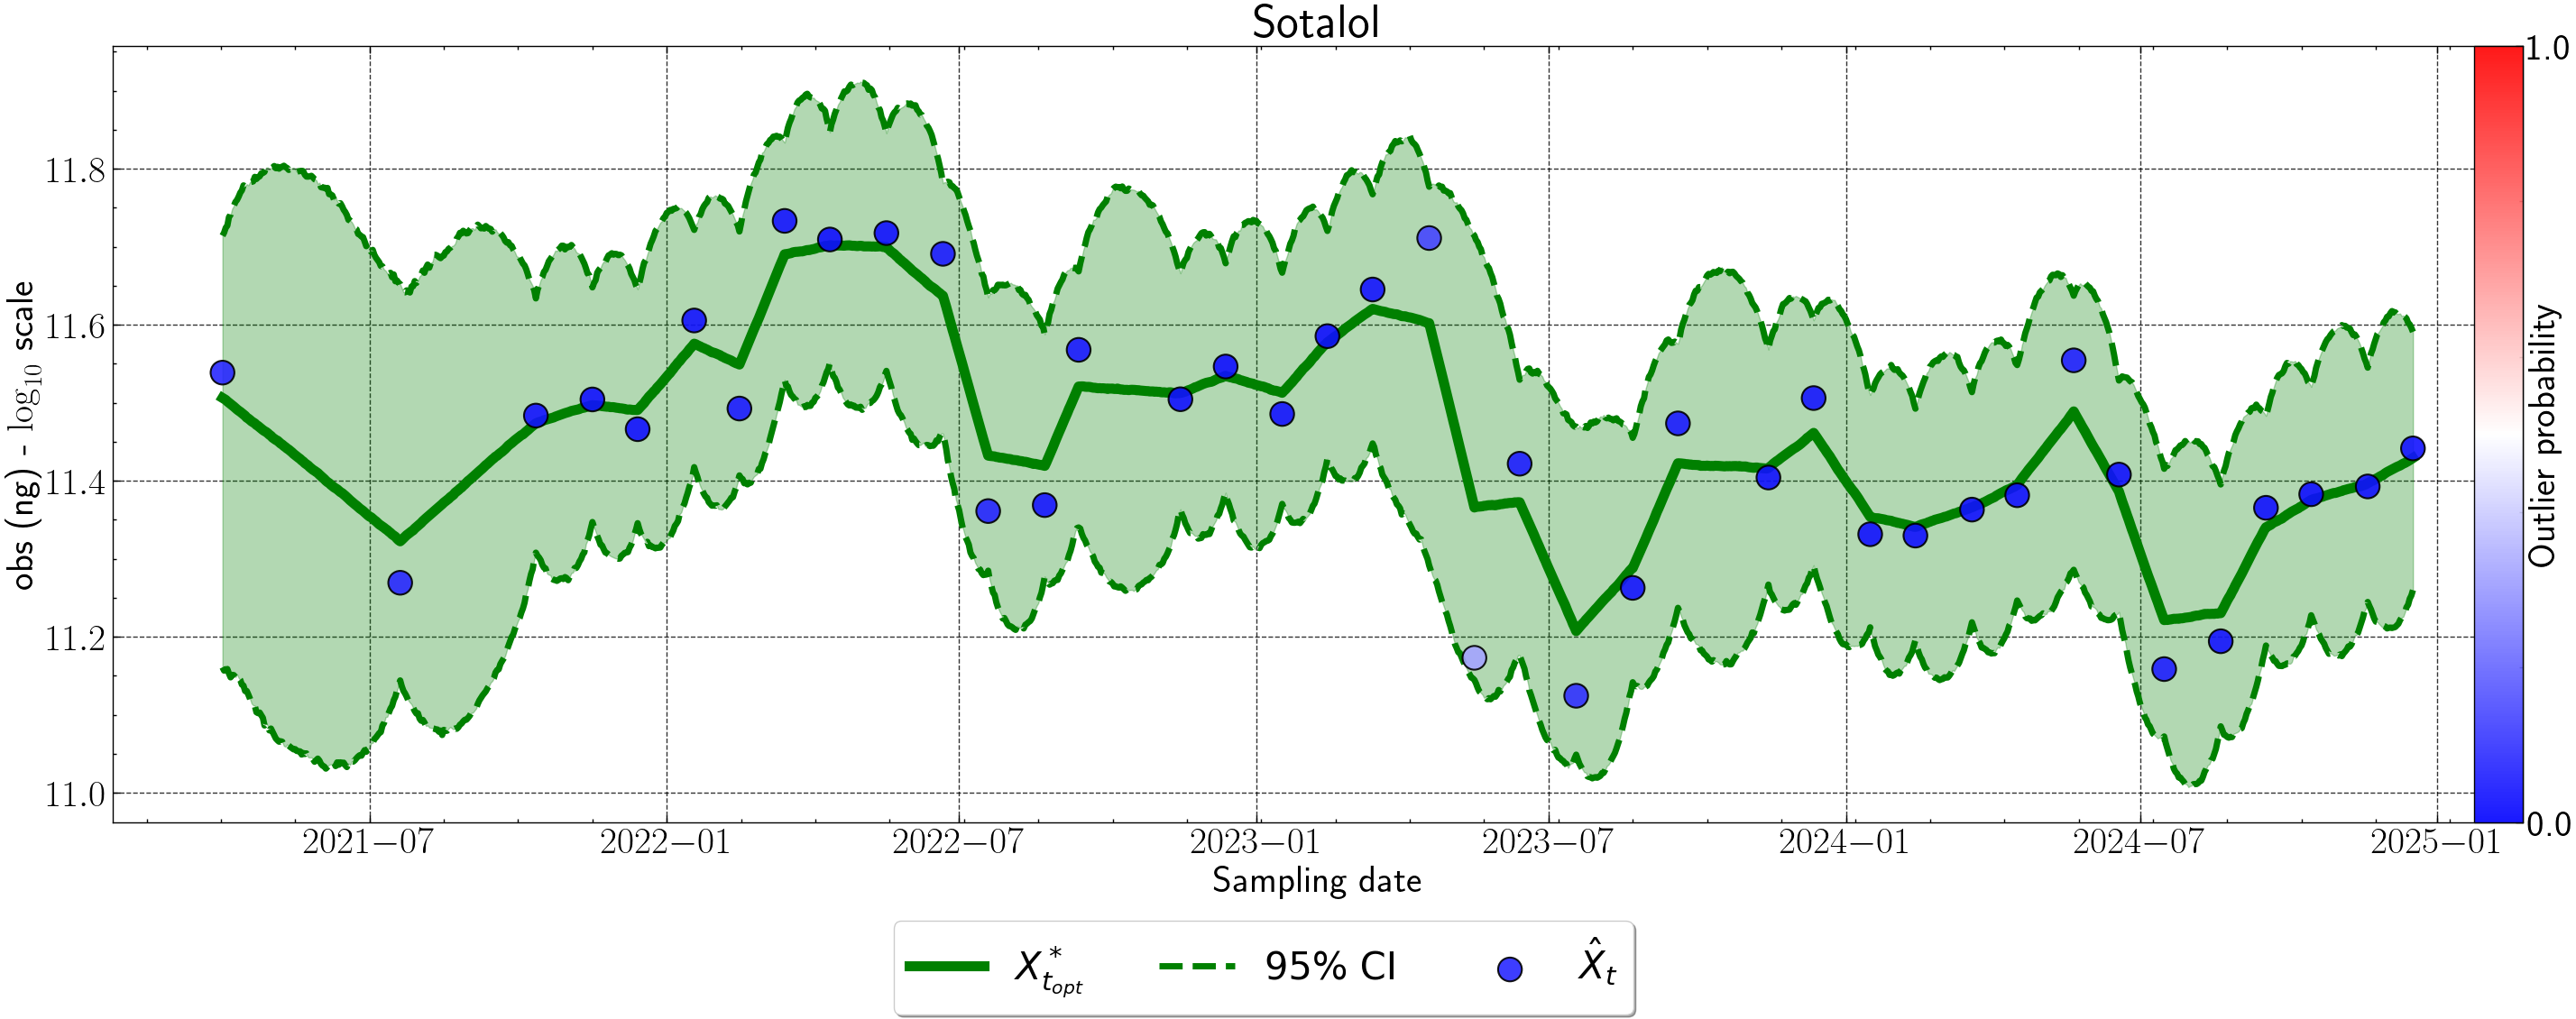

In [174]:
with plt.style.context(['science', 'notebook', 'grid']):

    LABEL_SIZE = 30
    TICK_SIZE = 30
    TITLE_SIZE = 38
    LEGEND_SIZE = 30
    DATES_SIZE = 18
    figsize = (28, 10) #figsize = (32, 10)
    
    plt.rc('axes', labelsize=LABEL_SIZE)
    plt.rc('xtick', labelsize=TICK_SIZE)   
    plt.rc('ytick', labelsize=TICK_SIZE)
    plt.rc('figure', titlesize=TITLE_SIZE)
    plt.rc('legend', fontsize=LEGEND_SIZE)
    plt.rcParams['text.usetex'] = True
    
    fig = plt.figure(figsize=figsize, layout="constrained")
    
    ax_dict = fig.subplot_mosaic(
        """
        A
        """
    )
    
    ### A
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.muX.values, label='$X^*_{t_{opt}}$', color='green', linewidth=8, zorder=3)
    
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICL.values, label='95% CI', linestyle='--', color='green', linewidth=5, zorder=1)
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICU.values, linestyle='--', color='green', linewidth=5, zorder=1)
    
    ax_dict['A'].fill_between(sub_data.dateStart.values, sub_data.ICL.values, sub_data.ICU.values, alpha=.3, color='green')

    
    scatter_points = ax_dict['A'].scatter(sub_data.dateStart.values, sub_data.obs.values, label='$\hat{X}_t$', 
                         c=sub_data.pout.values,
                         cmap='bwr', edgecolor='black', s=360, zorder=3,
                         linewidths=1.5, alpha=0.9, vmin=0, vmax=1)

    
    ax_dict['A'].set_ylabel("obs (ng) - $\log_{10}$ scale")
    ax_dict['A'].set_xlabel("Sampling date")
    ax_dict['A'].tick_params(axis='x', labelsize=TICK_SIZE)
    ax_dict['A'].tick_params(axis='y', labelsize=TICK_SIZE)
    ax_dict['A'].grid(linewidth=1, color='black', alpha=0.8)
    ax_dict['A'].set_title(this_molecule, size=TITLE_SIZE)

    ### Outlier probability legend:
    cmin, cmax = 0.0, 1.0 
    axins1 = inset_axes(ax_dict['A'], width='2%', height='100%', loc='right', borderpad=0)
    axins1.grid(False)
    cbar = fig.colorbar(scatter_points, cax=axins1, orientation='vertical')
    
    # Setting tick limits:
    cbar.set_ticks([cmin, cmax])
    cbar.ax.yaxis.set_major_locator(ticker.FixedLocator([cmin, cmax]))
    
    # Standardizing the float format displayed:
    decimal_places = 1
    cbar.ax.set_yticklabels([f"{cmin:.{decimal_places}f}", f"{cmax:.{decimal_places}f}"], fontsize=TICK_SIZE)

    # Placing the label at the right spot:
    cbar.ax.set_ylabel('Outlier probability', size=TICK_SIZE, labelpad=-35)

    # Main legend
    plt.rcParams['text.usetex'] = False
    h1, l1 = ax_dict['A'].get_legend_handles_labels()
    fig.legend(h1, l1, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=5)
    
    plt.show()

In [175]:
### Pout estimé par le SCOU NUTS

In [176]:
for molecule in list(RW2s.keys()):
    this_file = RW2s[molecule]
    this_file.to_csv('../outputs/files/chemical_data_manuscript/' + molecule + '.csv', sep=';', index=False)

In [22]:
full_data.Molecule.unique()

array(['Volume Prétraité Bassins de Clichy',
       'Emissaire Genéral Estimation Pompage', 'Débit Seine Centre',
       'Acénaphtène', 'Ammonium', 'Anthracène', 'Azote Kjeldahl',
       'Benzo[a]anthracène', 'Benzo[a]pyrène', 'Benzo[b]fluoranthène',
       'Benzo[g,h,i]perylène', 'Benzo[k]fluoranthène', 'Chrysène',
       'Coliformes Thermotolérants', 'Coliformes totaux présomptifs',
       'DBO diluée', 'Dibenzo[ah]anthracène', 'Entérocoques intestinaux',
       'Escherichia coli', 'Fluoranthène', 'Fluorène',
       'Indéno[1,2,3,c,d]pyrène', 'Matières en suspension',
       'Micro-organismes revivifiables\xa0 à 22°C',
       'Micro-organismes revivifiables\xa0 à 36°C', 'Naphtalène', 'NGL',
       'Nitrates', 'Nitrites', 'Orthophosphates', 'PCB 101', 'PCB 118',
       'PCB 138', 'PCB 153', 'PCB 180', 'PCB 28', 'PCB 52', 'pH',
       'Phénanthrène', 'Phosphore', 'Pyrène', 'Somme 15 HAP',
       'Somme 7 PCB',
       'Spores de micro-organismes anaérobies sulfito-réducteurs',
       'S

In [10]:
this_molecule = 'Sulfaméthoxazole'
this_lod = 0.01 * 1000
this_lod

10.0

In [11]:
sub_data = preprocess_data(this_molecule, this_lod)

In [12]:
sub_data.loc[sub_data.obs <= sub_data.lod]

Empty DataFrame
Columns: [dateStart, obs, Raw_lod, Raw_concentration, lod, plantVolume]
Index: []

In [13]:
lod_matrix = sub_data.lod.values
observation_matrix = sub_data.obs.values

filename = 'discard.nc'
tuning_iters = 12000
sampling_iters = 2000
nb_chains = 15

snc_ar1_nuts = SCOU_RW1_NUTS(observation_matrix, lod_matrix, tuning_iters=tuning_iters, sampling_iters=sampling_iters,
                             export_name=filename, 
                             p_out_frozen=-1, nb_chains=nb_chains, export_chains=False,
                             RW_order=1)
snc_ar1_nuts.fit()

# Done
notify_mac("Jupyter", "Work done !")

/opt/anaconda3/envs/pymc5/lib/python3.9/site-packages/pymc/distributions/timeseries.py:558: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100, shape=...)`. You can specify an init_dist manually to suppress this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (15 chains in 4 jobs)
NUTS: [sig, eps, p_out, latent]


Sampling 15 chains for 12_000 tune and 2_000 draw iterations (180_000 + 30_000 draws total) took 3602 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 6 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


Raw summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.201  0.369   0.054    0.517      0.091    0.066      41.0      18.0   
eps    0.422  0.340   0.145    0.638      0.031    0.022     188.0      62.0   
p_out  0.148  0.209   0.000    0.832      0.051    0.038      56.0      21.0   

       r_hat  
sig     1.31  
eps     1.05  
p_out   1.18  


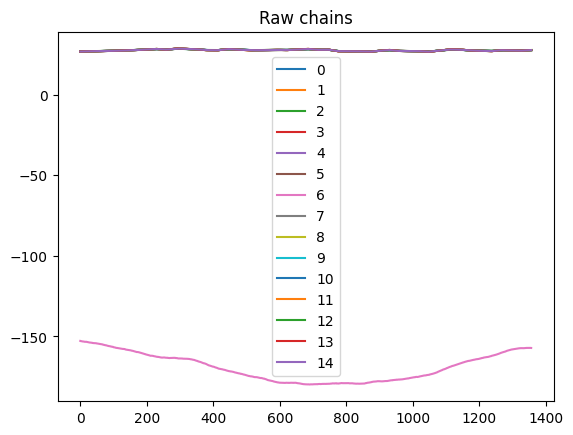

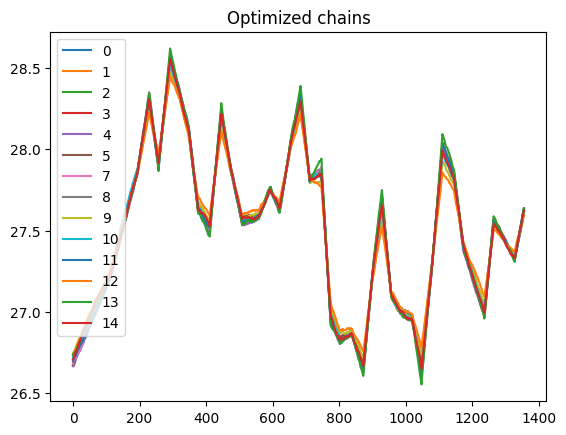

Best chain combination summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.119  0.025   0.074    0.163      0.002    0.002     114.0     257.0   
eps    0.386  0.118   0.168    0.604      0.005    0.003     678.0    4675.0   
p_out  0.095  0.064   0.003    0.210      0.000    0.000   19022.0   18608.0   

       r_hat  
sig     1.11  
eps     1.02  
p_out   1.00  


In [17]:
selected_chains = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
remove_those = [6]#[2, 5, 8, 6, 3]
for i in remove_those:
    selected_chains.remove(i)


snc_ar1_nuts.visualize_latents(selected_chains)
snc_ar1_nuts.predict(selected_chains)

In [18]:
sub_data['muX'] = snc_ar1_nuts.muX
sub_data['ICL'] = snc_ar1_nuts.CIL
sub_data['ICU'] = snc_ar1_nuts.CIU
sub_data['pout'] = snc_ar1_nuts.pointwise_pout

sub_data.obs = np.log10(np.exp(sub_data.obs))
sub_data.muX = np.log10(np.exp(sub_data.muX))
sub_data.ICL = np.log10(np.exp(sub_data.ICL))
sub_data.ICU = np.log10(np.exp(sub_data.ICU))

RW2s[this_molecule] = sub_data.copy()

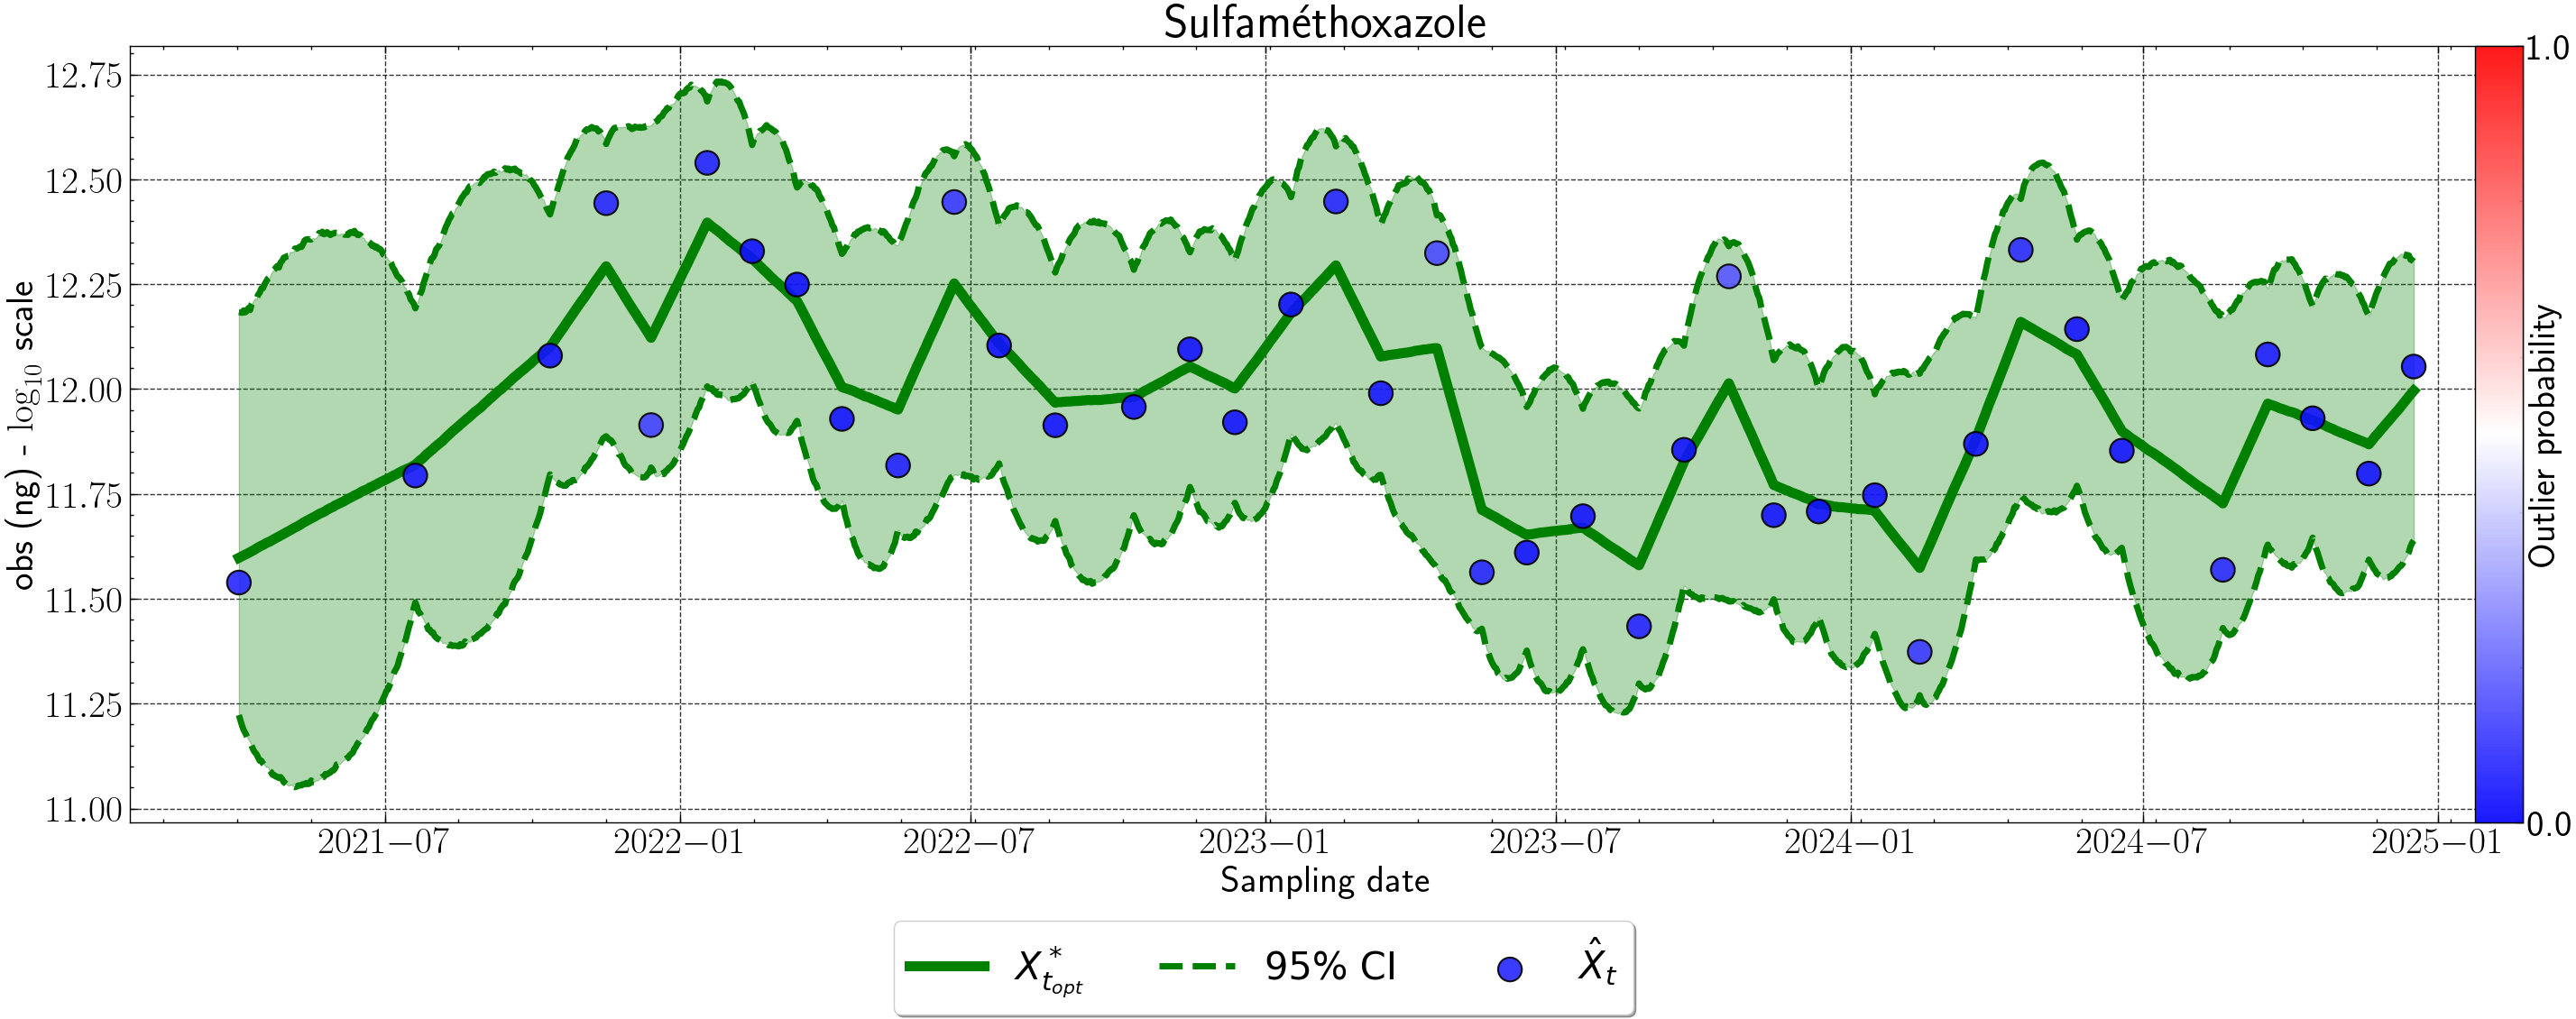

In [19]:
with plt.style.context(['science', 'notebook', 'grid']):

    LABEL_SIZE = 30
    TICK_SIZE = 30
    TITLE_SIZE = 38
    LEGEND_SIZE = 30
    DATES_SIZE = 18
    figsize = (28, 10) #figsize = (32, 10)
    
    plt.rc('axes', labelsize=LABEL_SIZE)
    plt.rc('xtick', labelsize=TICK_SIZE)   
    plt.rc('ytick', labelsize=TICK_SIZE)
    plt.rc('figure', titlesize=TITLE_SIZE)
    plt.rc('legend', fontsize=LEGEND_SIZE)
    plt.rcParams['text.usetex'] = True
    
    fig = plt.figure(figsize=figsize, layout="constrained")
    
    ax_dict = fig.subplot_mosaic(
        """
        A
        """
    )
    
    ### A
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.muX.values, label='$X^*_{t_{opt}}$', color='green', linewidth=8, zorder=3)
    
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICL.values, label='95% CI', linestyle='--', color='green', linewidth=5, zorder=1)
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICU.values, linestyle='--', color='green', linewidth=5, zorder=1)
    
    ax_dict['A'].fill_between(sub_data.dateStart.values, sub_data.ICL.values, sub_data.ICU.values, alpha=.3, color='green')

    
    scatter_points = ax_dict['A'].scatter(sub_data.dateStart.values, sub_data.obs.values, label='$\hat{X}_t$', 
                         c=sub_data.pout.values,
                         cmap='bwr', edgecolor='black', s=360, zorder=3,
                         linewidths=1.5, alpha=0.9, vmin=0, vmax=1)

    
    ax_dict['A'].set_ylabel("obs (ng) - $\log_{10}$ scale")
    ax_dict['A'].set_xlabel("Sampling date")
    ax_dict['A'].tick_params(axis='x', labelsize=TICK_SIZE)
    ax_dict['A'].tick_params(axis='y', labelsize=TICK_SIZE)
    ax_dict['A'].grid(linewidth=1, color='black', alpha=0.8)
    ax_dict['A'].set_title(this_molecule, size=TITLE_SIZE)

    ### Outlier probability legend:
    cmin, cmax = 0.0, 1.0 
    axins1 = inset_axes(ax_dict['A'], width='2%', height='100%', loc='right', borderpad=0)
    axins1.grid(False)
    cbar = fig.colorbar(scatter_points, cax=axins1, orientation='vertical')
    
    # Setting tick limits:
    cbar.set_ticks([cmin, cmax])
    cbar.ax.yaxis.set_major_locator(ticker.FixedLocator([cmin, cmax]))
    
    # Standardizing the float format displayed:
    decimal_places = 1
    cbar.ax.set_yticklabels([f"{cmin:.{decimal_places}f}", f"{cmax:.{decimal_places}f}"], fontsize=TICK_SIZE)

    # Placing the label at the right spot:
    cbar.ax.set_ylabel('Outlier probability', size=TICK_SIZE, labelpad=-35)

    # Main legend
    plt.rcParams['text.usetex'] = False
    h1, l1 = ax_dict['A'].get_legend_handles_labels()
    fig.legend(h1, l1, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=5)
    
    plt.show()

In [20]:
### Pout estimé par le SCOU NUTS

In [21]:
for molecule in list(RW2s.keys()):
    this_file = RW2s[molecule]
    this_file.to_csv('../outputs/files/chemical_data_manuscript/' + molecule + '.csv', sep=';', index=False)

In [22]:
full_data.Molecule.unique()

array(['Volume Prétraité Bassins de Clichy',
       'Emissaire Genéral Estimation Pompage', 'Débit Seine Centre',
       'Acénaphtène', 'Ammonium', 'Anthracène', 'Azote Kjeldahl',
       'Benzo[a]anthracène', 'Benzo[a]pyrène', 'Benzo[b]fluoranthène',
       'Benzo[g,h,i]perylène', 'Benzo[k]fluoranthène', 'Chrysène',
       'Coliformes Thermotolérants', 'Coliformes totaux présomptifs',
       'DBO diluée', 'Dibenzo[ah]anthracène', 'Entérocoques intestinaux',
       'Escherichia coli', 'Fluoranthène', 'Fluorène',
       'Indéno[1,2,3,c,d]pyrène', 'Matières en suspension',
       'Micro-organismes revivifiables\xa0 à 22°C',
       'Micro-organismes revivifiables\xa0 à 36°C', 'Naphtalène', 'NGL',
       'Nitrates', 'Nitrites', 'Orthophosphates', 'PCB 101', 'PCB 118',
       'PCB 138', 'PCB 153', 'PCB 180', 'PCB 28', 'PCB 52', 'pH',
       'Phénanthrène', 'Phosphore', 'Pyrène', 'Somme 15 HAP',
       'Somme 7 PCB',
       'Spores de micro-organismes anaérobies sulfito-réducteurs',
       'S

In [22]:
this_molecule = 'Triméthoprime'
this_lod = 0.01 * 1000
this_lod

10.0

In [23]:
sub_data = preprocess_data(this_molecule, this_lod)

In [24]:
sub_data.loc[sub_data.obs <= sub_data.lod]

Empty DataFrame
Columns: [dateStart, obs, Raw_lod, Raw_concentration, lod, plantVolume]
Index: []

In [25]:
lod_matrix = sub_data.lod.values
observation_matrix = sub_data.obs.values

filename = 'discard.nc'
tuning_iters = 12000
sampling_iters = 2000
nb_chains = 15

snc_ar1_nuts = SCOU_RW1_NUTS(observation_matrix, lod_matrix, tuning_iters=tuning_iters, sampling_iters=sampling_iters,
                             export_name=filename, 
                             p_out_frozen=-1, nb_chains=nb_chains, export_chains=False,
                             RW_order=1)
snc_ar1_nuts.fit()

# Done
notify_mac("Jupyter", "Work done !")

/opt/anaconda3/envs/pymc5/lib/python3.9/site-packages/pymc/distributions/timeseries.py:558: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100, shape=...)`. You can specify an init_dist manually to suppress this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (15 chains in 4 jobs)
NUTS: [sig, eps, p_out, latent]


Sampling 15 chains for 12_000 tune and 2_000 draw iterations (180_000 + 30_000 draws total) took 3192 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 8 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


Raw summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.176  0.182   0.067    0.389      0.042    0.030      42.0      19.0   
eps    0.360  0.414   0.114    0.602      0.038    0.027     137.0      59.0   
p_out  0.149  0.207   0.001    0.838      0.051    0.038      56.0      21.0   

       r_hat  
sig     1.29  
eps     1.07  
p_out   1.18  


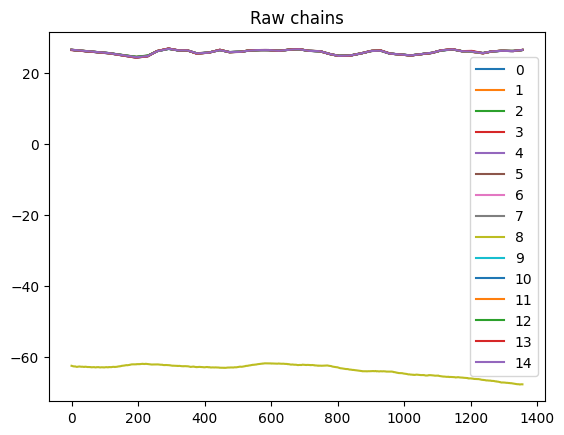

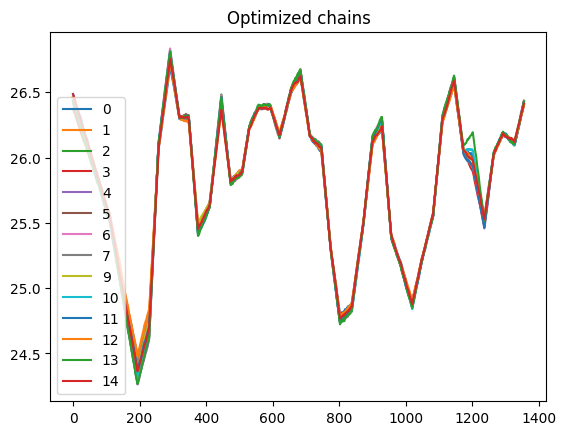

Best chain combination summary:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sig    0.134  0.023   0.089    0.177      0.002    0.002     112.0     197.0   
eps    0.319  0.119   0.121    0.540      0.003    0.002    1401.0    3618.0   
p_out  0.096  0.056   0.008    0.196      0.001    0.000   12332.0   15762.0   

       r_hat  
sig     1.10  
eps     1.01  
p_out   1.00  


In [28]:
selected_chains = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
remove_those = [8]#[2, 5, 8, 6, 3]
for i in remove_those:
    selected_chains.remove(i)


snc_ar1_nuts.visualize_latents(selected_chains)
snc_ar1_nuts.predict(selected_chains)

In [29]:
sub_data['muX'] = snc_ar1_nuts.muX
sub_data['ICL'] = snc_ar1_nuts.CIL
sub_data['ICU'] = snc_ar1_nuts.CIU
sub_data['pout'] = snc_ar1_nuts.pointwise_pout

sub_data.obs = np.log10(np.exp(sub_data.obs))
sub_data.muX = np.log10(np.exp(sub_data.muX))
sub_data.ICL = np.log10(np.exp(sub_data.ICL))
sub_data.ICU = np.log10(np.exp(sub_data.ICU))

RW2s[this_molecule] = sub_data.copy()

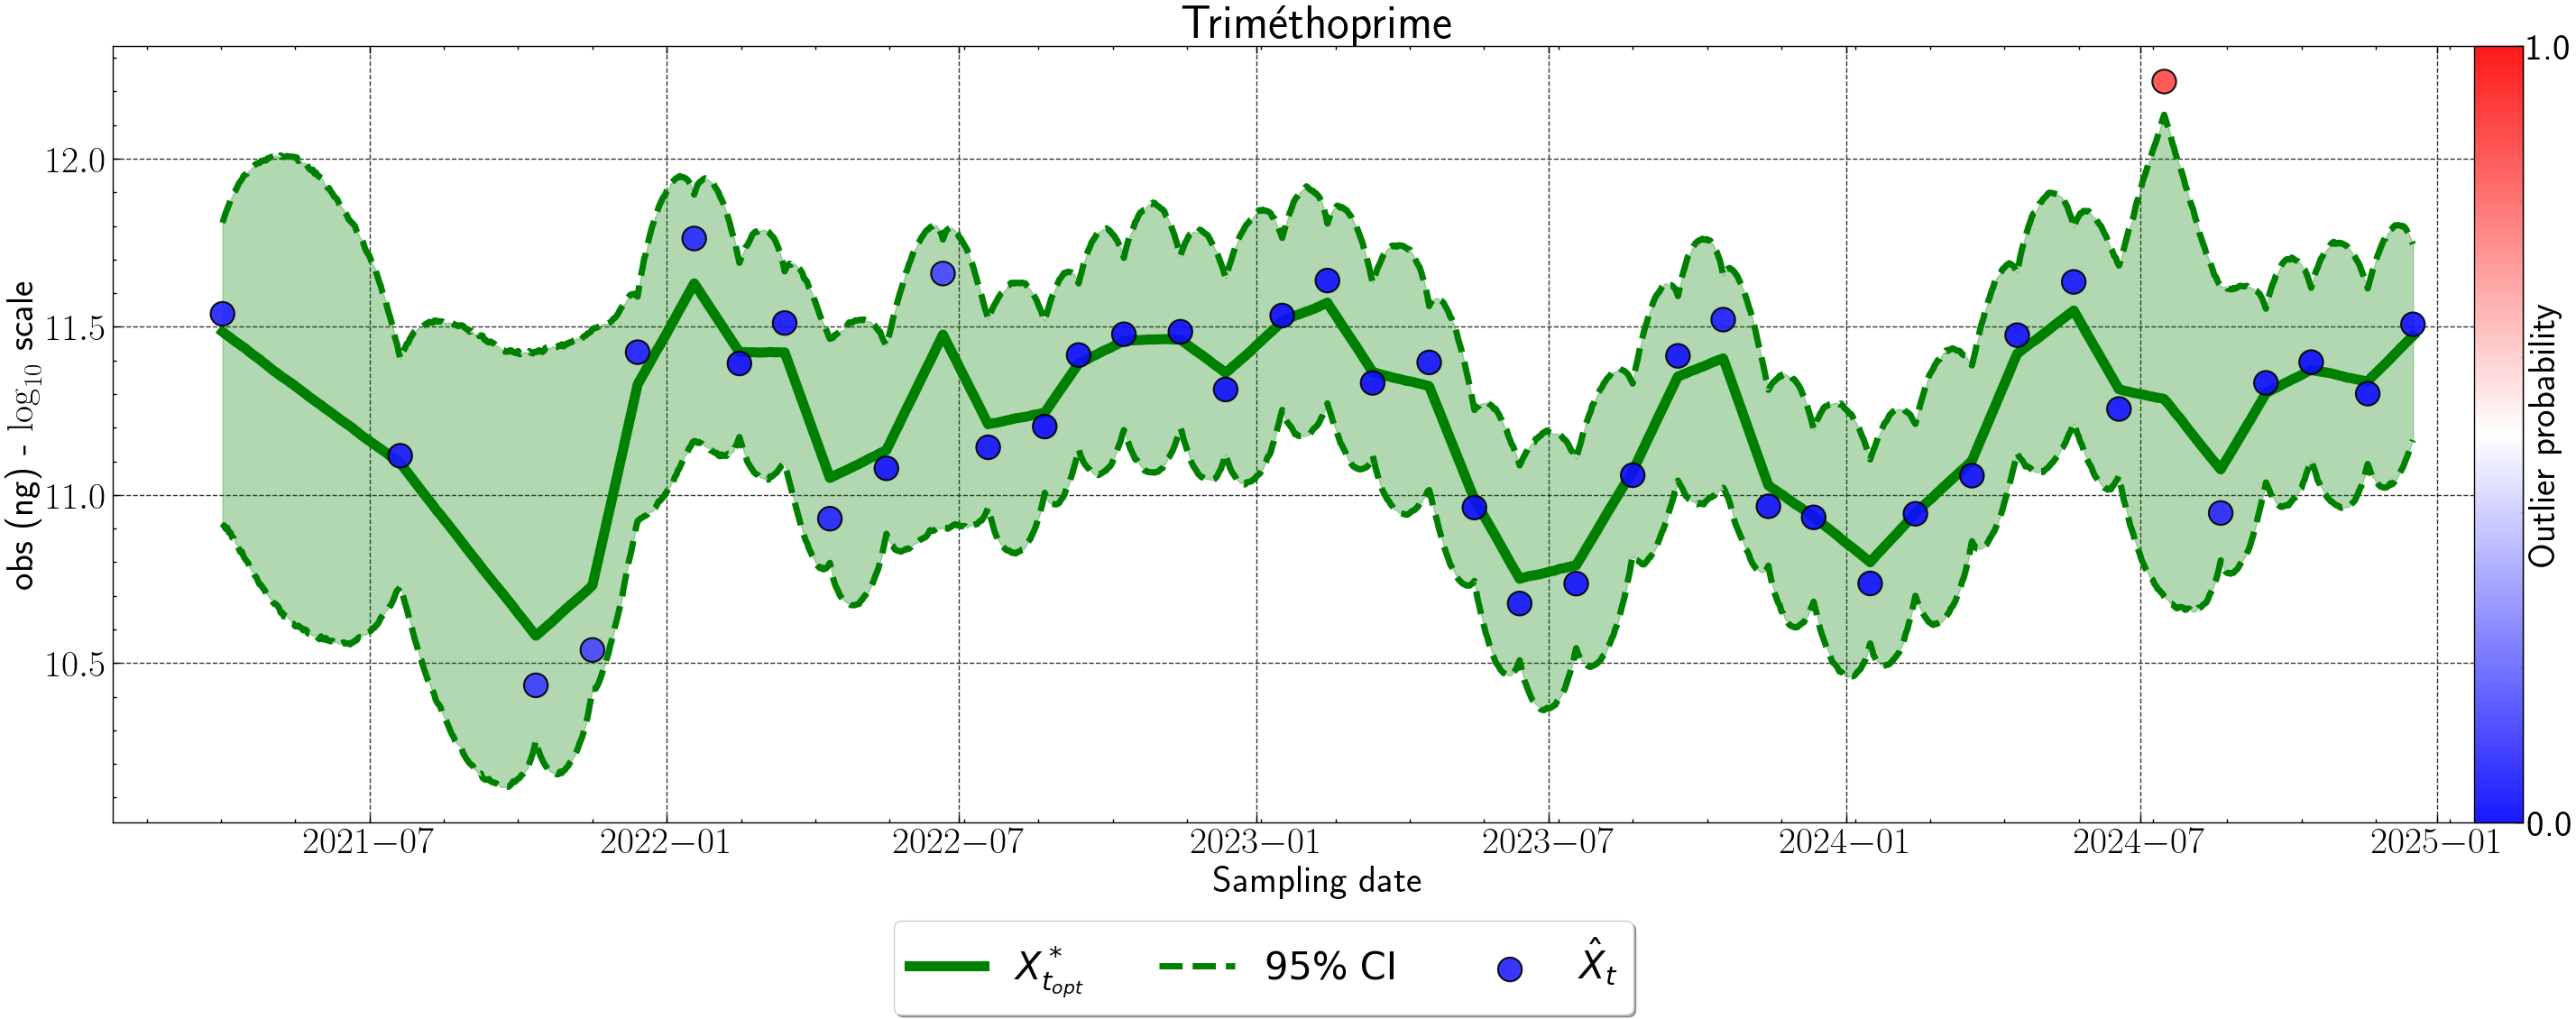

In [30]:
with plt.style.context(['science', 'notebook', 'grid']):

    LABEL_SIZE = 30
    TICK_SIZE = 30
    TITLE_SIZE = 38
    LEGEND_SIZE = 30
    DATES_SIZE = 18
    figsize = (28, 10) #figsize = (32, 10)
    
    plt.rc('axes', labelsize=LABEL_SIZE)
    plt.rc('xtick', labelsize=TICK_SIZE)   
    plt.rc('ytick', labelsize=TICK_SIZE)
    plt.rc('figure', titlesize=TITLE_SIZE)
    plt.rc('legend', fontsize=LEGEND_SIZE)
    plt.rcParams['text.usetex'] = True
    
    fig = plt.figure(figsize=figsize, layout="constrained")
    
    ax_dict = fig.subplot_mosaic(
        """
        A
        """
    )
    
    ### A
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.muX.values, label='$X^*_{t_{opt}}$', color='green', linewidth=8, zorder=3)
    
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICL.values, label='95% CI', linestyle='--', color='green', linewidth=5, zorder=1)
    ax_dict['A'].plot(sub_data.dateStart.values, sub_data.ICU.values, linestyle='--', color='green', linewidth=5, zorder=1)
    
    ax_dict['A'].fill_between(sub_data.dateStart.values, sub_data.ICL.values, sub_data.ICU.values, alpha=.3, color='green')

    
    scatter_points = ax_dict['A'].scatter(sub_data.dateStart.values, sub_data.obs.values, label='$\hat{X}_t$', 
                         c=sub_data.pout.values,
                         cmap='bwr', edgecolor='black', s=360, zorder=3,
                         linewidths=1.5, alpha=0.9, vmin=0, vmax=1)

    
    ax_dict['A'].set_ylabel("obs (ng) - $\log_{10}$ scale")
    ax_dict['A'].set_xlabel("Sampling date")
    ax_dict['A'].tick_params(axis='x', labelsize=TICK_SIZE)
    ax_dict['A'].tick_params(axis='y', labelsize=TICK_SIZE)
    ax_dict['A'].grid(linewidth=1, color='black', alpha=0.8)
    ax_dict['A'].set_title(this_molecule, size=TITLE_SIZE)

    ### Outlier probability legend:
    cmin, cmax = 0.0, 1.0 
    axins1 = inset_axes(ax_dict['A'], width='2%', height='100%', loc='right', borderpad=0)
    axins1.grid(False)
    cbar = fig.colorbar(scatter_points, cax=axins1, orientation='vertical')
    
    # Setting tick limits:
    cbar.set_ticks([cmin, cmax])
    cbar.ax.yaxis.set_major_locator(ticker.FixedLocator([cmin, cmax]))
    
    # Standardizing the float format displayed:
    decimal_places = 1
    cbar.ax.set_yticklabels([f"{cmin:.{decimal_places}f}", f"{cmax:.{decimal_places}f}"], fontsize=TICK_SIZE)

    # Placing the label at the right spot:
    cbar.ax.set_ylabel('Outlier probability', size=TICK_SIZE, labelpad=-35)

    # Main legend
    plt.rcParams['text.usetex'] = False
    h1, l1 = ax_dict['A'].get_legend_handles_labels()
    fig.legend(h1, l1, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=5)
    
    plt.show()

In [31]:
### Pout estimé par le SCOU NUTS

In [32]:
for molecule in list(RW2s.keys()):
    this_file = RW2s[molecule]
    this_file.to_csv('../outputs/files/chemical_data_manuscript/' + molecule + '.csv', sep=';', index=False)